## Final Project Submission

Please fill out:
* Student name: James Pheby 
* Student pace: Flex
* Scheduled project review date/time: 12/8/2021 
* Instructor name: Abhineet Kulkarni
* Blog post URL:https://medium.com/@jpheby93/movie-websites-such-as-omdb-and-the-numbers-are-treasure-chests-of-information-and-a-few-lines-of-c2b27b1220cb

# King's Contest: Analysis of King County, WA, House Prices for Television Production Company

<img src="images/logo.png" style="width: 500px;"/>

# Overview
Television production company King's Contest is producing a new game show in which a group of contestants and a team of experts working for the show are both given a lump sum with which to buy a house in King County WA.<br>

The aim of the game is to sell the house on for a profit, and if the contestants make more than the experts, they get to keep the sale proceeds.<br>

In order to minimize the chance of this happening, we analyzed house sales in King County, WA, between May 2014 and May 2015 to produce an inferential model of how various features of a house are correlated to its market value, helping us identify undervalued property.<br>

Our headline recommendations to the production company are; make the lump sum $500,000, concentrate the search in the 10 locations in which the model performs the best, mainly focus on living space and grade of the property and keep an eye out for bargain waterfront homes.

# Business Problem

-  To attract high ratings with an entertaining show that strikes a good balance between difficulty and achievability for the contestants

-  This relies upon the expert team winning most of the time, therefore having a good understanding of the features that most drive house prices in the county in order to identify undervalued property

-  We also need to make sure we stack the odds in our favour in order not to keep having to pay out the big prize


# Data Understanding
Data drawn from dataset of 21,597 house sales in King County between May 2, 2014 and May 27, 2015.<br>
Along with the price, the dataset contains 19 features of each house which could potentially affect its value, ranging from location to property size and whether it is by the waterfront.

<img src="images/seattle.jpg" style="width: 700px;"/>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
import requests
import json
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
with open("data/zip_dic.json", "r") as zzd:
    zip_dic = json.load(zzd)
    

In [3]:
with open("data/zip_nb_dic.json", "r") as zzn:
    zip_nb_dic = json.load(zzn)    

In [4]:
pd.set_option('float_format', '{:f}'.format)

# Data Preparation

In [5]:
data_df = pd.read_csv('data/kc_house_data.csv')

In [6]:
data_df.head()

id        date         price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.000000         3   1.000000         1180   
1  6414100192   12/9/2014 538000.000000         3   2.250000         2570   
2  5631500400   2/25/2015 180000.000000         2   1.000000          770   
3  2487200875   12/9/2014 604000.000000         4   3.000000         1960   
4  1954400510   2/18/2015 510000.000000         3   2.000000         1680   

   sqft_lot   floors  waterfront     view  ...  grade  sqft_above  \
0      5650 1.000000         nan 0.000000  ...      7        1180   
1      7242 2.000000    0.000000 0.000000  ...      7        2170   
2     10000 1.000000    0.000000 0.000000  ...      6         770   
3      5000 1.000000    0.000000 0.000000  ...      7        1050   
4      8080 1.000000    0.000000 0.000000  ...      8        1680   

   sqft_basement yr_built  yr_renovated  zipcode       lat        long  \
0            0.0     1955      0.000000    98178 47.511200 -122.257000   
1          400.0     1951   1991.000000    98125 47.721000 -122.319000   
2            0.0     1933           nan    98028 47.737900 -122.233000   
3          910.0     1965      0.000000    98136 47.520800 -122.393000   
4            0.0     1987      0.000000    98074 47.616800 -122.045000   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# check for duplicate ids
dup_df = data_df.groupby('id').count().sort_values(by=['price'], ascending=False)
dup_df = dup_df[dup_df['price'] >1]
dup_df.reset_index(inplace=True)
dup_list = dup_df['id'].tolist()

## Check for nans and anomolies

**waterfront, yr_renovated** - contain nulls <br>
**date** - wrong datatype. Need to change before removing duplicates <br>
**sqft_basement** - why is it object? <br>
**zipcode** - probably should be string <br>
**view** - not relevant to our task, no logical reason for any correlation



**waterfront**

In [9]:
data_df['waterfront'].value_counts()

0.000000    19075
1.000000      146
Name: waterfront, dtype: int64

In [28]:
# dont want to use median or mean to fil nans as it is a binary column,
# filling in the nans randomly using probability observed in the recorded data
# gives us no advantage over just using 0 given as it's far more likely
# that a 1 will erroneously fall on a 0 rather than correctly on a 1. 
# Only around 18 false values likely if we use all 0s, so not going to skew values too much



**yr_renovated**

In [10]:
data_df['yr_renovated'].value_counts()

0.000000       17011
2014.000000       73
2003.000000       31
2013.000000       31
2007.000000       30
               ...  
1946.000000        1
1959.000000        1
1971.000000        1
1951.000000        1
1954.000000        1
Name: yr_renovated, Length: 70, dtype: int64

In [5]:
# replace with 0 as that is the dummy value for places that haven't been done up

**sqft_basement**

In [11]:
data_df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1930.0        1
295.0         1
704.0         1
274.0         1
2190.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [11]:
# make ? into 0 and make numeric

## clean data

In [7]:
# fill nans with 0
data_df = data_df.fillna({'waterfront' : 0, 'yr_renovated': 0,  'view' : 0})

In [8]:
# change date datatype and delete duplicates
data_df["date"] = pd.to_datetime(data_df["date"])


In [9]:
# duplicates have just been resold, not renovated. Best to keep the most
# recent sale
data_df = data_df.sort_values(['id', 'date'])

In [10]:
data_df = data_df.drop_duplicates(
  subset = ['id'],
  keep = 'first').reset_index(drop = True)

In [11]:
# deal with sale date, more useful to have broken up into d/m/y

data_df['year_sold'] = data_df['date'].dt.year
data_df['month_sold'] = data_df['date'].dt.month
data_df['date_sold'] = data_df['date'].dt.day
data_df.drop('date', axis=1, inplace=True)


In [12]:
# insert 0 for ? in sqft_basement and make numeric
data_df['sqft_basement'].replace(to_replace='?', value=0.0, inplace=True)
data_df['sqft_basement'] = data_df['sqft_basement'].astype(float)

# Data Exploration and Modeling

## Functions

### model constructor

In [13]:
# splits data into train/test
def splitter(prep):
    y = prep["price"]
    x = prep.drop("price", axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    
    return(x_train, x_test, y_train, y_test, x, y)
    

In [14]:
# takes in a dataframe, splits and then performs linear multiple linear regression
# returns model parameters, r2 value and rmse

def make_ols_model(prep, cv=False):
    
    x_train, x_test, y_train, y_test, x_o, y_o = splitter(prep)

    x_int = sm.add_constant(x_train)
    

    predictors_int = sm.add_constant(x_train)
    model = sm.OLS(y_train, predictors_int).fit()
    
    predictors_test = sm.add_constant(x_test)
    
    y_hat_train = model.predict(predictors_int)
    y_hat_test = model.predict(predictors_test)
    
    if cv==True:
        regression = LinearRegression()
        model_scores = cross_validate(
        estimator=regression,
        scoring=('r2','neg_mean_squared_error'),
        X=x_o,
        y=y_o,
        return_train_score=True,
        cv=5)
        
        print("Train score:     ", model_scores["train_r2"].mean())
        print("Validation score:", model_scores["test_r2"].mean())

    train_mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
    test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))
    print('Train Root Mean Squarred Error:', train_mse)
    print('Test Root Mean Squarred Error:', test_mse)
    
    r_sq = np.mean(cross_val_score(regression, x_o, y_o, scoring='r2', cv=10))
    print(f'cros_val r2 = {r_sq}')
    

    return model, test_mse

### exploration visualisations

#### exploration scatterplot 

In [15]:
def scatterplot(preprocessed):
    x_train, x_test, y_train, y_test, x, y = splitter(preprocessed)
    
    no_cols = len(x_train.columns)
    
    rs = (int(no_cols/3) + (no_cols % 3>0))


    fig, axes = plt.subplots(ncols=3, nrows=rs, figsize=(12, 25))
    fig.set_tight_layout(True)

    for index, col in enumerate(x_train.columns):
        ax = axes[index//3][index%3]
        ax.scatter(x_train[col], y_train, alpha=0.2)
        ax.set_xlabel(col)
        ax.set_ylabel("price")

#### linearity test

In [16]:
def linearity_test(df):
    prep=df.copy()
    x_train, x_test, y_train, y_test, x, y = splitter(prep)
    lin_data = pd.concat([y_train, x_train], axis=1)

    for col in lin_data.columns:
        f = f'price~{col}'
        model = smf.ols(formula=f, data=lin_data).fit()
        print(model)

        print(f'{col} normality tests')
        result=[col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]]
        print(result)
    
        fig, axes = plt.subplots(figsize=(15,8))
        fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
        fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
        fig.tight_layout()
        plt.show()
    return y_train

## Create baseline model

In [17]:
#take id out of df
baseline_df=data_df.copy()
baseline_df.drop('id', axis=1, inplace=True)
baseline = make_ols_model(baseline_df, cv=True)[0]
baseline.summary()

Train score:      0.7021311907896242
Validation score: 0.697663124682051
Train Root Mean Squarred Error: 202509.79995502037
Test Root Mean Squarred Error: 196329.36477543126
cros_val r2 = 0.698838554774444


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1836.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:37:50   Log-Likelihood:            -2.1909e+05
No. Observations:               16065   AIC:                         4.382e+05
Df Residuals:                   16043   BIC:                         4.384e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.941e+07   1.16e+07     -5.961      0.000   -9.22e+07   -4.66e+07
bedrooms       -3.86e+04   2196.488    -17.573      0.000   -4.29e+04   -3.43e+04
bathrooms      4.764e+04   3794.411     12.556      0.000    4.02e+04    5.51e+04
sqft_living      97.4183     21.535      4.524      0.000      55.208     139.629
sqft_lot          0.1839      0.058      3.177      0.001       0.070       0.297
floors         5252.5127   4200.087      1.251      0.211   -2980.127    1.35e+04
waterfront     6.094e+05   2.08e+04     29.298      0.000    5.69e+05     6.5e+05
view           5.685e+04   2468.612     23.031      0.000     5.2e+04    6.17e+04
condition      3.031e+04   2758.156     10.988      0.000    2.49e+04    3.57e+04
grade          9.798e+04   2516.188     38.938      0.000     9.3e+04    1.03e+05
sqft_above       83.1074     21.473      3.870      0.000      41.018     125.197
sqft_basement    55.7601     21.303      2.617      0.009      14.004      97.516
yr_built      -2611.1867     83.699    -31.197      0.000   -2775.247   -2447.126
yr_renovated     25.9221      4.697      5.519      0.000      16.716      35.128
zipcode        -573.1003     38.756    -14.787      0.000    -649.067    -497.134
lat            6.015e+05   1.26e+04     47.681      0.000    5.77e+05    6.26e+05
long          -2.204e+05   1.55e+04    -14.264      0.000   -2.51e+05    -1.9e+05
sqft_living15    21.9818      4.011      5.480      0.000      14.120      29.844
sqft_lot15       -0.4457      0.087     -5.126      0.000      -0.616      -0.275
year_sold      3.698e+04   5516.414      6.704      0.000    2.62e+04    4.78e+04
month_sold     1471.9171    828.773      1.776      0.076    -152.571    3096.406
date_sold      -259.7025    186.350     -1.394      0.163    -624.969     105.564
==============================================================================
Omnibus:                    13662.448   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1342530.686
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      47.211   Cond. No.                     7.34e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

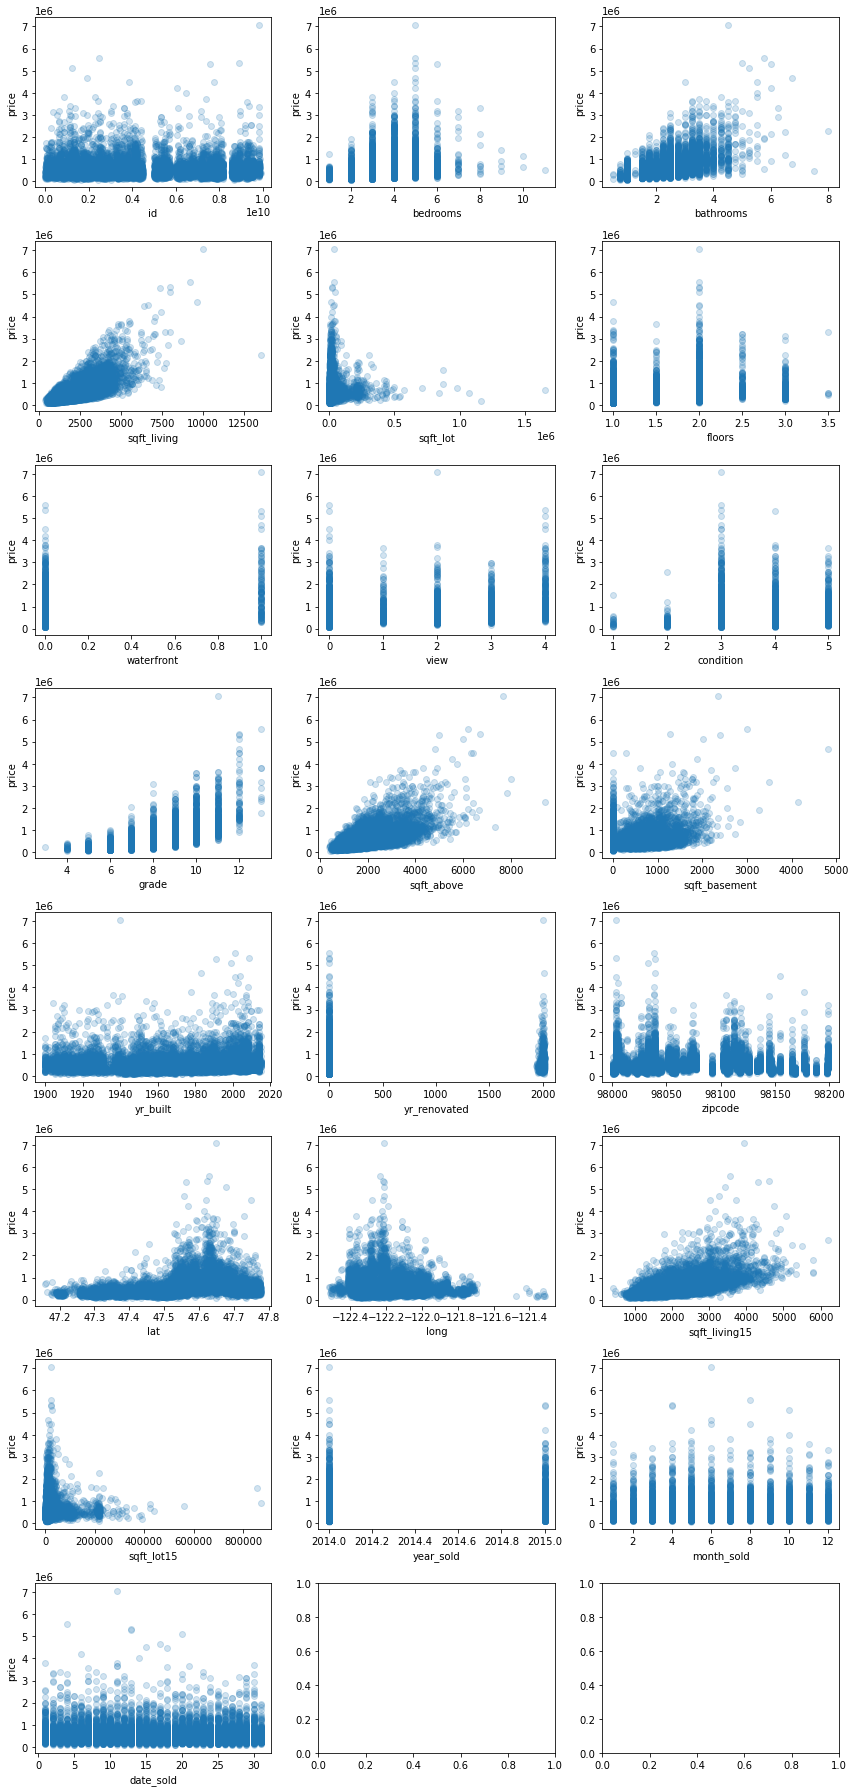

In [25]:
scatterplot(data_df)

In [23]:
data_df.head()

id         price  bedrooms  bathrooms  sqft_living  sqft_lot   floors  \
0  1000102 280000.000000         6   3.000000         2400      9373 2.000000   
1  1200019 647500.000000         4   1.750000         2060     26036 1.000000   
2  1200021 400000.000000         3   1.000000         1460     43000 1.000000   
3  2800031 235000.000000         3   1.000000         1430      7599 1.500000   
4  3600057 402500.000000         4   2.000000         1650      3504 1.000000   

   waterfront     view  condition  ...  yr_built  yr_renovated  zipcode  \
0    0.000000 0.000000          3  ...      1991      0.000000    98002   
1    0.000000 0.000000          4  ...      1947      0.000000    98166   
2    0.000000 0.000000          3  ...      1952      0.000000    98166   
3    0.000000 0.000000          4  ...      1930      0.000000    98168   
4    0.000000 0.000000          3  ...      1951   2013.000000    98144   

        lat        long  sqft_living15  sqft_lot15  year_sold  month_sold  \
0 47.326200 -122.214000           2060        7316       2014           9   
1 47.444400 -122.351000           2590       21891       2014           5   
2 47.443400 -122.347000           2250       20023       2014           8   
3 47.478300 -122.265000           1290       10320       2015           4   
4 47.580300 -122.294000           1480        3504       2015           3   

   date_sold  
0         16  
1          8  
2         11  
3          1  
4         19  

[5 rows x 23 columns]

In [264]:
# Initial exploration suggests possible linearity between price and
# bathrooms, sqft_living, grade, waterfront
# no real relationship between basement size, so turn into binary and check that

# need to deal with yr_renovated, mix between cat and cont so maybe bin centuries
# of renovation (0=never, 1=1900s, 2=2000s)

# lat, long not much use directly
# date/month/year sold not useful for our stakeholders

# need to find a way to try and correlate zipcode

price normality tests
['price', 1.0, 2.1259438653942198e-11, 1.0000000000000053, 0.0, 984016.6924851075]


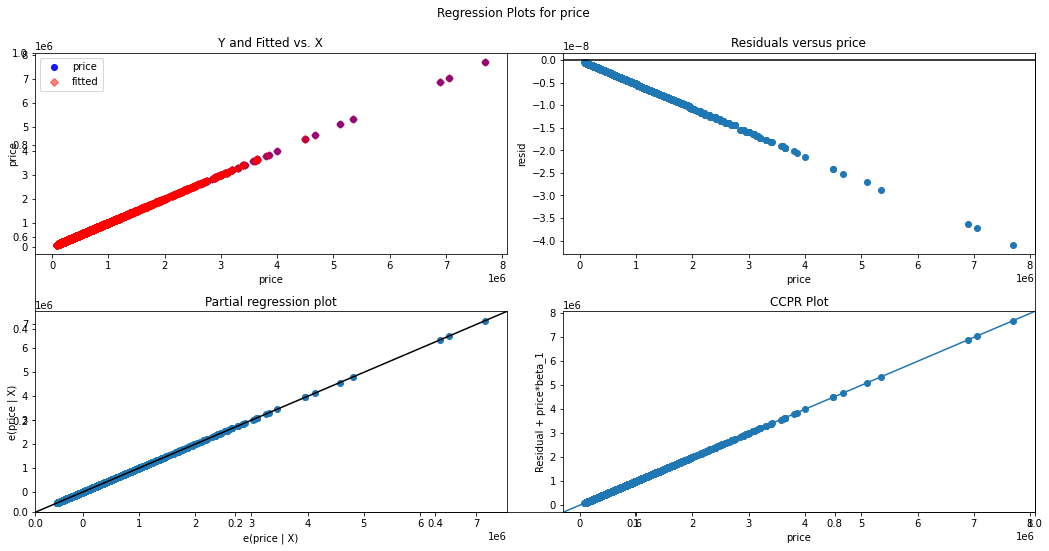

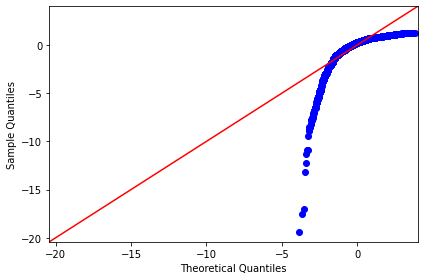

id normality tests
['id', 0.00035255177411841476, 552013.1670468454, -2.415462875432374e-06, 0.017317955549485318, 993615.7556004466]


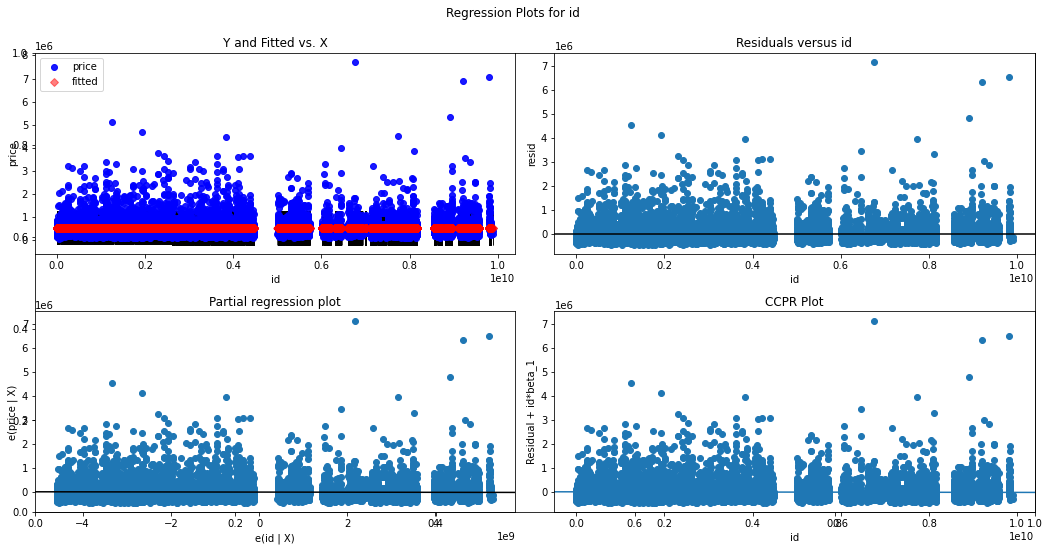

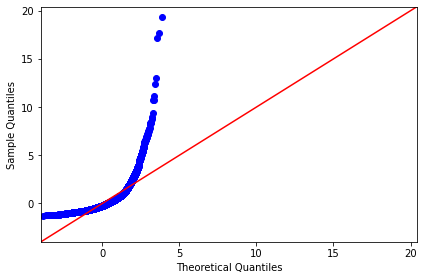

bedrooms normality tests
['bedrooms', 0.09166961765601678, 136451.58236833868, 119845.00880215419, 0.0, 1047777.5284540125]


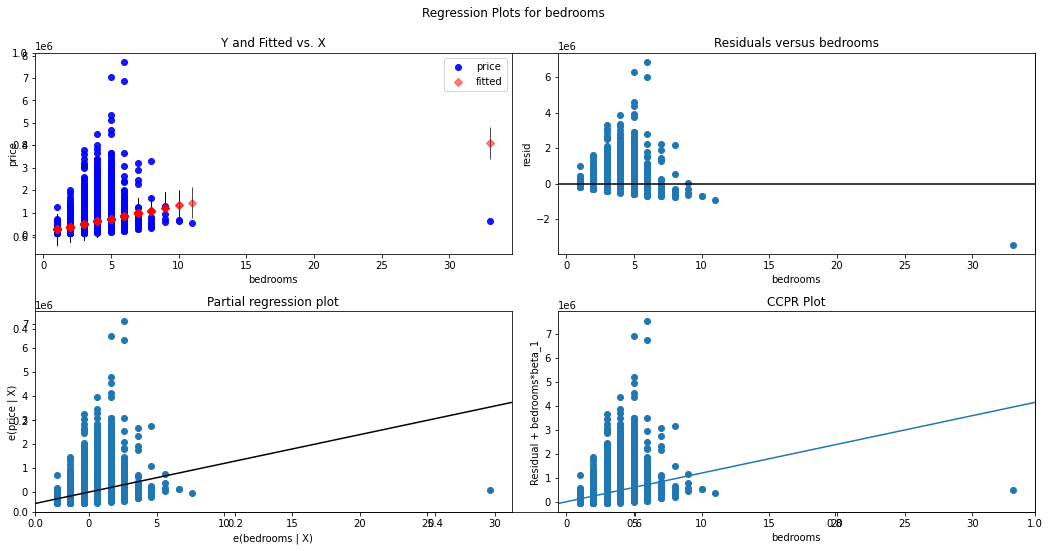

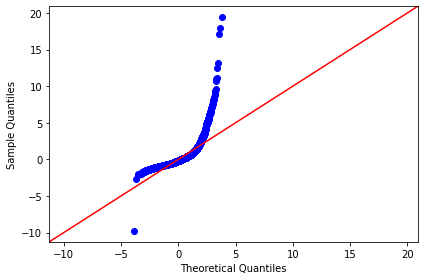

bathrooms normality tests
['bathrooms', 0.27842156275963414, 4438.383656230972, 253255.4188576233, 0.0, 777625.5789297498]


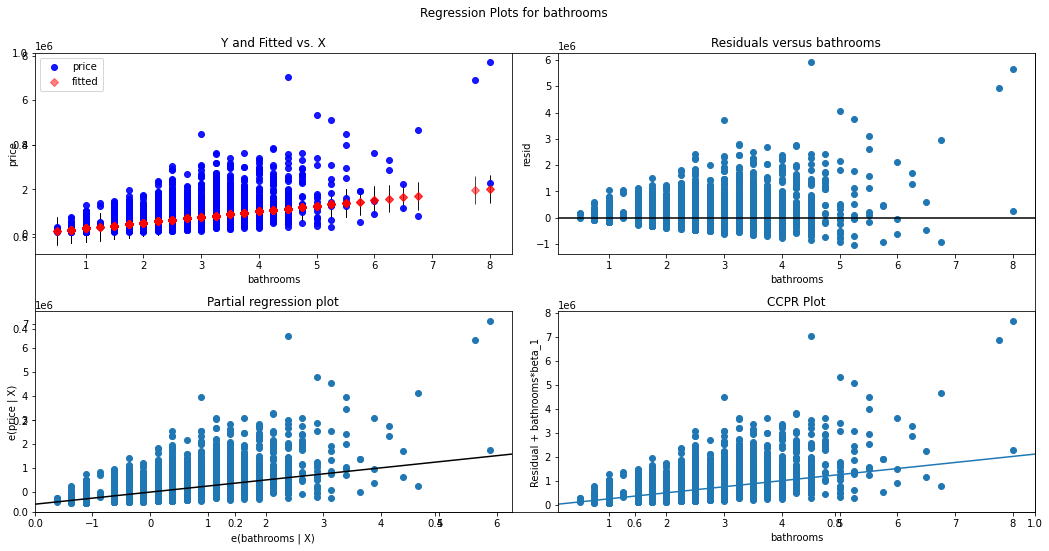

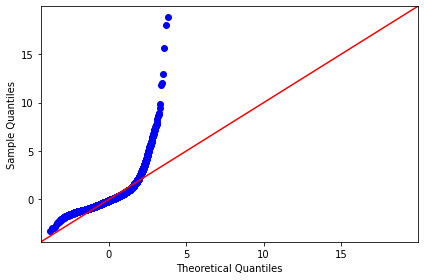

sqft_living normality tests
['sqft_living', 0.48906570749379497, -42016.69928545617, 279.9500190708222, 0.0, 470359.0800081964]


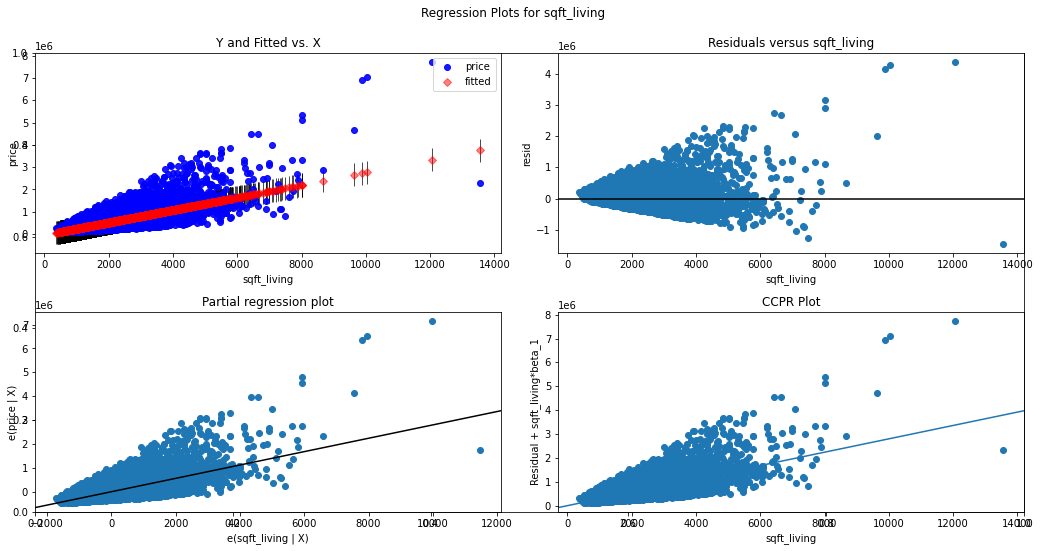

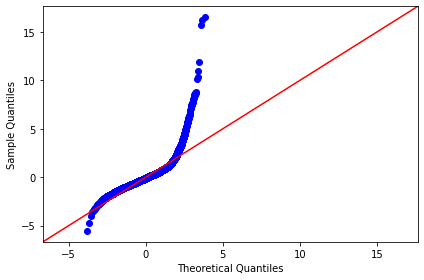

sqft_lot normality tests
['sqft_lot', 0.008742634621908385, 528546.9987263366, 0.8239254409312077, 1.572087700158823e-32, 1004266.525257651]


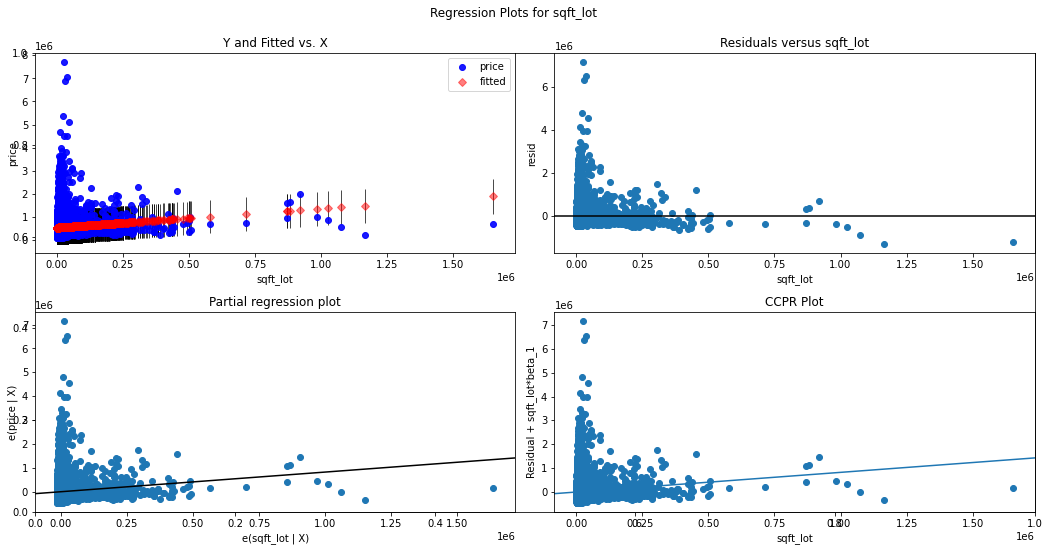

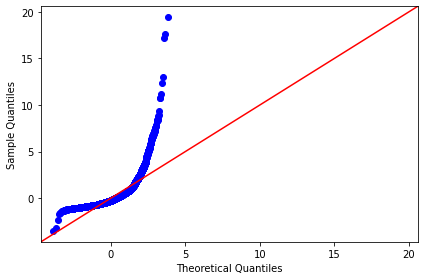

floors normality tests
['floors', 0.06472961064104732, 281319.11789204617, 173721.23538255657, 9.442316130861135e-236, 1091076.847717774]


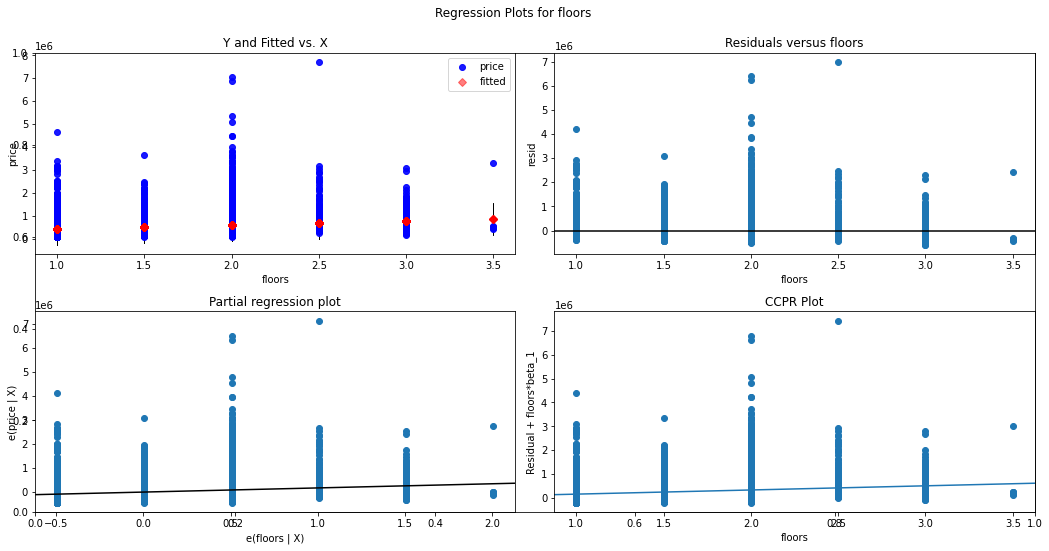

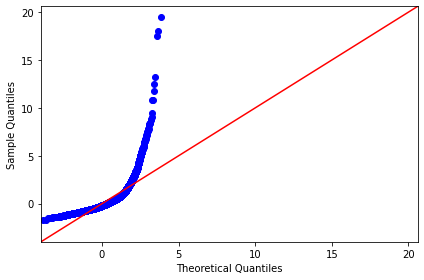

waterfront normality tests
['waterfront', 0.07734068996898857, 532093.0330469673, 1203529.424580216, 3.839226268646292e-283, 809336.8998399943]


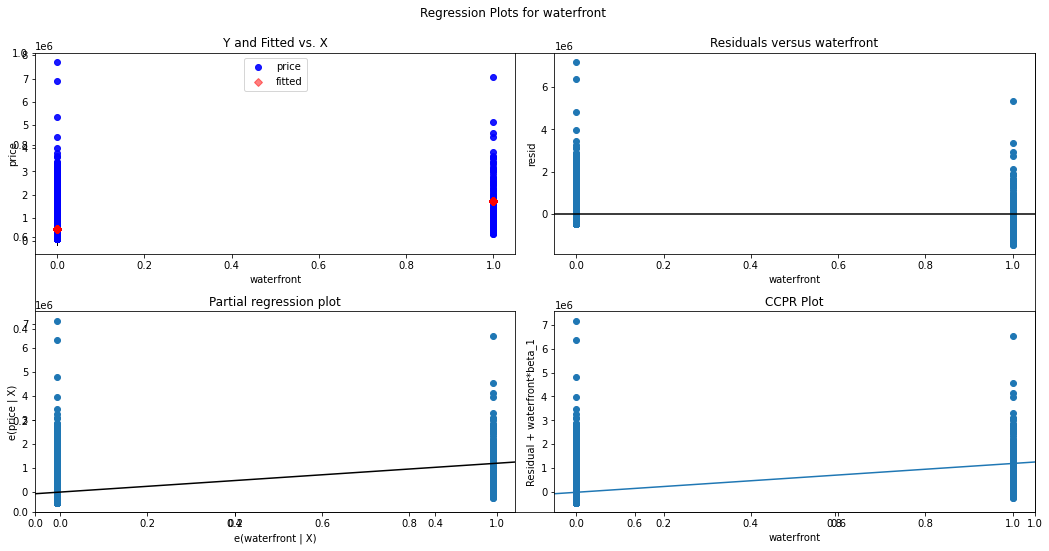

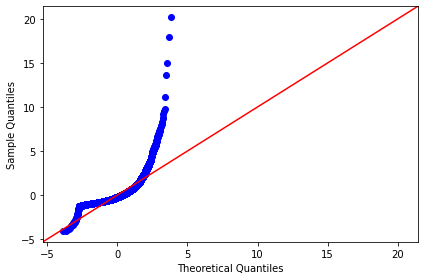

view normality tests
['view', 0.15898427344256583, 496146.1827847359, 194145.3377126804, 0.0, 848317.0439920892]


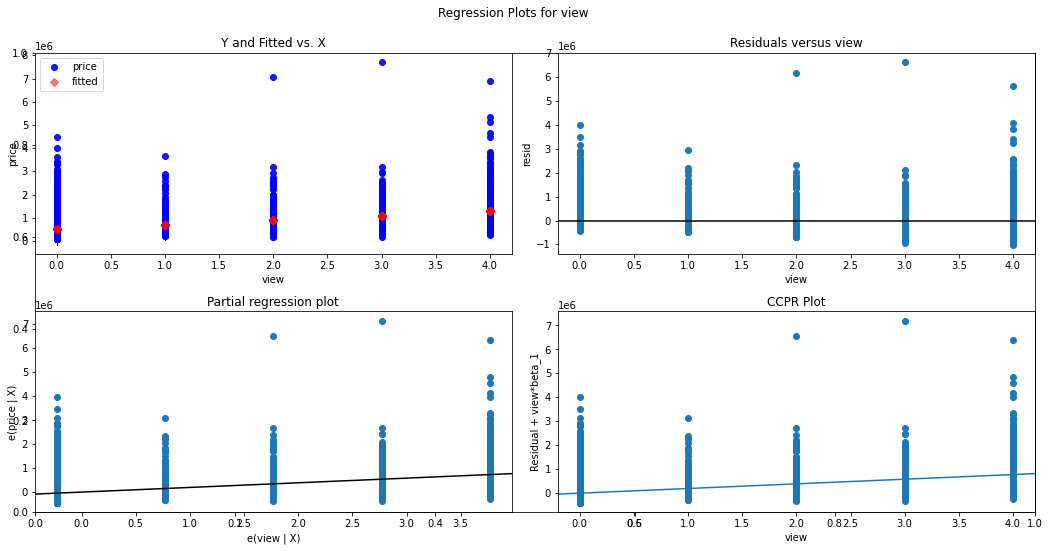

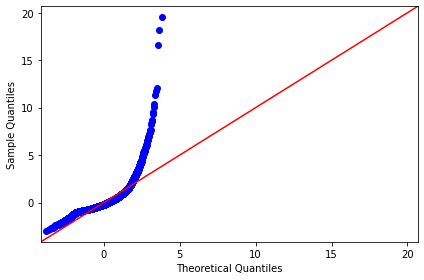

condition normality tests
['condition', 0.0015354235735258737, 465154.1489766629, 22202.98458307368, 6.762343062701399e-07, 994568.8722577756]


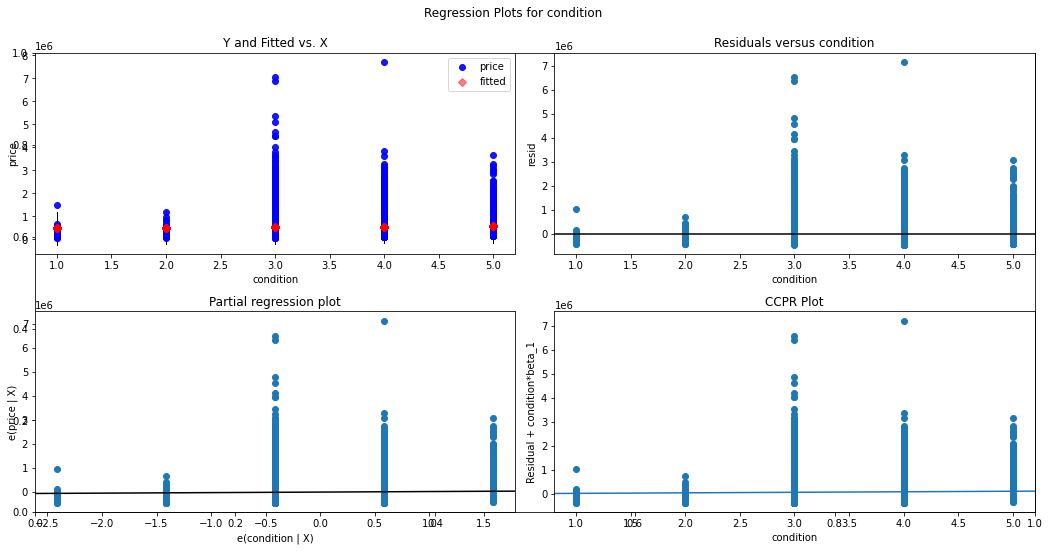

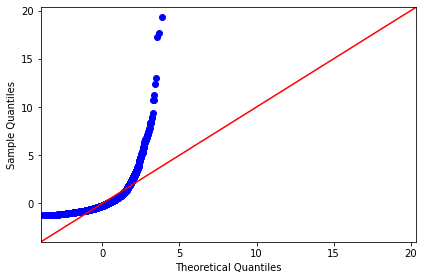

grade normality tests
['grade', 0.44317560955868807, -1069320.5839694494, 210239.63971805974, 0.0, 1885858.8139050177]


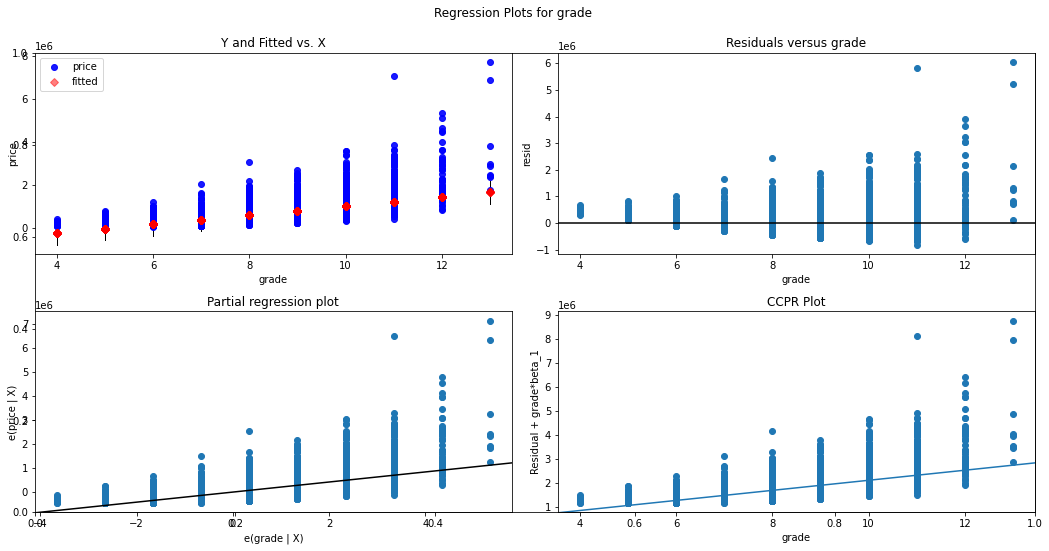

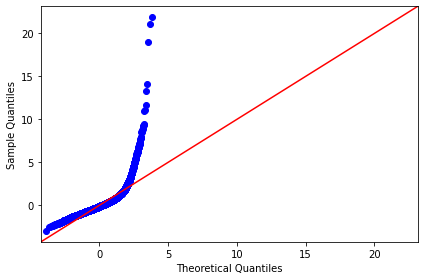

sqft_above normality tests
['sqft_above', 0.3708820084447525, 58326.345888653115, 269.77276619405967, 0.0, 595339.5645444506]


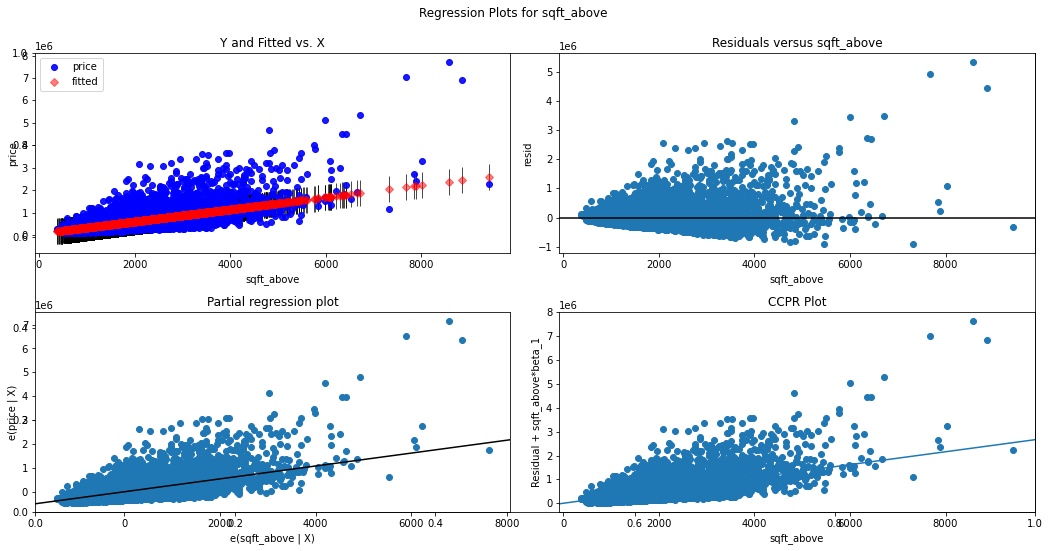

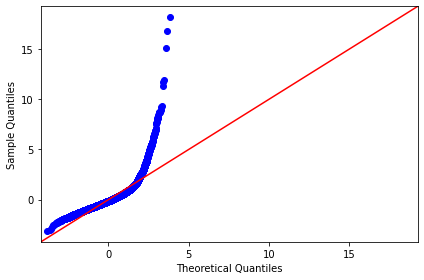

sqft_basement normality tests
['sqft_basement', 0.09433929139038544, 466676.3377404808, 258.2328178137802, 0.0, 812519.8043820673]


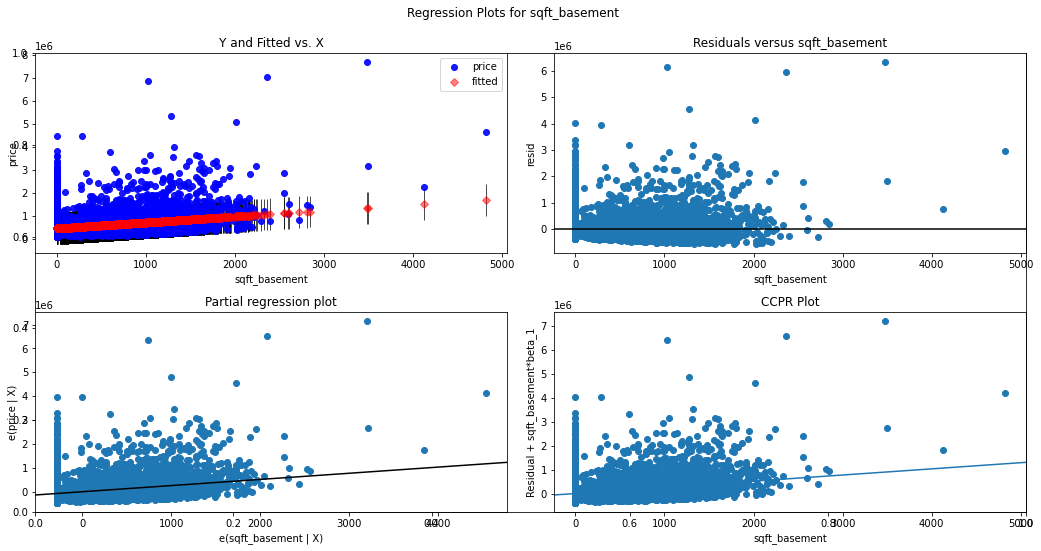

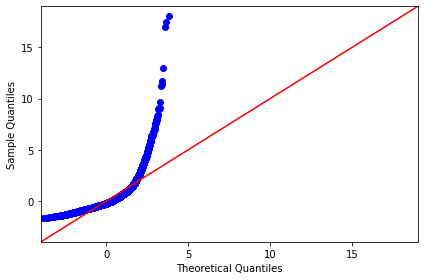

yr_built normality tests
['yr_built', 0.0023410113911885855, -654722.498542225, 606.6589698247847, 8.479528354141389e-10, 999259.5568298073]


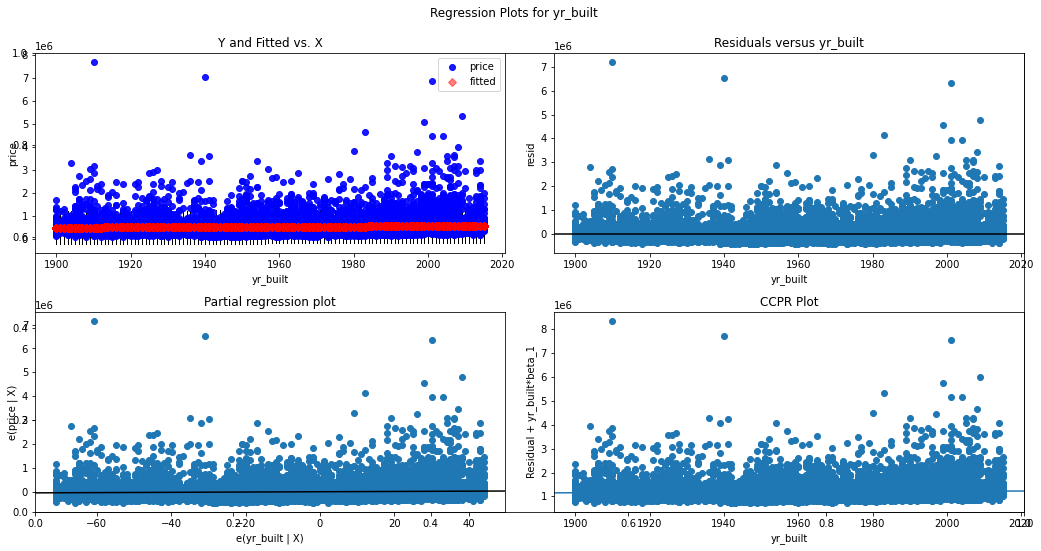

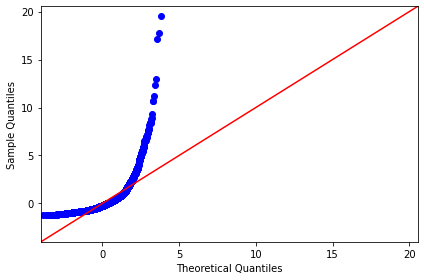

yr_renovated normality tests
['yr_renovated', 0.015154161991610793, 532320.2379740655, 124.67083503473785, 2.7806466885132164e-55, 926401.5960499886]


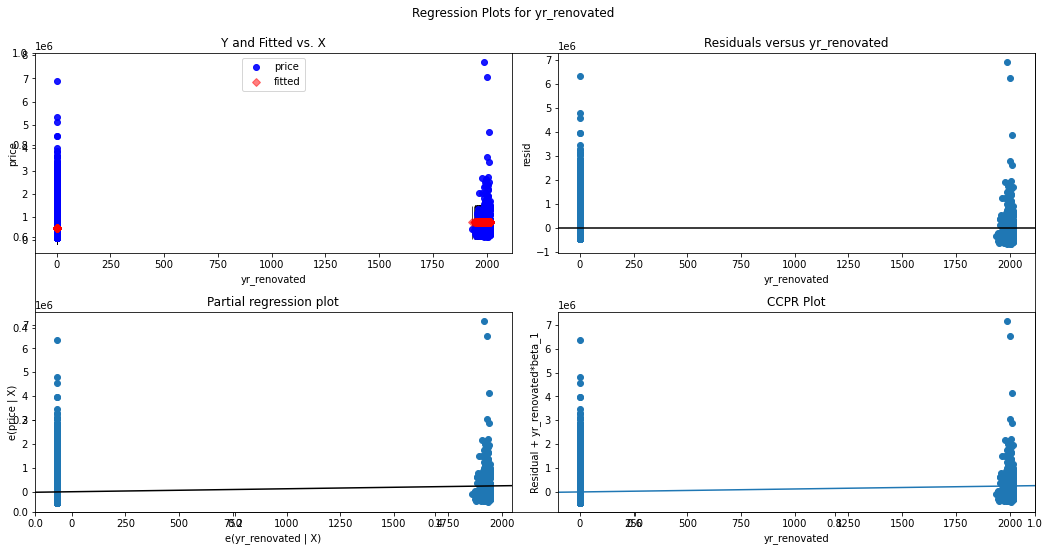

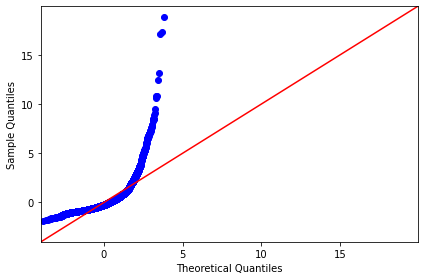

zipcode normality tests
['zipcode', 0.0028286319664659887, 36597922.90412012, -367.6355603252295, 1.5269478852206088e-11, 983320.5969222616]


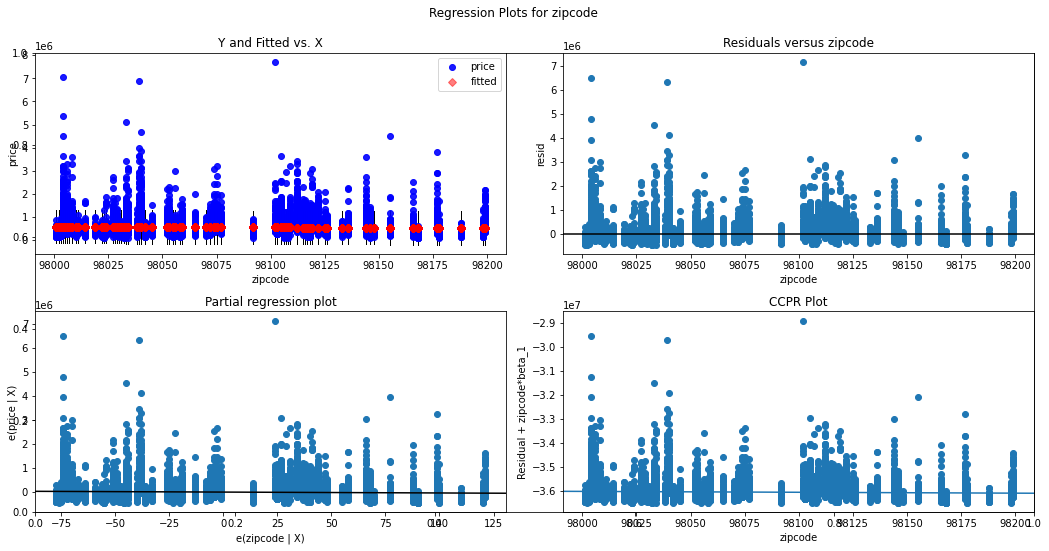

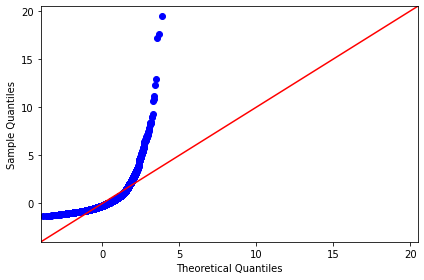

lat normality tests
['lat', 0.09238215375518777, -38072303.23839188, 811875.5639408443, 0.0, 1311236.0826782763]


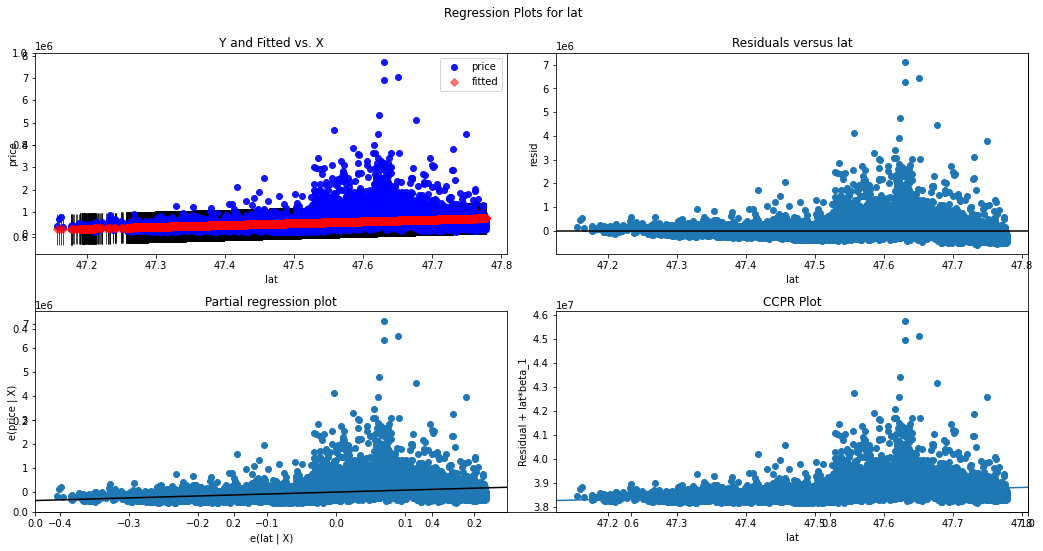

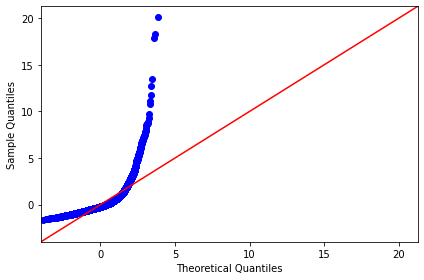

long normality tests
['long', 0.0006431304522702685, 8737666.691054583, 67067.96829281897, 0.0013062973082568366, 994962.5664475766]


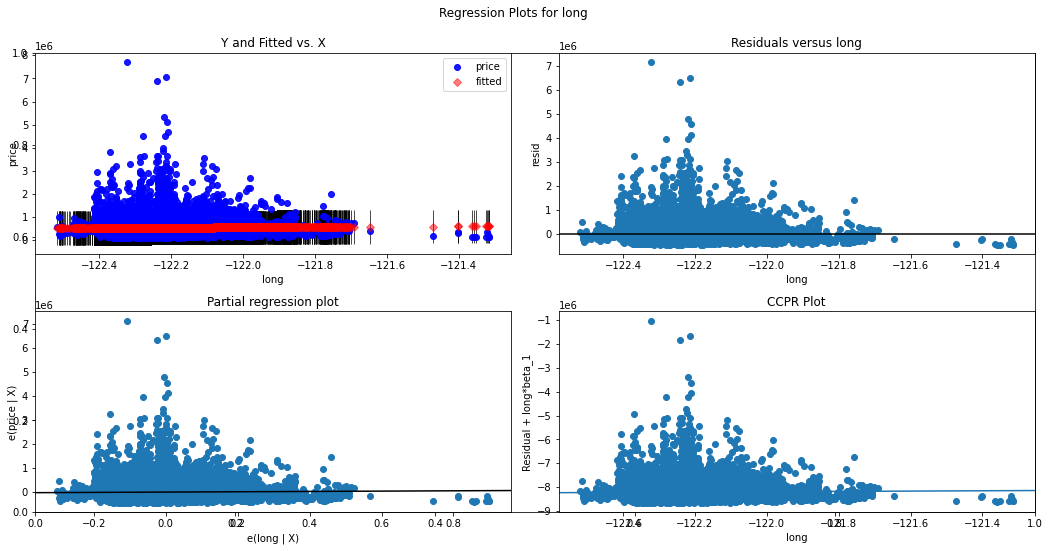

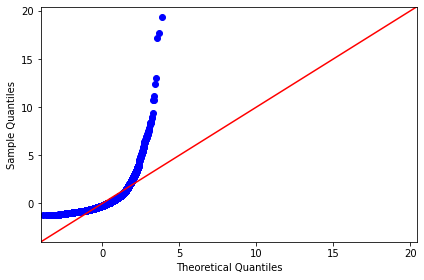

sqft_living15 normality tests
['sqft_living15', 0.3368461266857017, -81375.08968606, 313.52293027674364, 0.0, 1693014.856191993]


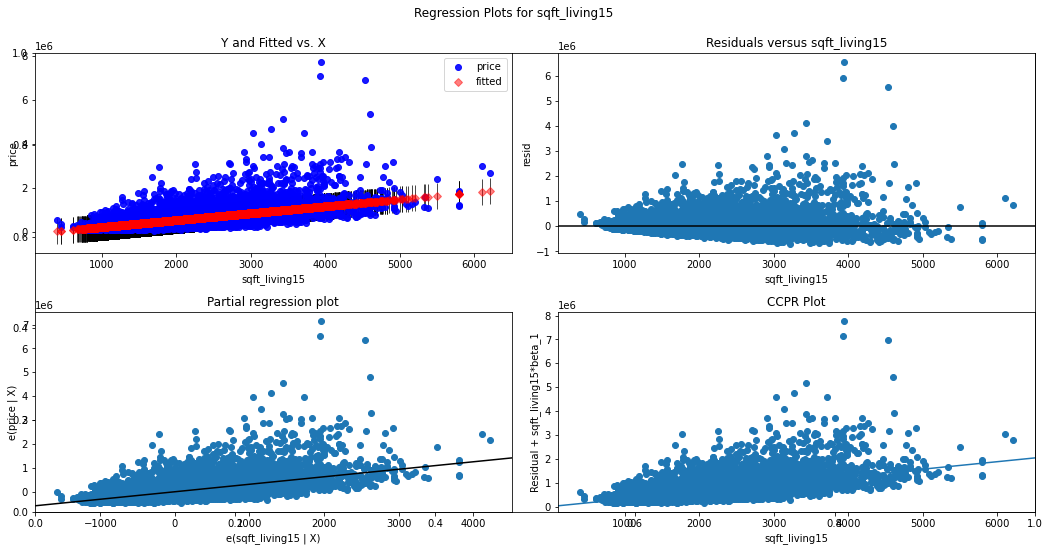

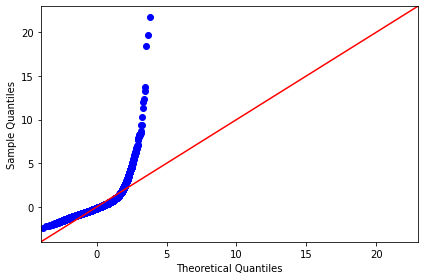

sqft_lot15 normality tests
['sqft_lot15', 0.0078920990499044, 525678.834382724, 1.2059678925089405, 1.6216654021837584e-29, 999903.5306213252]


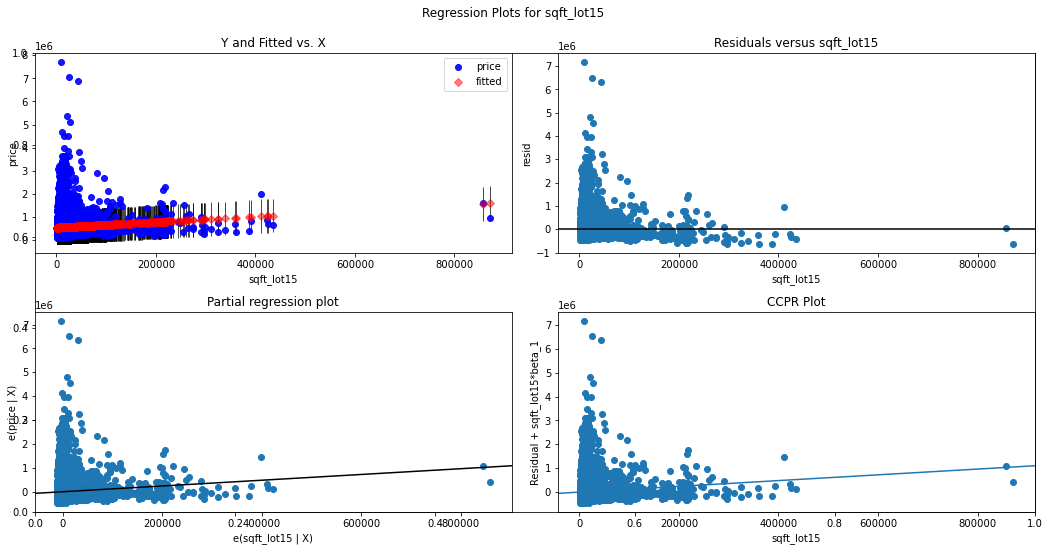

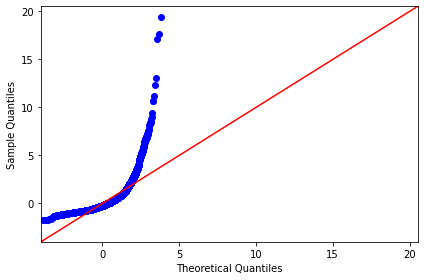

year_sold normality tests
['year_sold', 2.3005306033940798e-05, -7122889.389459009, 3804.672866898618, 0.5432622180276344, 989071.0051897172]


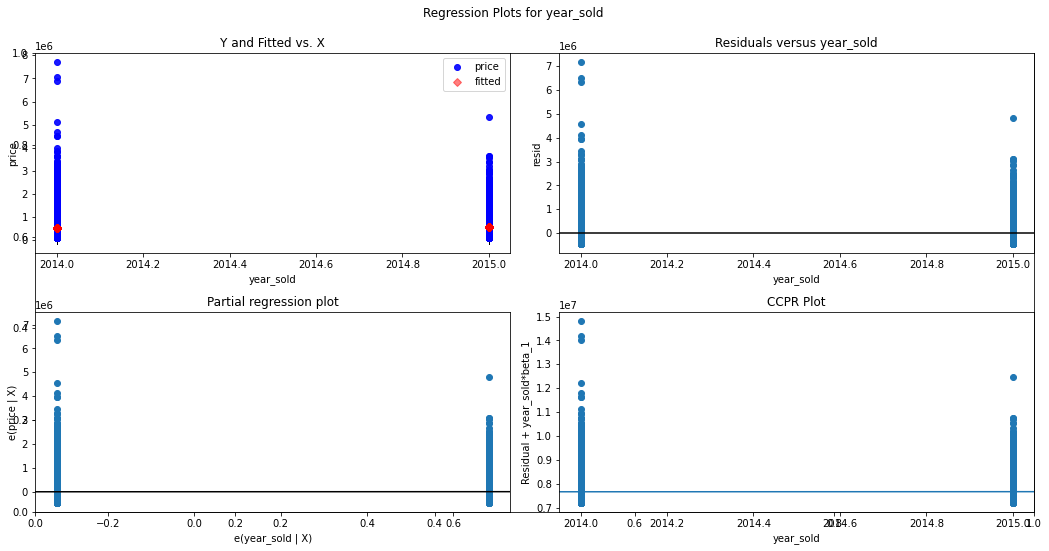

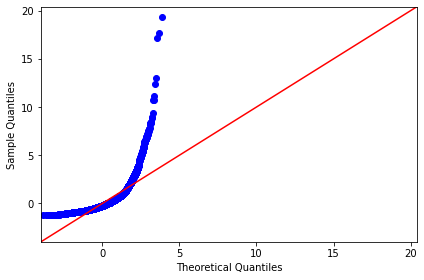

month_sold normality tests
['month_sold', 4.5752549547306565e-05, 546230.6962141411, -805.3245394515022, 0.3912939804475589, 989574.0977148317]


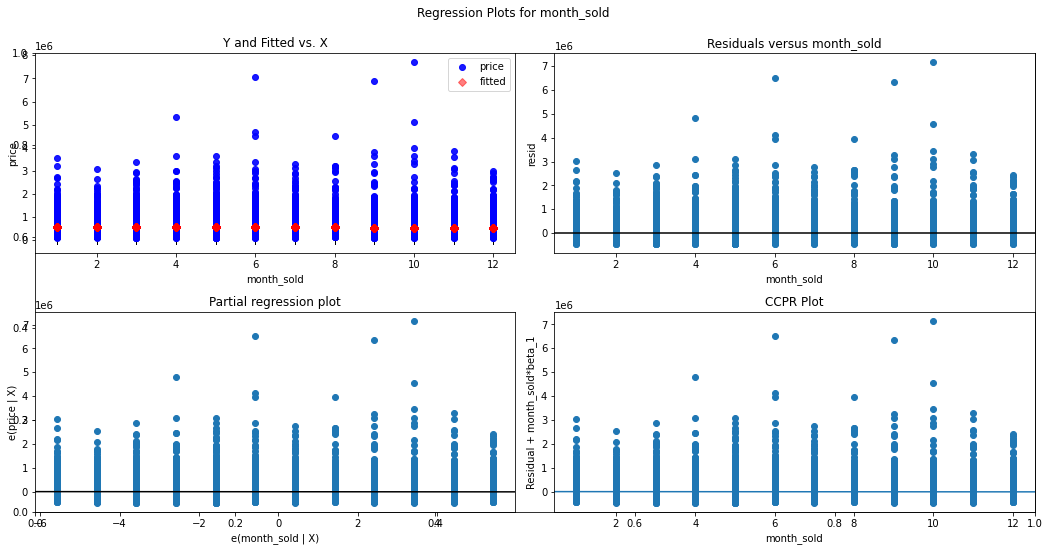

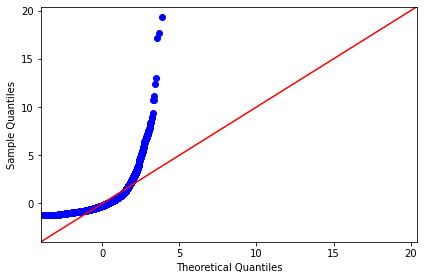

date_sold normality tests
['date_sold', 8.125002756886879e-05, 547003.6720032594, -386.3075026336109, 0.2532780027905021, 987912.0415129786]


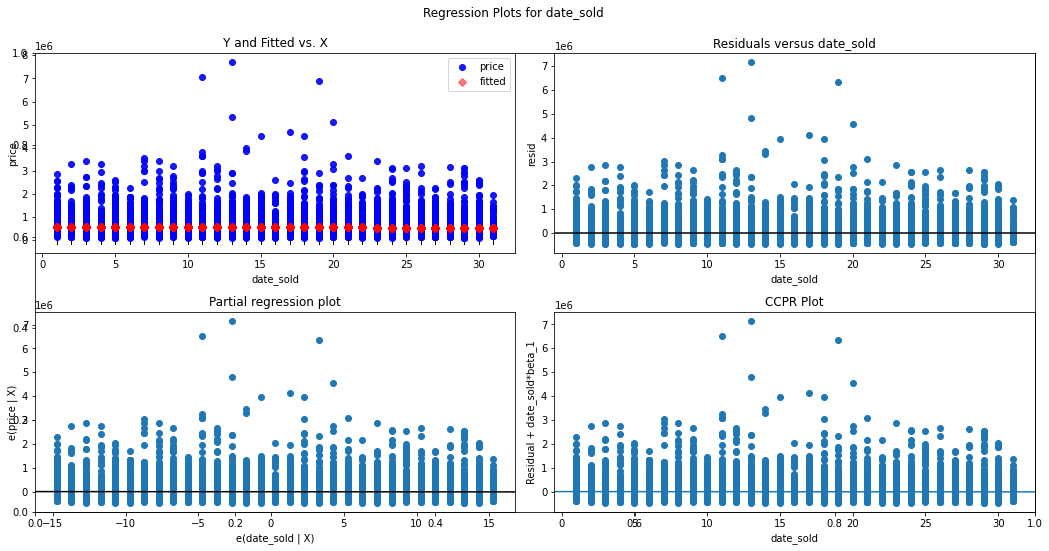

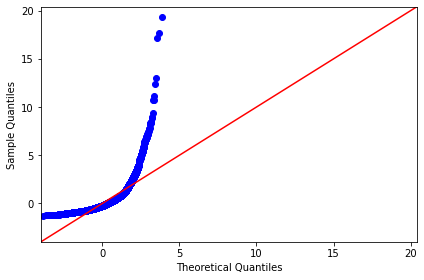

15999   274950.000000
9092    363500.000000
19268   246500.000000
2985    378000.000000
12269   750000.000000
             ...     
17784   618000.000000
20642   725000.000000
10413   390000.000000
5678    957000.000000
1531    585000.000000
Name: price, Length: 16065, dtype: float64

In [27]:
linearity_test(data_df)

In [24]:
# The residuals are very badly skewed so we need to prepare the data - normalise. 
# Get rid of outliers

## Data Preparation

In [18]:
clean_df = data_df.copy()
clean_df = clean_df.drop(['year_sold', 'month_sold', 'date_sold', 'lat', 'long', 'view'], axis=1)

**Find and deal with outliers**

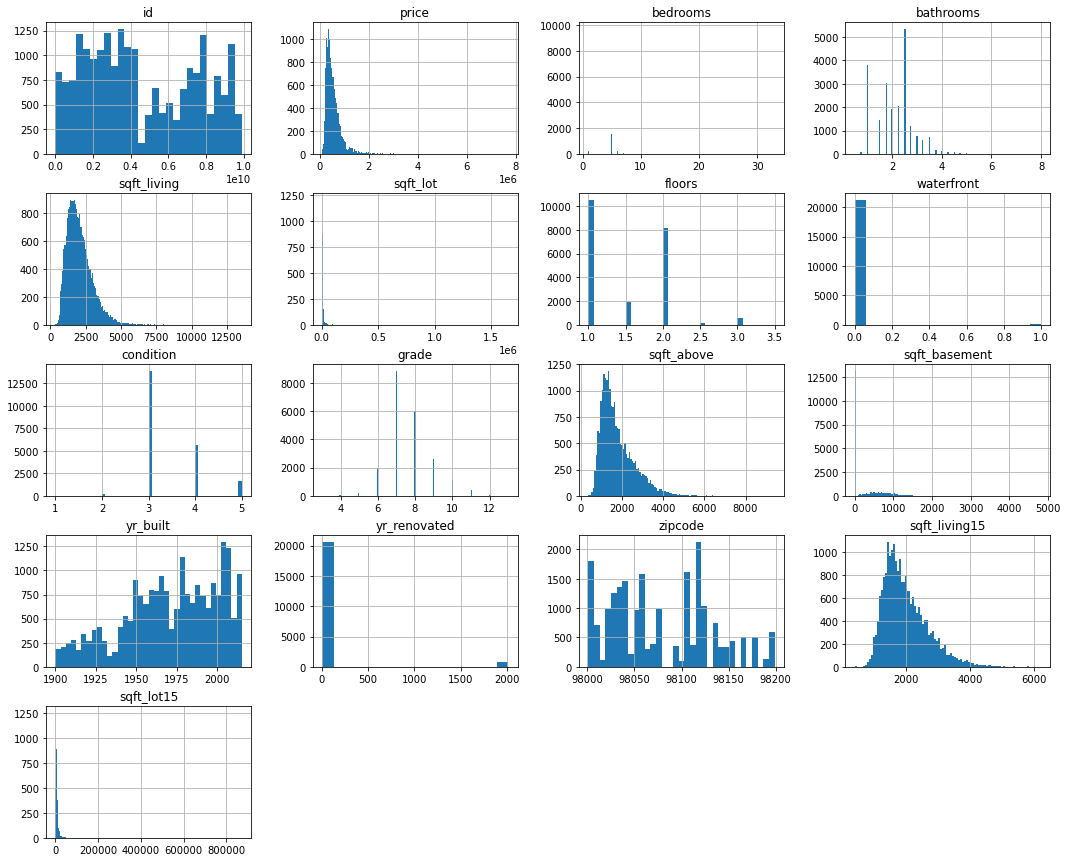

In [29]:
clean_df.hist(figsize=(18,15), bins='auto');

In [298]:
# bedrooms, sqft_lot look to have big outliers. 

In [25]:
clean_df['bedrooms'].sort_values(ascending=False)


6017     33
4261     11
1329     10
13408    10
19333    10
         ..
14462     1
2680      1
7525      1
2947      1
6054      1
Name: bedrooms, Length: 21420, dtype: int64

In [ ]:
# drop 33 bedrooms

In [19]:
clean_df = clean_df.drop(6017).reset_index(drop = True)
clean_df['bedrooms'].sort_values(ascending=False)

4261     11
13407    10
19332    10
1329     10
19385     9
         ..
4832      1
21336     1
4839      1
14540     1
5992      1
Name: bedrooms, Length: 21419, dtype: int64

In [28]:
clean_df['sqft_lot'].describe()

count     21419.000000
mean      15128.464167
std       41531.719520
min         520.000000
25%        5040.000000
50%        7614.000000
75%       10692.000000
max     1651359.000000
Name: sqft_lot, dtype: float64

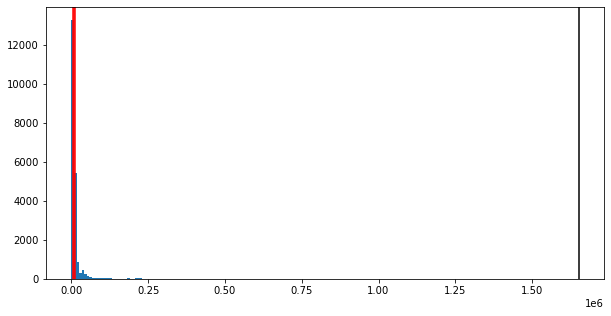

In [27]:
# histogram showing quartiles in red and max in black
plt.figure(figsize=(10,5))
plt.axvline(x=5040, color='red')
plt.axvline(x=7618, color='red')
plt.axvline(x=10685, color='red')
plt.axvline(x=1651359, color='black')
plt.hist(clean_df['sqft_lot'], bins =200);

In [29]:
clean_df['sqft_lot'].sort_values(ascending=False).head(20)

2059    1651359
8817    1164794
6845    1074218
5866    1024068
1493     982998
9784     982278
6869     920423
7013     881654
2412     871200
435      871200
6437     843309
1247     715690
1691     641203
1111     623779
4806     577605
5648     542322
2641     533610
1683     507038
5852     505166
3910     503989
Name: sqft_lot, dtype: int64

In [20]:
# top one is a genuine outlier, others are within reasonable range
clean_df = clean_df.drop(2059).reset_index(drop = True)
clean_df['sqft_lot'].sort_values(ascending=False).head(20)

8816    1164794
6844    1074218
5865    1024068
1493     982998
9783     982278
6868     920423
7012     881654
435      871200
2411     871200
6436     843309
1247     715690
1691     641203
1111     623779
4805     577605
5647     542322
2640     533610
1683     507038
5851     505166
3909     503989
7477     501376
Name: sqft_lot, dtype: int64

**turn sqft_basement into binary and change name**

In [31]:
# turn sqft_basement into binary and change name
clean_df.groupby(['sqft_basement']).count().head()


id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
sqft_basement                                                             
0.000000       13168  13168     13168      13168        13168     13168   
10.000000          1      1         1          1            1         1   
20.000000          1      1         1          1            1         1   
40.000000          4      4         4          4            4         4   
50.000000         11     11        11         11           11        11   

               floors  waterfront  condition  grade  sqft_above  yr_built  \
sqft_basement                                                               
0.000000        13168       13168      13168  13168       13168     13168   
10.000000           1           1          1      1           1         1   
20.000000           1           1          1      1           1         1   
40.000000           4           4          4      4           4         4   
50.000000          11          11         11     11          11        11   

               yr_renovated  zipcode  sqft_living15  sqft_lot15  
sqft_basement                                                    
0.000000              13168    13168          13168       13168  
10.000000                 1        1              1           1  
20.000000                 1        1              1           1  
40.000000                 4        4              4           4  
50.000000                11       11             11          11

In [21]:
clean_df.loc[(clean_df.sqft_basement > 0), 'sqft_basement'] = 1

In [22]:
clean_df = clean_df.rename(columns={'sqft_basement': 'basement'})
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21418 entries, 0 to 21417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21418 non-null  int64  
 1   price          21418 non-null  float64
 2   bedrooms       21418 non-null  int64  
 3   bathrooms      21418 non-null  float64
 4   sqft_living    21418 non-null  int64  
 5   sqft_lot       21418 non-null  int64  
 6   floors         21418 non-null  float64
 7   waterfront     21418 non-null  float64
 8   condition      21418 non-null  int64  
 9   grade          21418 non-null  int64  
 10  sqft_above     21418 non-null  int64  
 11  basement       21418 non-null  float64
 12  yr_built       21418 non-null  int64  
 13  yr_renovated   21418 non-null  float64
 14  zipcode        21418 non-null  int64  
 15  sqft_living15  21418 non-null  int64  
 16  sqft_lot15     21418 non-null  int64  
dtypes: float64(6), int64(11)
memory usage: 2.8 MB


**split date_renovated into 0 for never, 1 for done in 1900s, 2 in 2000s**

In [23]:
clean_df.loc[(0 < clean_df['yr_renovated']) & (clean_df['yr_renovated'] <= 2000), 'yr_renovated'] =1
clean_df.loc[(clean_df.yr_renovated >= 1999), 'yr_renovated'] = 2

**assume sqft_15 correlated with sqft -- check so we can get rid**

In [35]:
clean_df['sqft_living15'].corr(clean_df['sqft_living'])

0.7562423703353838

In [36]:
clean_df['sqft_lot15'].corr(clean_df['sqft_lot'])

0.7202638339760012

In [24]:
clean_df = clean_df.drop(['sqft_lot15', 'sqft_living15'], axis=1)

## Create Clean Model

In [38]:
clean_model = make_ols_model(clean_df, cv=True)[0]
clean_model.summary()

Train score:      0.6479487495044236
Validation score: 0.6444777558689055
Train Root Mean Squarred Error: 219653.7719495942
Test Root Mean Squarred Error: 214709.40887502104
cros_val r2 = 0.6424300120925303


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     2058.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:21:58   Log-Likelihood:            -2.2036e+05
No. Observations:               16063   AIC:                         4.408e+05
Df Residuals:                   16048   BIC:                         4.409e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          2.66e+06   3.64e+06      0.730      0.466   -4.48e+06     9.8e+06
id           -1.656e-06   6.08e-07     -2.722      0.006   -2.85e-06   -4.64e-07
bedrooms     -4.862e+04   2495.763    -19.482      0.000   -5.35e+04   -4.37e+04
bathrooms     5.201e+04   4187.235     12.422      0.000    4.38e+04    6.02e+04
sqft_living    195.4299      7.558     25.859      0.000     180.616     210.244
sqft_lot        -0.2817      0.045     -6.225      0.000      -0.370      -0.193
floors        2.292e+04   4522.278      5.067      0.000    1.41e+04    3.18e+04
waterfront    7.099e+05   2.23e+04     31.844      0.000    6.66e+05    7.54e+05
condition     1.927e+04   2982.124      6.463      0.000    1.34e+04    2.51e+04
grade          1.28e+05   2568.468     49.828      0.000    1.23e+05    1.33e+05
sqft_above     -14.5585      8.257     -1.763      0.078     -30.743       1.626
basement      4240.9608   6434.145      0.659      0.510   -8370.683    1.69e+04
yr_built     -3732.4867     86.546    -43.127      0.000   -3902.127   -3562.846
yr_renovated  3.044e+04   6530.829      4.660      0.000    1.76e+04    4.32e+04
zipcode         39.0873     36.570      1.069      0.285     -32.594     110.768
==============================================================================
Omnibus:                    12656.126   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1007977.283
Skew:                           3.212   Prob(JB):                         0.00
Kurtosis:                      41.272   Cond. No.                     1.14e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Turn Zipcode into OHE Cities/Nbhoods

### zip_code to city

In [25]:
city_df = clean_df.copy()

#### Ignore this code block if json files are opened at begining of notebook. 
This code block creates a dictionary of zipcodes to city using Geonames api. This is saved as json file and opened at beginning of notebook due to the time taken to construct

In [48]:
zip_list = city_df['zipcode'].unique().tolist()
zip_list

[98002,
 98166,
 98168,
 98144,
 98178,
 98108,
 98032,
 98055,
 98118,
 98122,
 98115,
 98007,
 98034,
 98052,
 98042,
 98040,
 98136,
 98126,
 98146,
 98188,
 98059,
 98109,
 98116,
 98103,
 98006,
 98075,
 98024,
 98155,
 98003,
 98023,
 98117,
 98177,
 98019,
 98028,
 98092,
 98022,
 98070,
 98038,
 98107,
 98106,
 98065,
 98053,
 98072,
 98077,
 98133,
 98001,
 98056,
 98045,
 98033,
 98011,
 98014,
 98199,
 98008,
 98031,
 98004,
 98074,
 98030,
 98027,
 98029,
 98058,
 98010,
 98005,
 98198,
 98148,
 98112,
 98125,
 98105,
 98102,
 98119,
 98039]

In [49]:
#run the api call
zip_dic = {}
for z in zip_list:
    url = f'http://api.geonames.org/postalCodeLookupJSON?postalcode={z}&country=US&username=JamesPheby'
    response=requests.get(url)
    town_r = json.loads(response.content.decode('utf-8')) 
    town = town_r['postalcodes'][0]['placeName']
    zip_dic[z]=town
zip_dic

{98002: 'Auburn',
 98166: 'Seattle',
 98168: 'Seattle',
 98144: 'Seattle',
 98178: 'Seattle',
 98108: 'Seattle',
 98032: 'Kent',
 98055: 'Renton',
 98118: 'Seattle',
 98122: 'Seattle',
 98115: 'Seattle',
 98007: 'Bellevue',
 98034: 'Kirkland',
 98052: 'Redmond',
 98042: 'Kent',
 98040: 'Mercer Island',
 98136: 'Seattle',
 98126: 'Seattle',
 98146: 'Seattle',
 98188: 'Seattle',
 98059: 'Renton',
 98109: 'Seattle',
 98116: 'Seattle',
 98103: 'Seattle',
 98006: 'Bellevue',
 98075: 'Sammamish',
 98024: 'Fall City',
 98155: 'Seattle',
 98003: 'Federal Way',
 98023: 'Federal Way',
 98117: 'Seattle',
 98177: 'Seattle',
 98019: 'Duvall',
 98028: 'Kenmore',
 98092: 'Auburn',
 98022: 'Enumclaw',
 98070: 'Vashon',
 98038: 'Maple Valley',
 98107: 'Seattle',
 98106: 'Seattle',
 98065: 'Snoqualmie',
 98053: 'Redmond',
 98072: 'Woodinville',
 98077: 'Woodinville',
 98133: 'Seattle',
 98001: 'Auburn',
 98056: 'Renton',
 98045: 'North Bend',
 98033: 'Kirkland',
 98011: 'Bothell',
 98014: 'Carnation',
 

In [50]:
#save the dictionary as json file
with open("data/zip_dic.json", "w") as zd:
    json.dump(zip_dic, zd)

### apply to dataframe

In [26]:
for index, row in city_df.iterrows(): 
    zipc = str(int(row['zipcode']))
    place = zip_dic[zipc].replace(" ", "")
    city_df.loc[index, 'PlaceName'] = place
city_df.head()

id         price  bedrooms  bathrooms  sqft_living  sqft_lot   floors  \
0  1000102 280000.000000         6   3.000000         2400      9373 2.000000   
1  1200019 647500.000000         4   1.750000         2060     26036 1.000000   
2  1200021 400000.000000         3   1.000000         1460     43000 1.000000   
3  2800031 235000.000000         3   1.000000         1430      7599 1.500000   
4  3600057 402500.000000         4   2.000000         1650      3504 1.000000   

   waterfront  condition  grade  sqft_above  basement  yr_built  yr_renovated  \
0    0.000000          3      7        2400  0.000000      1991      0.000000   
1    0.000000          4      8        1160  1.000000      1947      0.000000   
2    0.000000          3      7        1460  0.000000      1952      0.000000   
3    0.000000          4      6        1010  1.000000      1930      0.000000   
4    0.000000          3      7         760  1.000000      1951      2.000000   

   zipcode PlaceName  
0    98002    Auburn  
1    98166   Seattle  
2    98166   Seattle  
3    98168   Seattle  
4    98144   Seattle

### Turn Seattle into nbhoods
Seattle is 8* bigger than other cities, need to be more granular. Even if doesn't improve model, it will give more information to the stakeholder <br>
Will split up into neighbourhoods where possible using geonames api. Sometimes it can't find the result, so we need to enter those manually


#### don't need to run this section as it takes a long time to make api calls. As before, resulting dictionary is saved and loaded at start of session

In [59]:
seattle_df = pd.concat([data_df, city_df], join='inner', axis=1)
seattle_df = seattle_df[seattle_df['PlaceName'] == 'Seattle']

In [66]:
seattle_df = seattle_df.iloc[:, [0,15,16,17,38]]
seattle_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8884 entries, 1 to 21417
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         8884 non-null   int64  
 1   zipcode    8884 non-null   int64  
 2   lat        8884 non-null   float64
 3   long       8884 non-null   float64
 4   PlaceName  8884 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 416.4+ KB


In [67]:
#api calls
zip_nb_dic={}
zip_no_return=[]
for index, row in seattle_df.iterrows():
    zc = str(row['zipcode'])
    lat_n = round(row['lat'],3)
    long_n = round(row['long'],3)
    url_n = f'http://api.geonames.org/neighbourhoodJSON?lat={lat_n}&lng={long_n}&username=JamesPheby'
    response_n=requests.get(url_n)
    r_n = json.loads(response_n.content.decode('utf-8')) 
    try:
        nbh = r_n['neighbourhood']['name']
        zip_nb_dic[zc] = nbh
    except:
        zip_no_return.append(zc)

In [68]:
with open("data/zip_nb_dic.json", "w") as zn:
    json.dump(zip_nb_dic, zn)

#### run cells from here, takes the dictionary and updates the dataframe with neighbourhoods of Seattle

In [27]:
for index, row in city_df.iterrows():
    zzc = str(int(row['zipcode']))
    if zzc in list(zip_nb_dic.keys()):
        nhood = zip_nb_dic[zzc].replace(" ", "")
        city_df.loc[index, 'PlaceName'] = nhood
city_df.head()


id         price  bedrooms  bathrooms  sqft_living  sqft_lot   floors  \
0  1000102 280000.000000         6   3.000000         2400      9373 2.000000   
1  1200019 647500.000000         4   1.750000         2060     26036 1.000000   
2  1200021 400000.000000         3   1.000000         1460     43000 1.000000   
3  2800031 235000.000000         3   1.000000         1430      7599 1.500000   
4  3600057 402500.000000         4   2.000000         1650      3504 1.000000   

   waterfront  condition  grade  sqft_above  basement  yr_built  yr_renovated  \
0    0.000000          3      7        2400  0.000000      1991      0.000000   
1    0.000000          4      8        1160  1.000000      1947      0.000000   
2    0.000000          3      7        1460  0.000000      1952      0.000000   
3    0.000000          4      6        1010  1.000000      1930      0.000000   
4    0.000000          3      7         760  1.000000      1951      2.000000   

   zipcode   PlaceName  
0    98002      Auburn  
1    98166     Seattle  
2    98166     Seattle  
3    98168     Seattle  
4    98144  MountBaker

In [28]:
# manually insert failed nbhood
fail_df = city_df[city_df['PlaceName'] == 'Seattle']
z_fail_list = fail_df['zipcode'].tolist()
fail_list = list(set(z_fail_list))
fail_list 

[98148, 98155, 98188, 98166, 98198, 98168]

In [29]:
manual_zip_nb_dic = {'98148':'Burien', '98155':'Shoreline', '98188':'Seatec', '98166': 'Normandy Park', '98198':'Des Moines', '98168':'Tukwila'}
for index, row in city_df.iterrows():
    zfc = str(int(row['zipcode']))
    if zfc in list(manual_zip_nb_dic.keys()):
        nh = manual_zip_nb_dic[zfc].replace(" ", "")
        city_df.loc[index, 'PlaceName'] = nh
city_df.head()

id         price  bedrooms  bathrooms  sqft_living  sqft_lot   floors  \
0  1000102 280000.000000         6   3.000000         2400      9373 2.000000   
1  1200019 647500.000000         4   1.750000         2060     26036 1.000000   
2  1200021 400000.000000         3   1.000000         1460     43000 1.000000   
3  2800031 235000.000000         3   1.000000         1430      7599 1.500000   
4  3600057 402500.000000         4   2.000000         1650      3504 1.000000   

   waterfront  condition  grade  sqft_above  basement  yr_built  yr_renovated  \
0    0.000000          3      7        2400  0.000000      1991      0.000000   
1    0.000000          4      8        1160  1.000000      1947      0.000000   
2    0.000000          3      7        1460  0.000000      1952      0.000000   
3    0.000000          4      6        1010  1.000000      1930      0.000000   
4    0.000000          3      7         760  1.000000      1951      2.000000   

   zipcode     PlaceName  
0    98002        Auburn  
1    98166  NormandyPark  
2    98166  NormandyPark  
3    98168       Tukwila  
4    98144    MountBaker

In [30]:
#places much more evenly distributed
city_df['PlaceName'].value_counts().head(50)

Renton               1580
Kent                 1193
Redmond               971
Auburn                906
PhinneyRidge          863
Sammamish             793
FederalWay            768
Broadview             738
Issaquah              731
Admiral               681
MapleValley           586
ViewRidge             576
Greenwood             548
Juanita               543
SewardPark            498
Lakemont              490
Shoreline             442
NorthRoseHill         431
VictoryHeights        402
MountBaker            340
HighPoint             330
Magnolia              316
ClydeHill             315
Snoqualmie            305
Leschi                289
WestLakeSammamish     283
Kenmore               282
MercerIsland          282
ArborHeights          281
DesMoines             275
WestWellington        272
MadisonValley         268
Tukwila               264
WestSeattle           263
RainierBeach          258
NormandyPark          250
Enumclaw              232
Ravenna               229
NorthBend   

## Make Dataframes of Continuous and Categorical Values 
Also dataframe where ambiguous values are treated as continuous, and another where treated as categorical<br>
Test which columns we need to apply log transform to

In [31]:
# split dataframe into continuous values, categorical, and ambiguous. 
# Will try ambiguous as both to see which gives best results

cont_list = ['sqft_living', 'sqft_lot', 'sqft_above']
cat_list = ['waterfront', 'basement']
ambiguous_list = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'yr_renovated', 'yr_built']

In [32]:
# function to create log values to reduce skew
def log(df, con_list):
    continuous = df[con_list]
    continuous_log = np.log(continuous)
    return continuous_log

### dataframes used to find which features to log, but which we won't need
the aim is to find the simplest model that meets linearity assumptions. Initially I logged all continuous variables and tested results, then just the target variable, then none. <br>
Only all and then target met the linearity assumptions, so we go with the target as that is the simplest of the two and easiest to interpret for stakeholder.<br>
This is the code used to create the testing dataframes that we won't end up using<br>
I also tested whether the ambiguous categories needed to be logged, which I'd rather not do as it means finding a way to deal with the 0s. Logging had no bearing on linearity assumptions, so kept as base units 

In [45]:
# all logged
amb_continuous = city_df[ambiguous_list]
continuous = log(city_df, cont_list)

In [46]:
# none logged
price_d = city_df['price']
amb_continuous = city_df[ambiguous_list]
continuous = city_df[cont_list]

### Dataframes we ended up using

In [33]:
# only target is logged
log_price = log(city_df, 'price')
amb_continuous = city_df[ambiguous_list]
continuous = city_df[cont_list]

In [34]:
#categorical vars
cat_df=city_df[cat_list]

In [35]:
# dataframe where cities/nbhoods are OHE'd
place_df = city_df['PlaceName']

In [36]:
place_df = pd.get_dummies(place_df, drop_first=True)
place_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21418 entries, 0 to 21417
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ArborHeights       21418 non-null  uint8
 1   Auburn             21418 non-null  uint8
 2   BeaconHill         21418 non-null  uint8
 3   BlackDiamond       21418 non-null  uint8
 4   Bothell            21418 non-null  uint8
 5   BridleTrails       21418 non-null  uint8
 6   Broadview          21418 non-null  uint8
 7   Burien             21418 non-null  uint8
 8   CapitolHill        21418 non-null  uint8
 9   Carnation          21418 non-null  uint8
 10  ClydeHill          21418 non-null  uint8
 11  DesMoines          21418 non-null  uint8
 12  Duvall             21418 non-null  uint8
 13  Enumclaw           21418 non-null  uint8
 14  FallCity           21418 non-null  uint8
 15  FederalWay         21418 non-null  uint8
 16  Greenwood          21418 non-null  uint8
 17  HighPoint   

In [51]:
# make dataframe where ambiguous features are OHE'd, for the next model
amb_cat = city_df[ambiguous_list]
amb_cat = amb_cat.astype(str)
amb_cat = pd.get_dummies(amb_cat, drop_first=False)

## Make Model Using Ambiguous Features as Continuous

In [39]:
amb_cont_preprocessed = pd.concat([log_price, amb_continuous, continuous, cat_df, place_df], axis=1)

In [40]:
amb_cont_model = make_ols_model(amb_cont_preprocessed, cv=True)[0]

Train score:      0.8618543110945394
Validation score: 0.8574576602152748
Train Root Mean Squarred Error: 0.19622216889635777
Test Root Mean Squarred Error: 0.19604596207286956
cros_val r2 = 0.8570136249801219


In [41]:
amb_cont_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1494.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:40:33   Log-Likelihood:                 3366.3
No. Observations:               16063   AIC:                            -6599.
Df Residuals:                   15996   BIC:                            -6084.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.1063      0.173     75.829      0.000      12.768      13.445
bedrooms             -0.0027      0.002     -1.171      0.242      -0.007       0.002
bathrooms             0.0408      0.004     10.787      0.000       0.033       0.048
floors               -0.0328      0.004     -7.334      0.000      -0.042      -0.024
condition             0.0575      0.003     21.068      0.000       0.052       0.063
grade                 0.1196      0.002     48.335      0.000       0.115       0.124
yr_renovated          0.0500      0.006      8.505      0.000       0.038       0.061
yr_built             -0.0008      9e-05     -8.627      0.000      -0.001      -0.001
sqft_living           0.0001    6.7e-06     20.046      0.000       0.000       0.000
sqft_lot            5.75e-07   4.08e-08     14.097      0.000    4.95e-07    6.55e-07
sqft_above            0.0001    7.4e-06     14.150      0.000    9.02e-05       0.000
waterfront            0.6482      0.019     33.513      0.000       0.610       0.686
basement              0.0402      0.006      6.947      0.000       0.029       0.051
ArborHeights         -0.3567      0.016    -22.102      0.000      -0.388      -0.325
Auburn               -0.6240      0.012    -52.380      0.000      -0.647      -0.601
BeaconHill           -0.2978      0.019    -15.793      0.000      -0.335      -0.261
BlackDiamond         -0.4014      0.025    -15.940      0.000      -0.451      -0.352
Bothell              -0.1743      0.018     -9.613      0.000      -0.210      -0.139
BridleTrails          0.0941      0.020      4.782      0.000       0.056       0.133
Broadview            -0.1310      0.012    -10.802      0.000      -0.155      -0.107
Burien               -0.4764      0.032    -15.048      0.000      -0.538      -0.414
CapitolHill           0.2561      0.025     10.302      0.000       0.207       0.305
Carnation            -0.3083      0.022    -13.945      0.000      -0.352      -0.265
ClydeHill             0.4739      0.016     30.323      0.000       0.443       0.505
DesMoines            -0.5539      0.017    -33.567      0.000      -0.586      -0.522
Duvall               -0.2871      0.019    -14.979      0.000      -0.325      -0.250
Enumclaw             -0.5490      0.018    -30.629      0.000      -0.584      -0.514
FallCity             -0.2162      0.029     -7.461      0.000      -0.273      -0.159
FederalWay           -0.6511      0.012    -53.312      0.000      -0.675      -0.627
Greenwood             0.1298      0.013     10.101      0.000       0.105       0.155
HighPoint            -0.3291      0.015    -21.826      0.000      -0.359      -0.300
Issaquah             -0.0894      0.012     -7.208      0.000      -0.114      -0.065
Juanita              -0.0955      0.013     -7.230      0.000      -0.121

### check linearity assumptions

price normality tests
['price', 1.0, 4.574118861455645e-14, 1.0000000000000002, 0.0, 3513520.275532173]


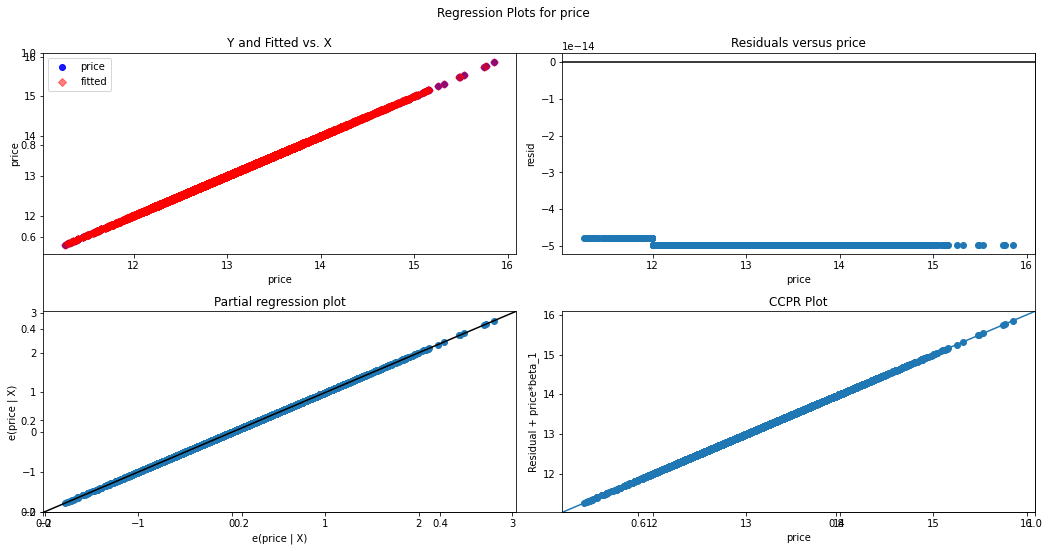

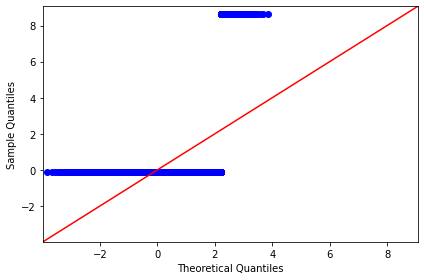

bedrooms normality tests
['bedrooms', 0.12492087229537296, 12.3540681687337, 0.20673459215601092, 0.0, 440.6747749599584]


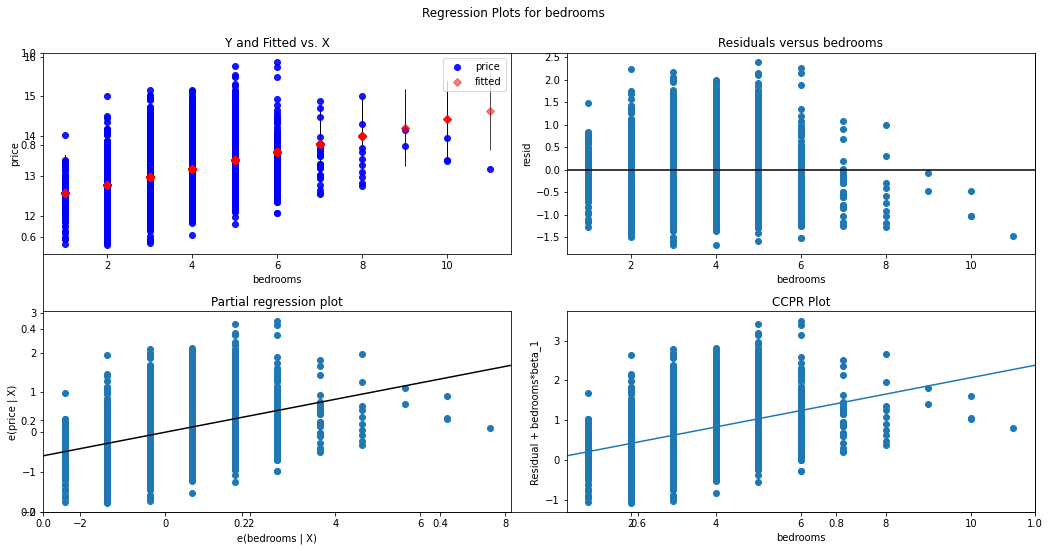

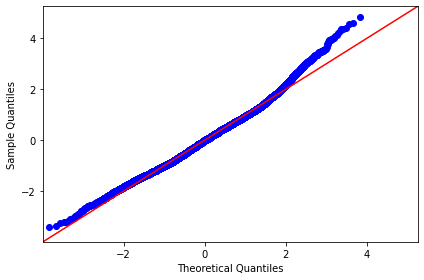

bathrooms normality tests
['bathrooms', 0.30161884772404046, 12.25163834127751, 0.3774213650295156, 0.0, 137.67405937824734]


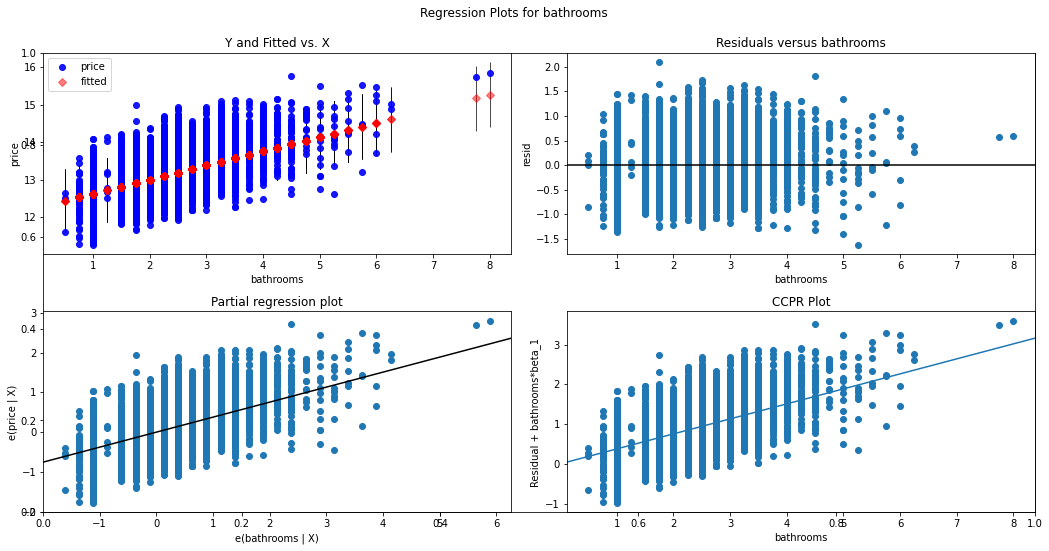

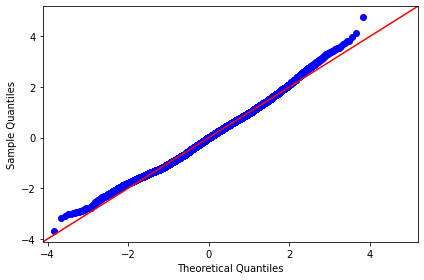

floors normality tests
['floors', 0.09420426626205025, 12.603405867195434, 0.29809246542327006, 0.0, 739.2862414141008]


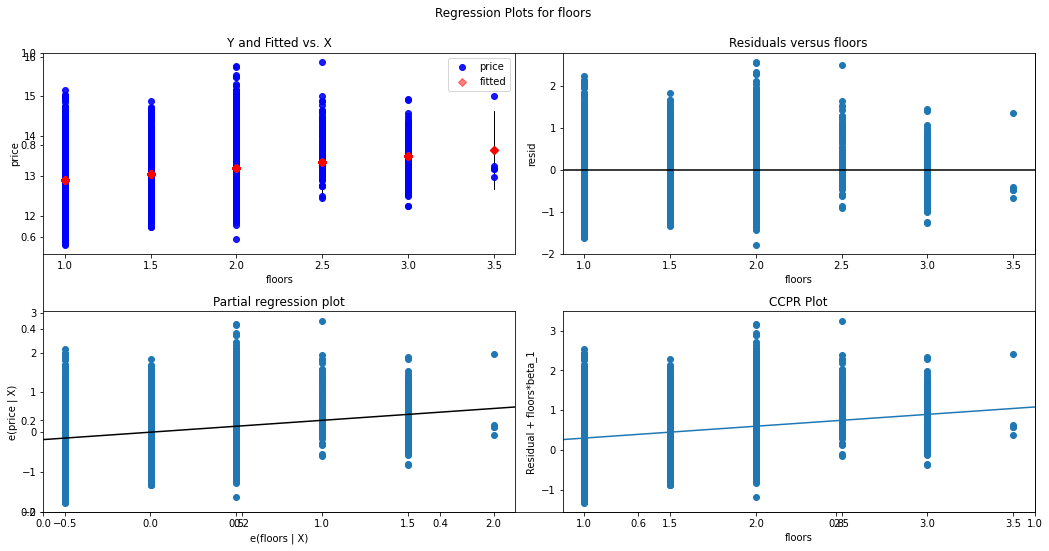

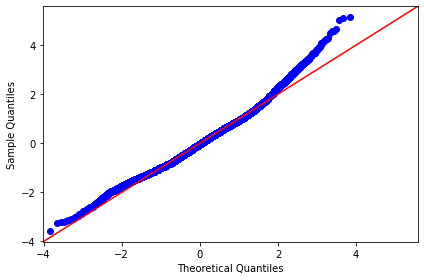

condition normality tests
['condition', 0.001962146851407942, 12.928061223885159, 0.03579728346403574, 1.949701926394639e-08, 795.5189825672805]


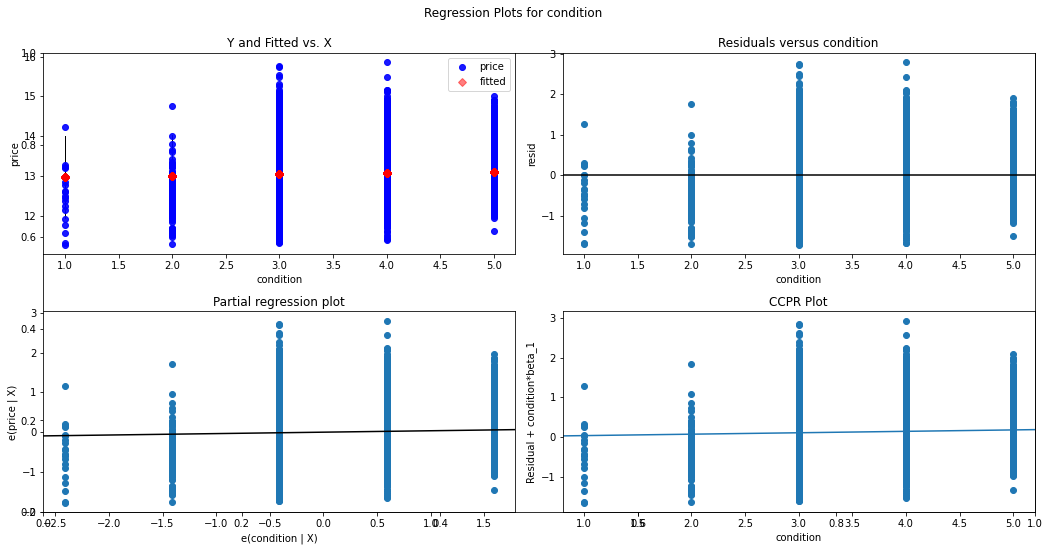

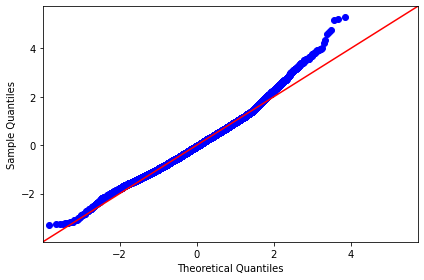

grade normality tests
['grade', 0.49017622838525743, 10.641903887297126, 0.3142030367006568, 0.0, 83.55235044023783]


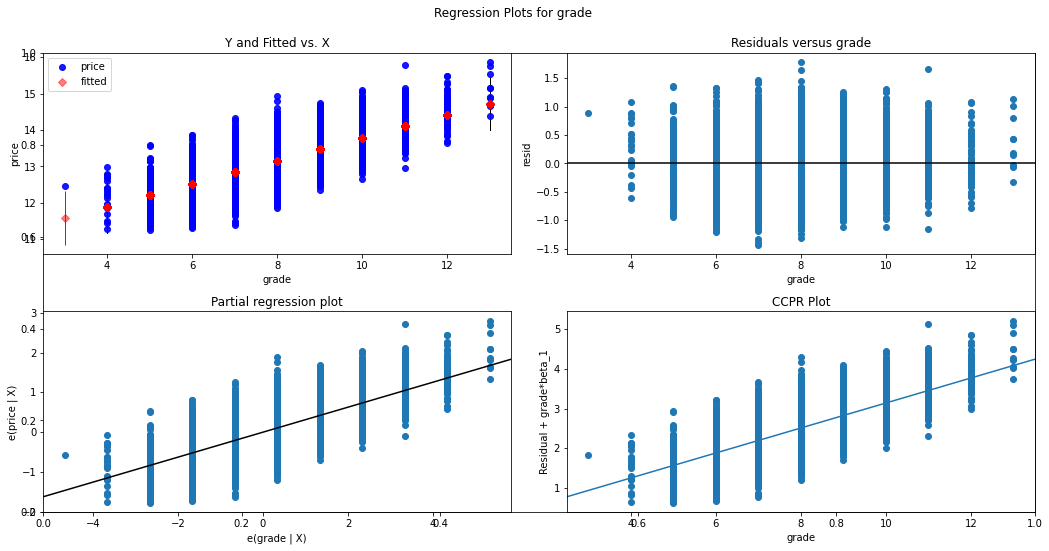

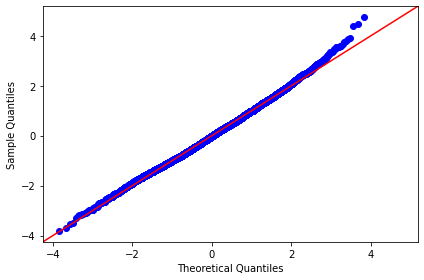

yr_renovated normality tests
['yr_renovated', 0.010493799145916305, 13.040585882942025, 0.19023066018649112, 9.874003892863023e-39, 762.658975067822]


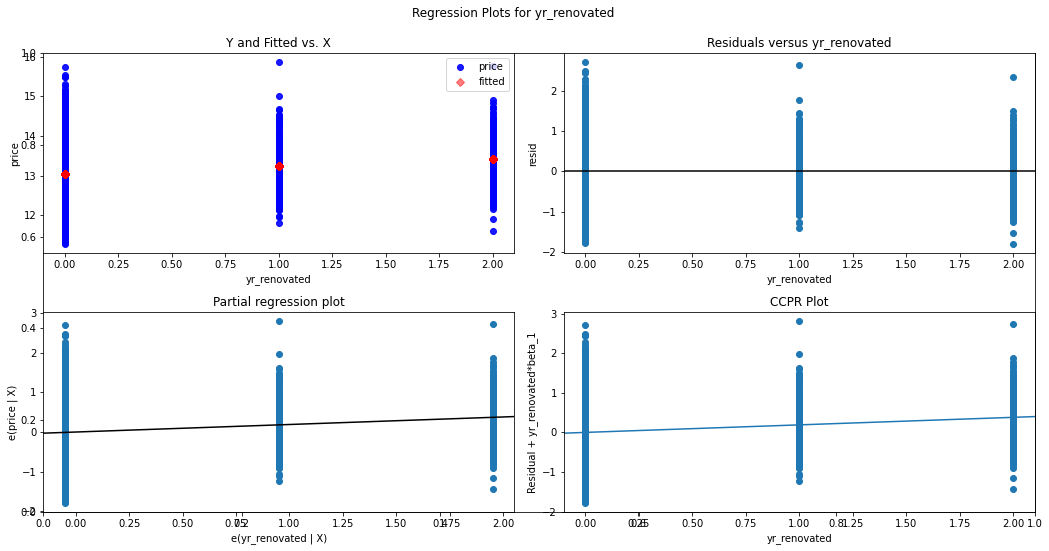

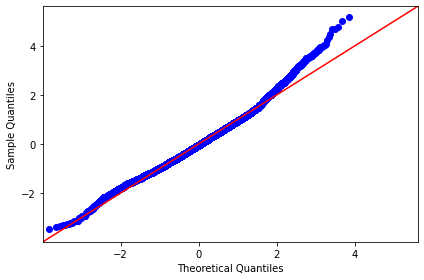

yr_built normality tests
['yr_built', 0.005676854534503062, 10.395516627297258, 0.0013468146385690405, 1.1544133095839694e-21, 821.1320420316008]


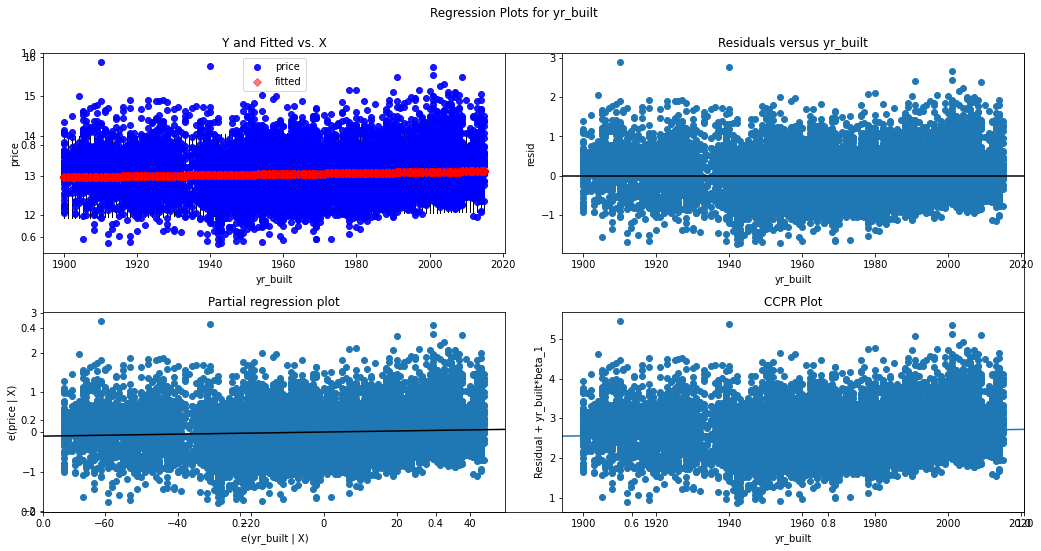

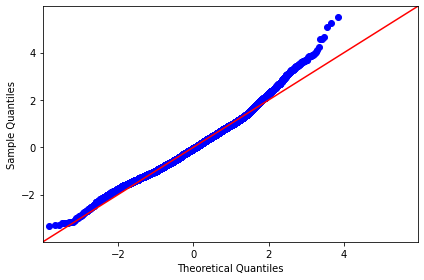

sqft_living normality tests
['sqft_living', 0.48223114816041057, 12.21895287274982, 0.00039949937246148694, 0.0, 29.343333064798]


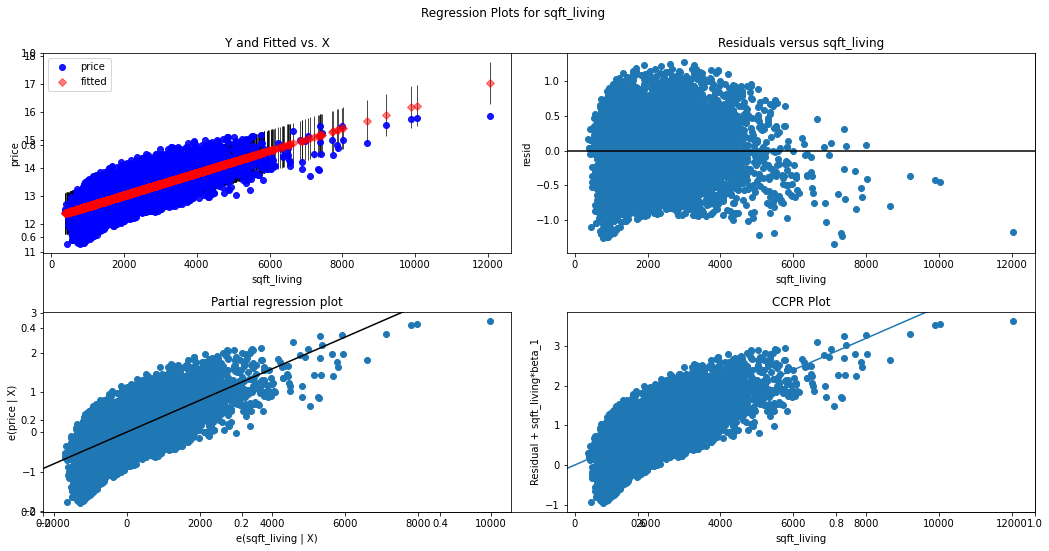

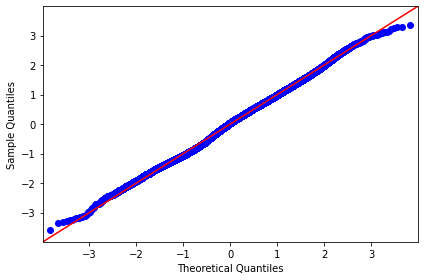

sqft_lot normality tests
['sqft_lot', 0.010296493105675042, 13.029853173775583, 1.363252532166339e-06, 4.942199141418883e-38, 812.5646973826382]


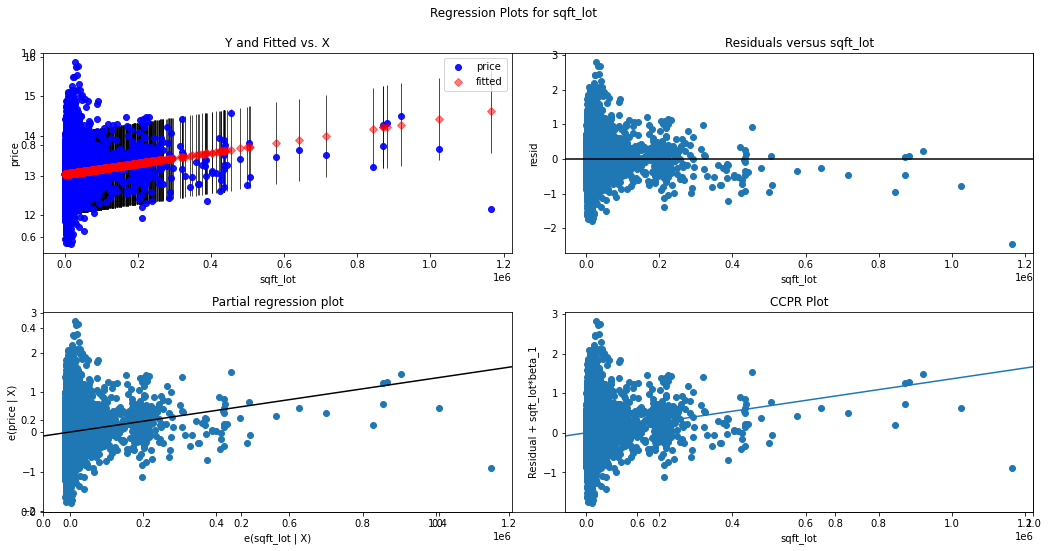

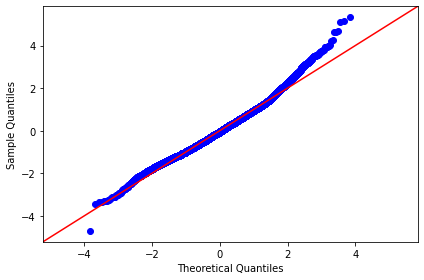

sqft_above normality tests
['sqft_above', 0.361100202630521, 12.365726146733781, 0.00038214292424318223, 0.0, 80.87528716369758]


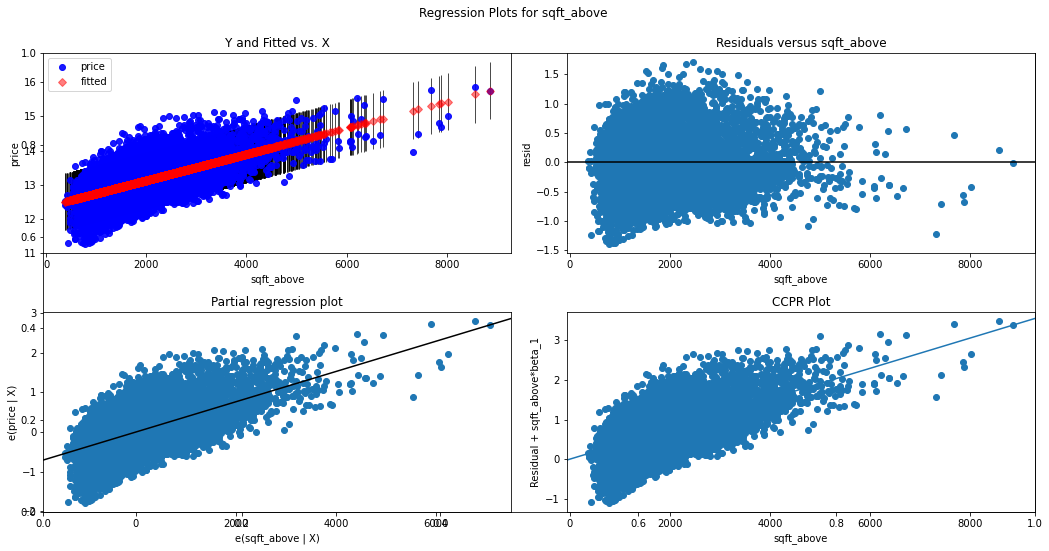

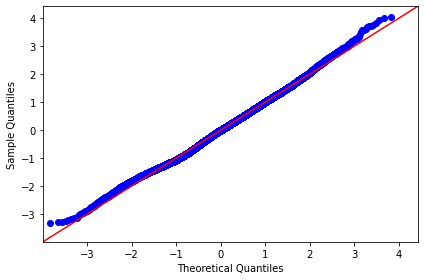

waterfront normality tests
['waterfront', 0.02742452991210831, 13.042958736729172, 1.0604699361983878, 3.955295789084503e-99, 527.2182249686341]


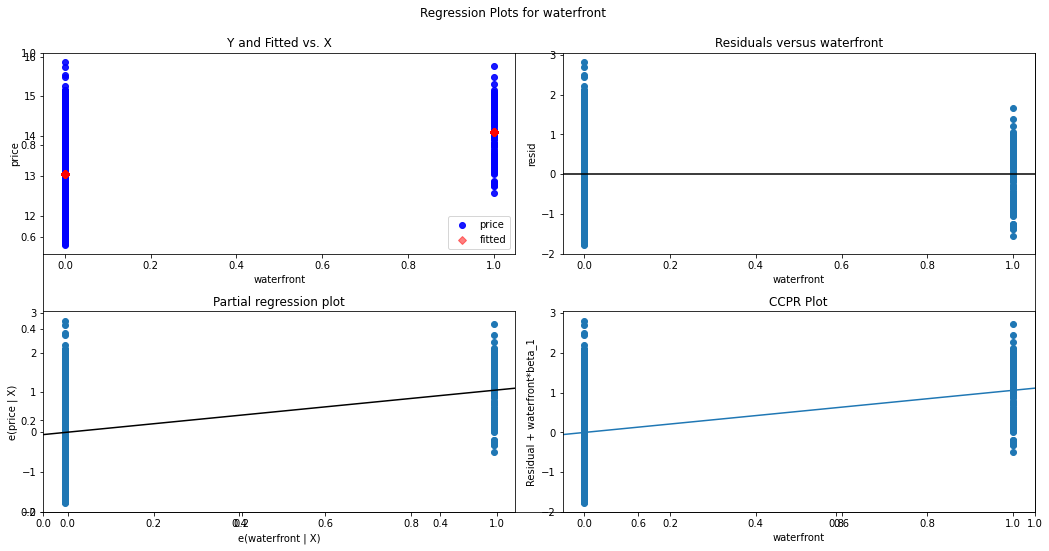

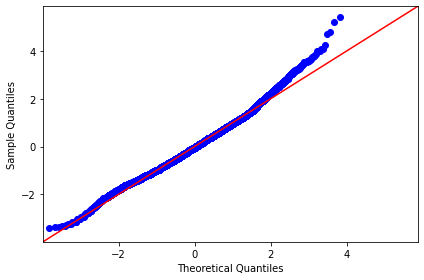

basement normality tests
['basement', 0.044615599326572664, 12.962714061129727, 0.22845827052667594, 1.969370833324862e-161, 744.5944709678954]


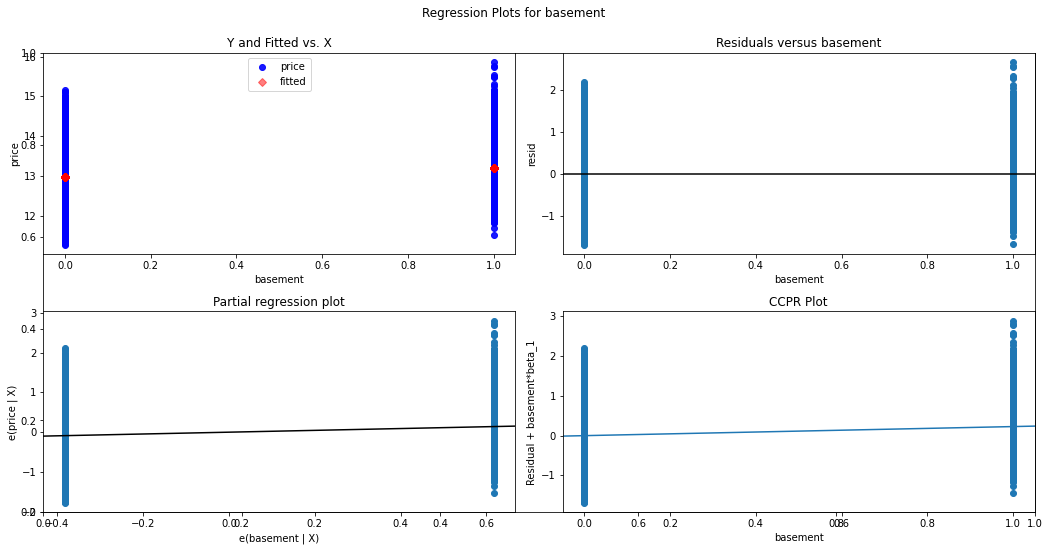

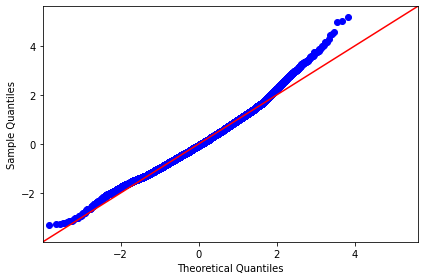

ArborHeights normality tests
['ArborHeights', 0.008796596253451083, 13.055649083842031, -0.44798894734587524, 1.0212627293402782e-32, 830.5154860455801]


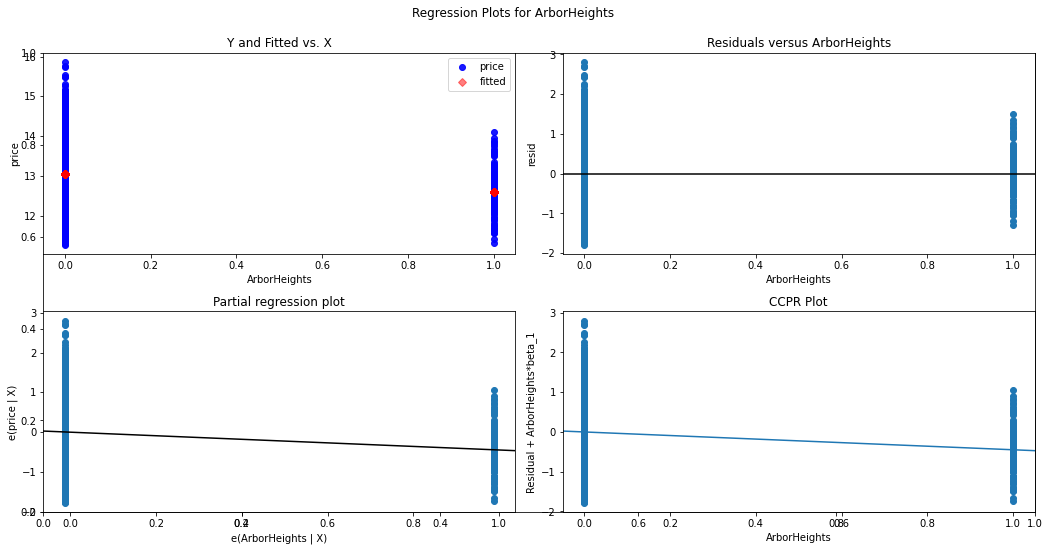

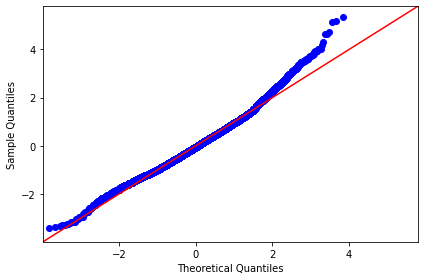

Auburn normality tests
['Auburn', 0.04304541708165677, 13.07301663021935, -0.5432377516045117, 1.0697521025470786e-155, 917.0930054050841]


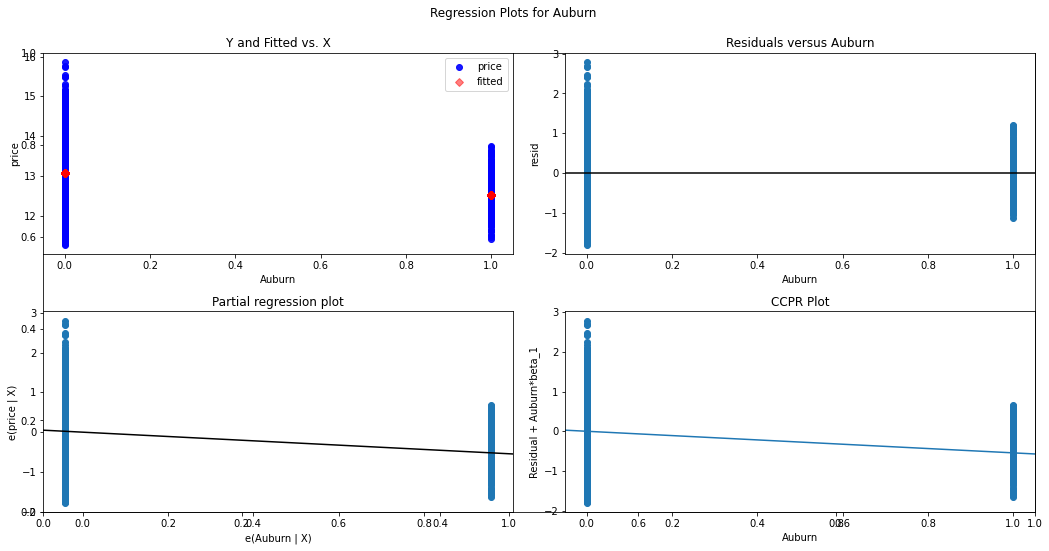

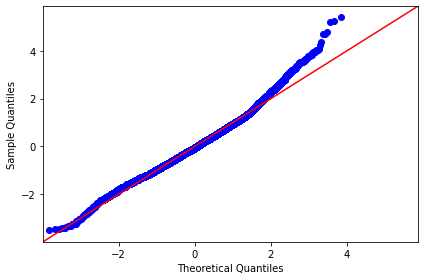

BeaconHill normality tests
['BeaconHill', 0.0035377147972337486, 13.053076265892786, -0.33760178351717907, 4.5431969104580414e-14, 794.2560847615977]


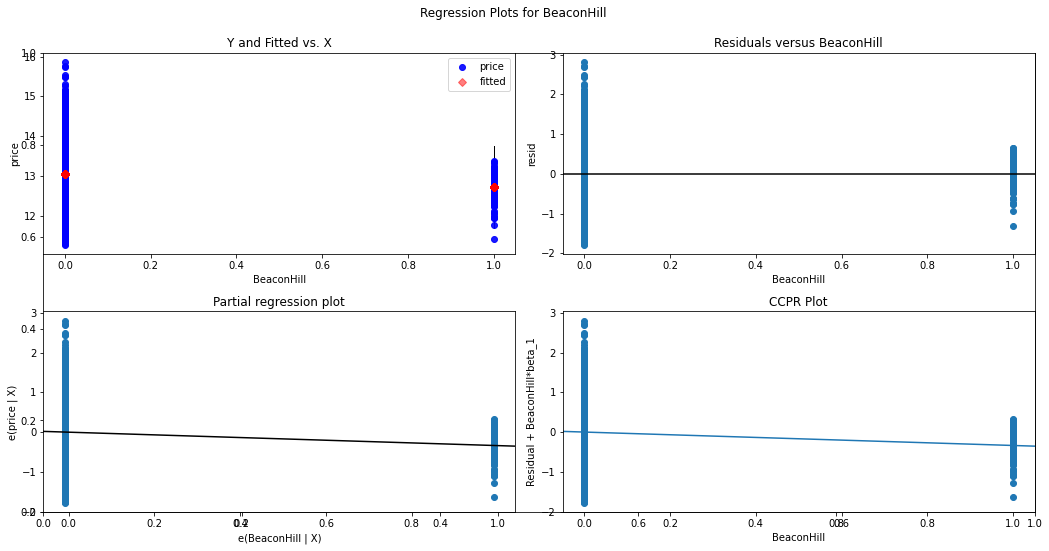

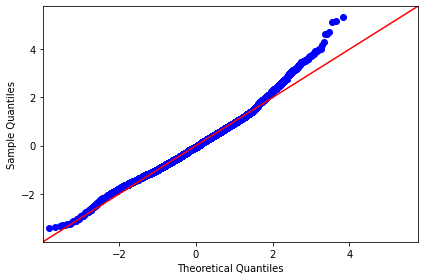

BlackDiamond normality tests
['BlackDiamond', 0.0006664694527537263, 13.051046281461954, -0.20752185502656165, 0.0010670781102026102, 803.1896277370929]


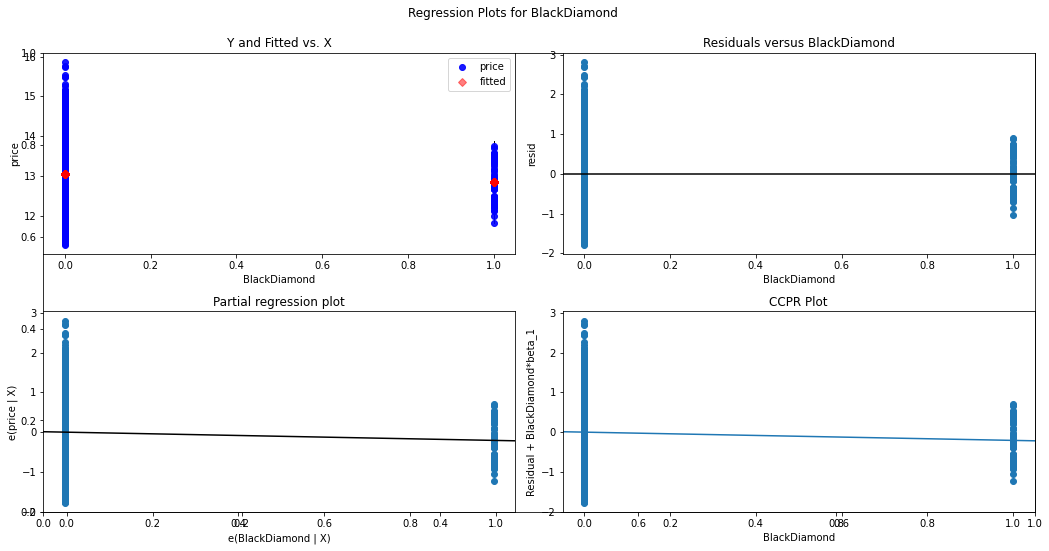

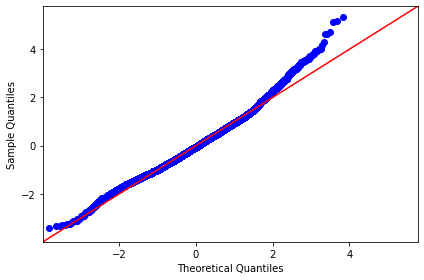

Bothell normality tests
['Bothell', 8.829366371254643e-06, 13.050002171413404, 0.016135077101130435, 0.7064934820591524, 806.1659663079901]


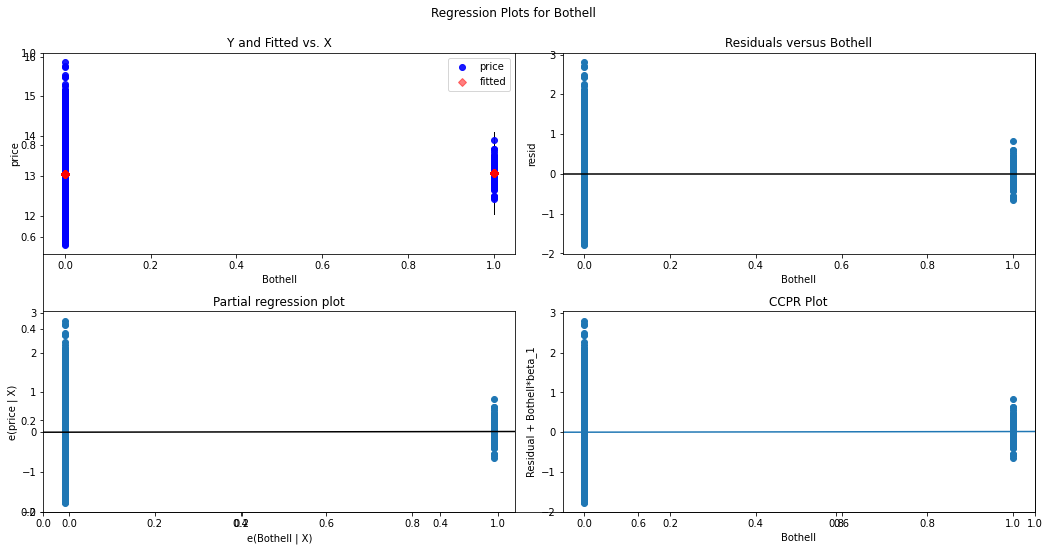

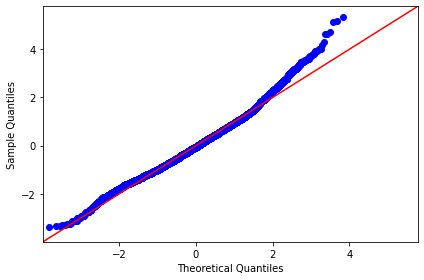

BridleTrails normality tests
['BridleTrails', 0.006797560589880236, 13.046363023736571, 0.4992472200375109, 1.2327606395130717e-25, 883.7471419783019]


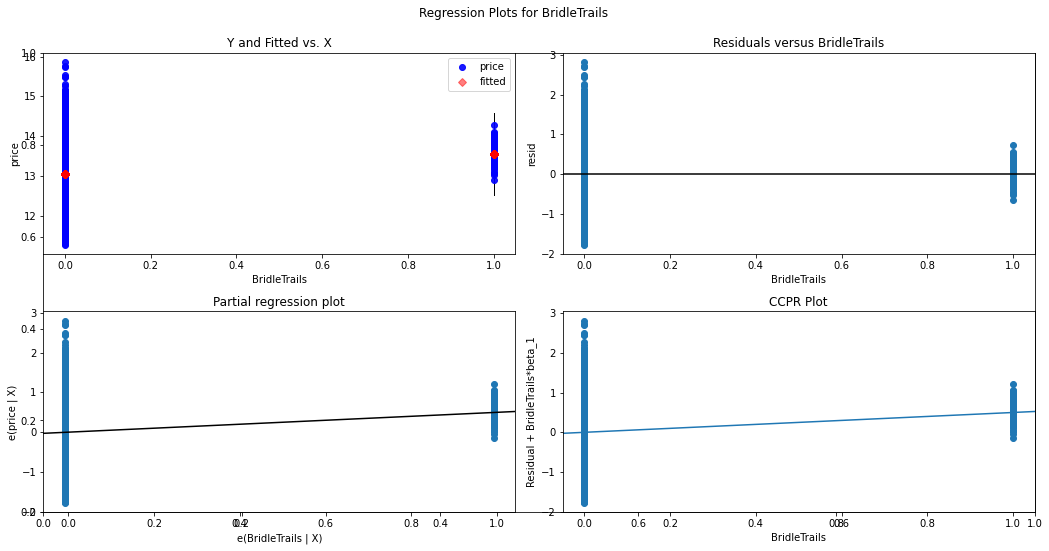

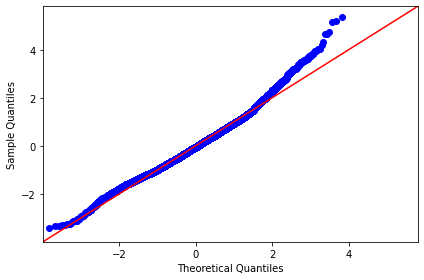

Broadview normality tests
['Broadview', 0.0002545137380931539, 13.051720632792215, -0.04649004328070694, 0.04318518767399827, 800.7927581344103]


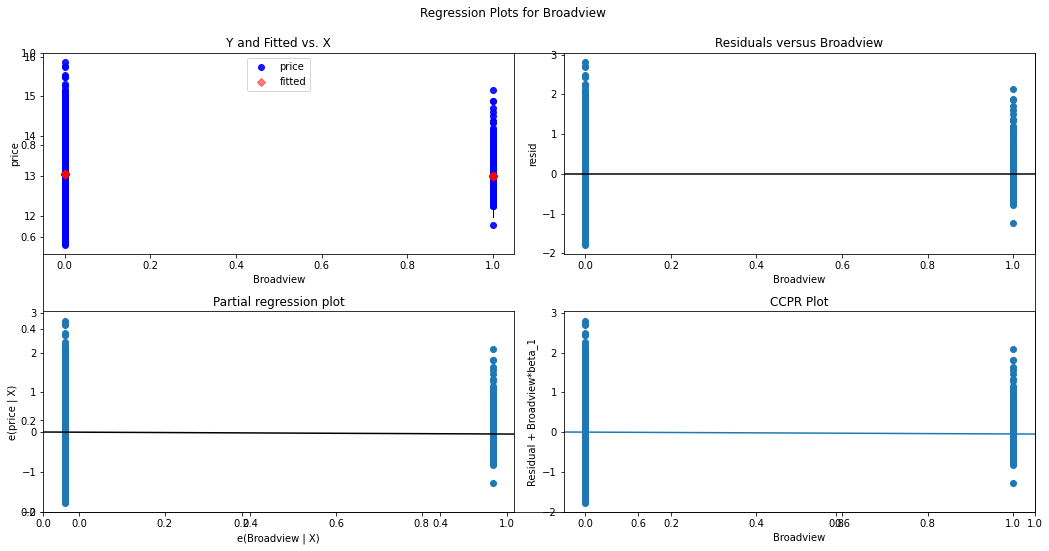

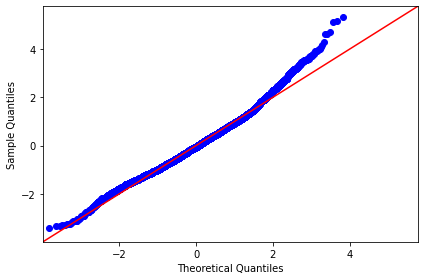

Burien normality tests
['Burien', 0.0031064856552450726, 13.05174214508056, -0.5424822404933916, 1.5616496721739e-12, 809.7174342956922]


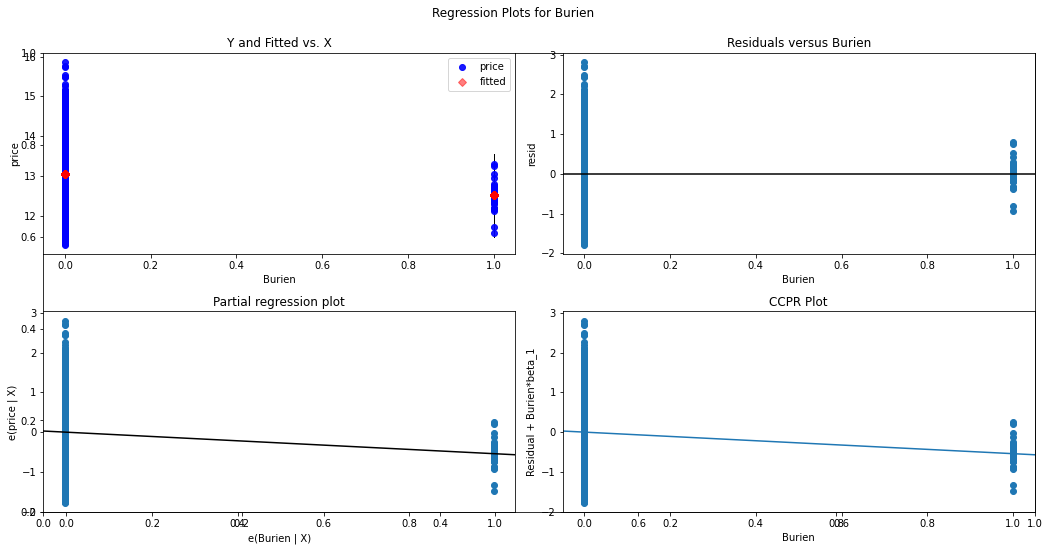

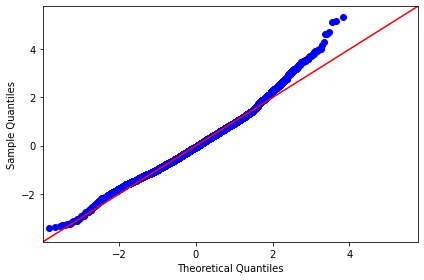

CapitolHill normality tests
['CapitolHill', 0.004980535695545574, 13.047563186703531, 0.5337172193369669, 3.4012619067032225e-19, 801.8558545006603]


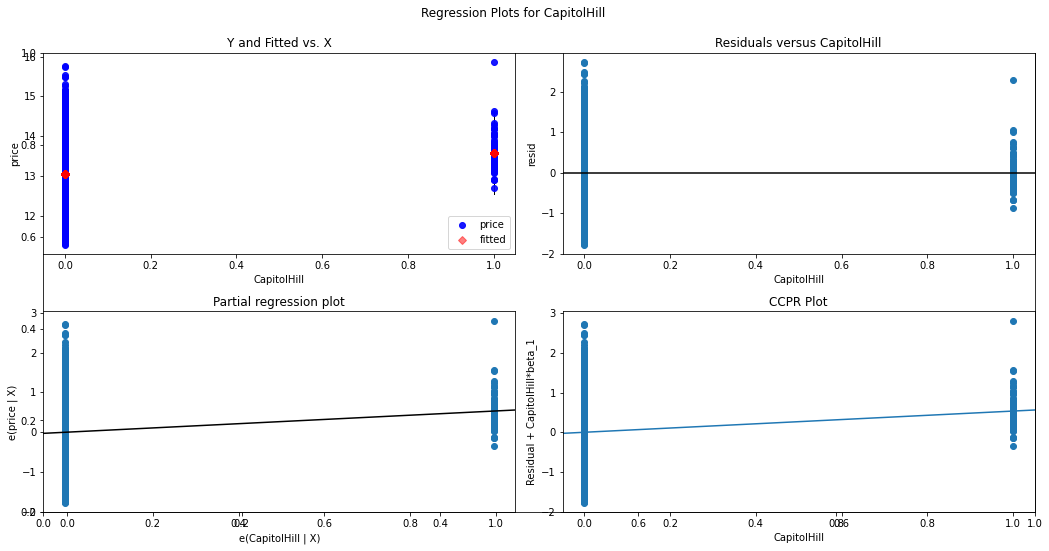

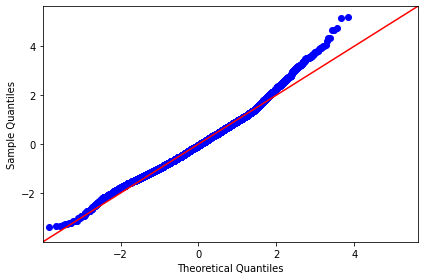

Carnation normality tests
['Carnation', 0.00029110969937895526, 13.050793418932763, -0.12663305174185768, 0.030586035820775934, 802.8717735812324]


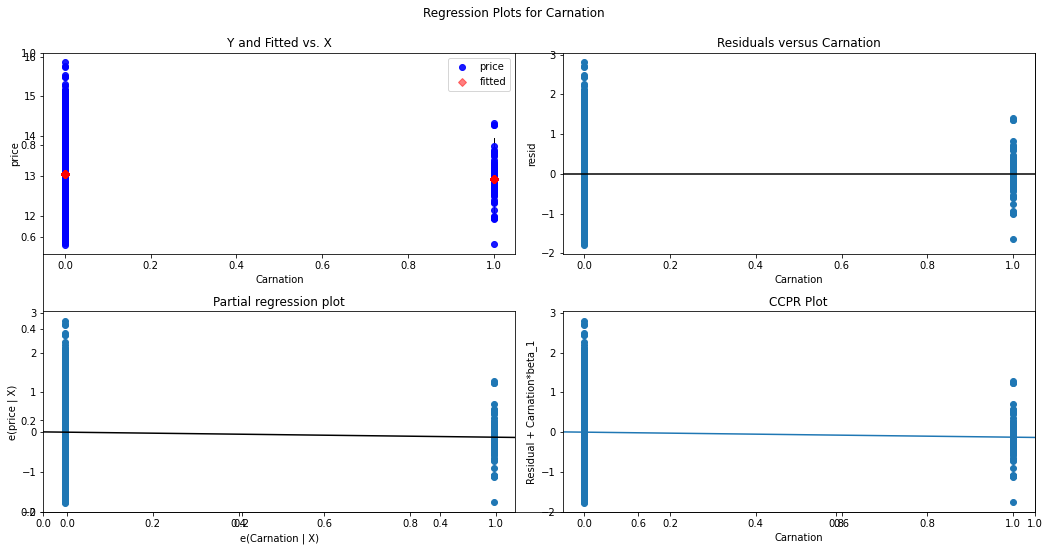

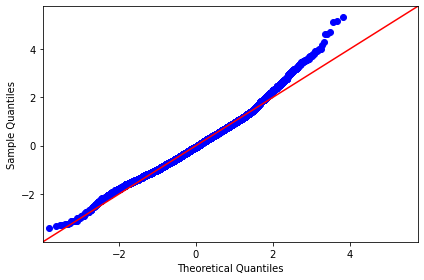

ClydeHill normality tests
['ClydeHill', 0.049393943126646245, 13.035979806699562, 0.9772265069247847, 6.099944622340888e-179, 672.4536924815917]


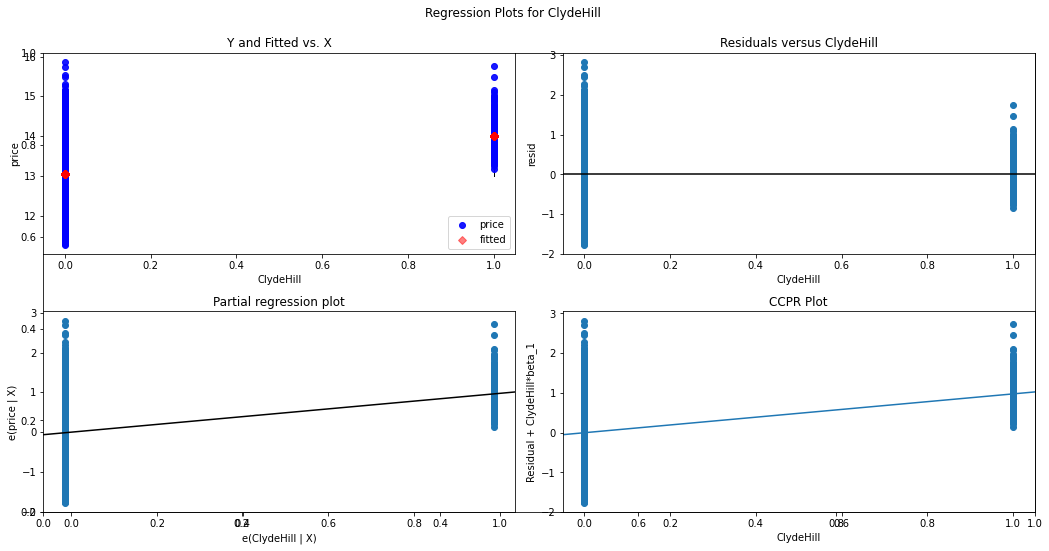

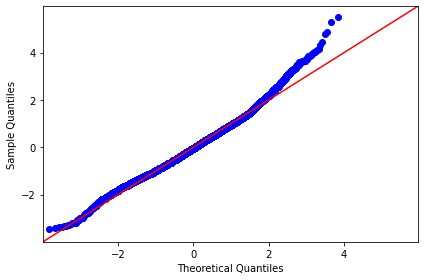

DesMoines normality tests
['DesMoines', 0.013842952774414385, 13.057308115171836, -0.5419945418628549, 1.289863589145549e-50, 853.1662630612999]


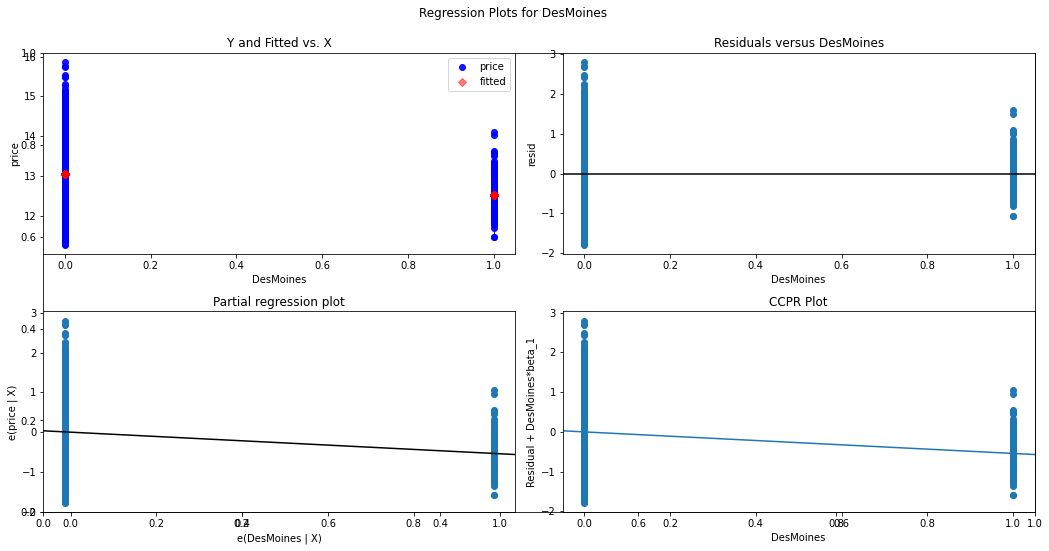

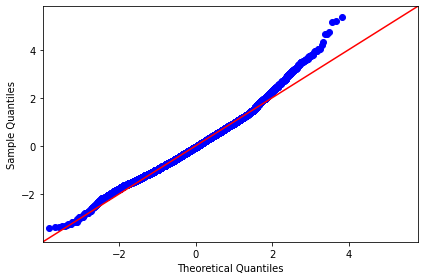

Duvall normality tests
['Duvall', 0.0005354421031031897, 13.05129962059781, -0.13041414564171916, 0.003358362671535544, 794.1017501058411]


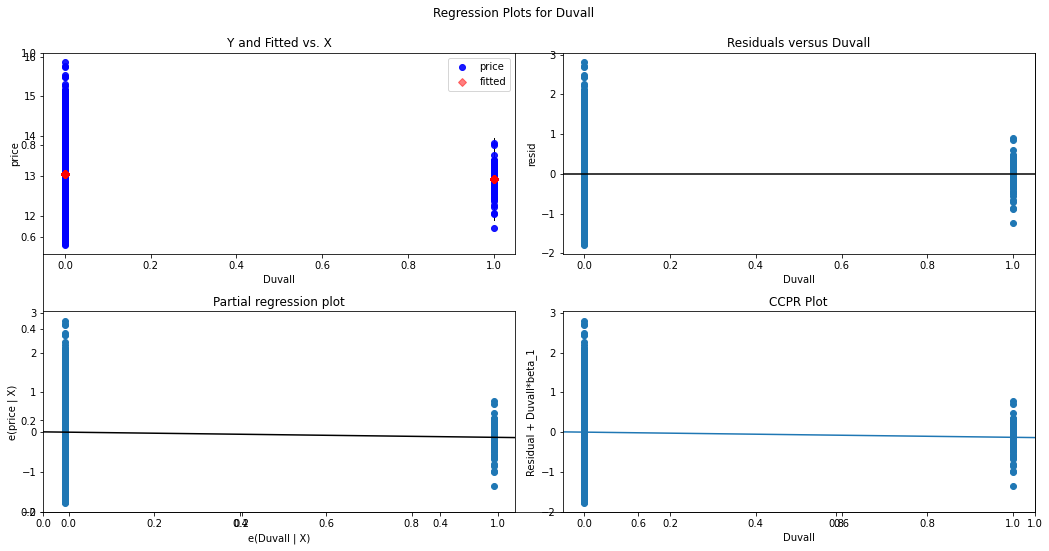

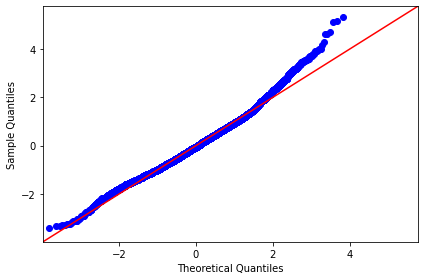

Enumclaw normality tests
['Enumclaw', 0.0071526923003120135, 13.054586311347657, -0.4505222028440073, 6.803807026319486e-27, 814.6508884114315]


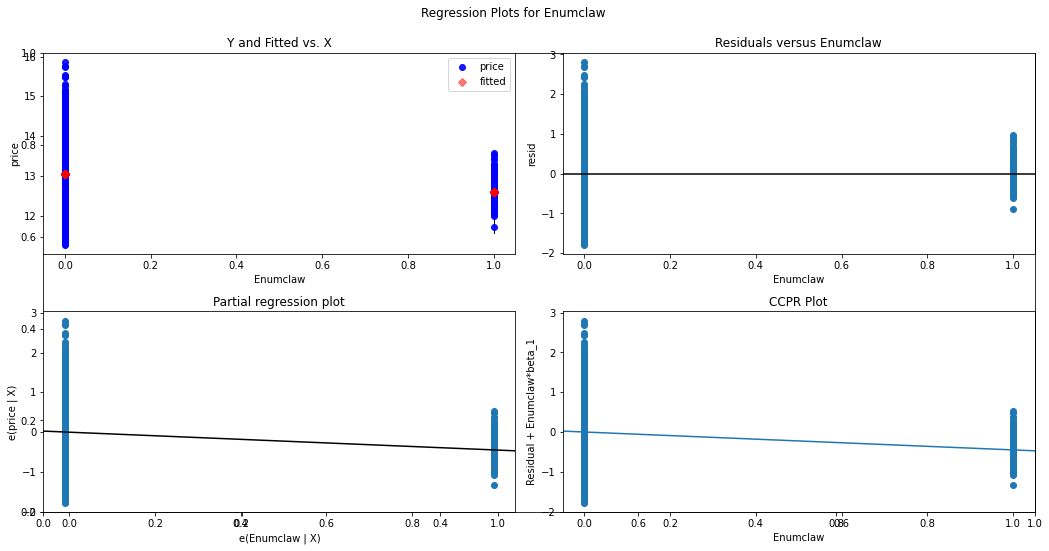

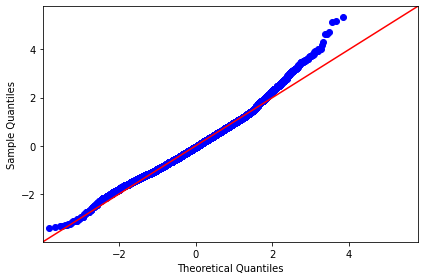

FallCity normality tests
['FallCity', 4.4689044050416626e-05, 13.049941469183121, 0.05809477352295023, 0.39688477504049025, 803.7411921354512]


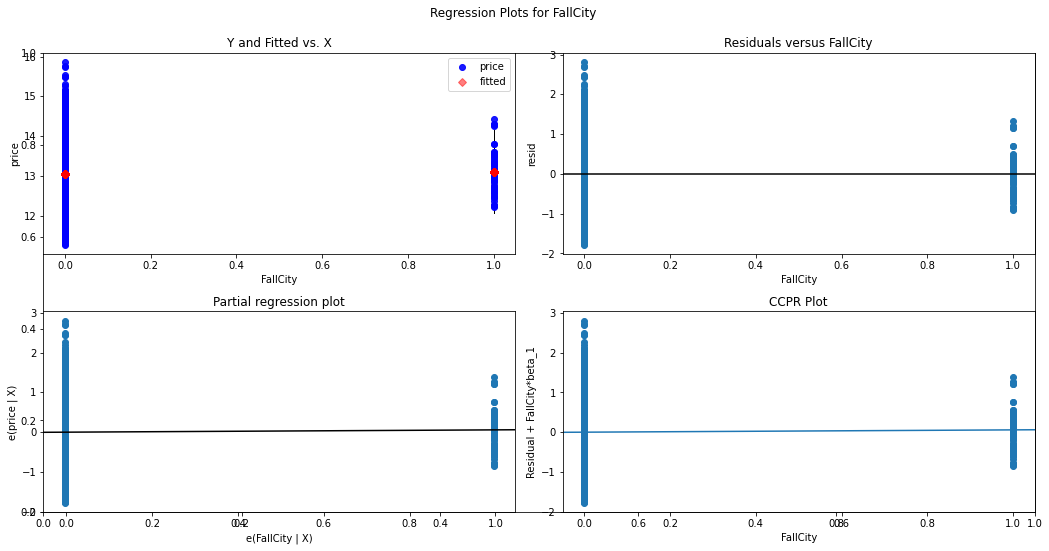

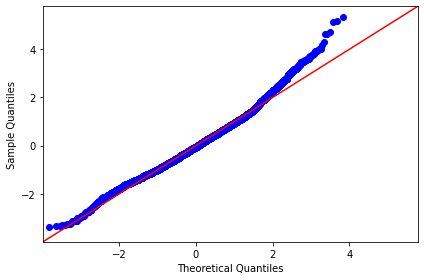

FederalWay normality tests
['FederalWay', 0.03590313065697848, 13.069382874441013, -0.5352854437055631, 1.0041976187588036e-129, 898.9924085129805]


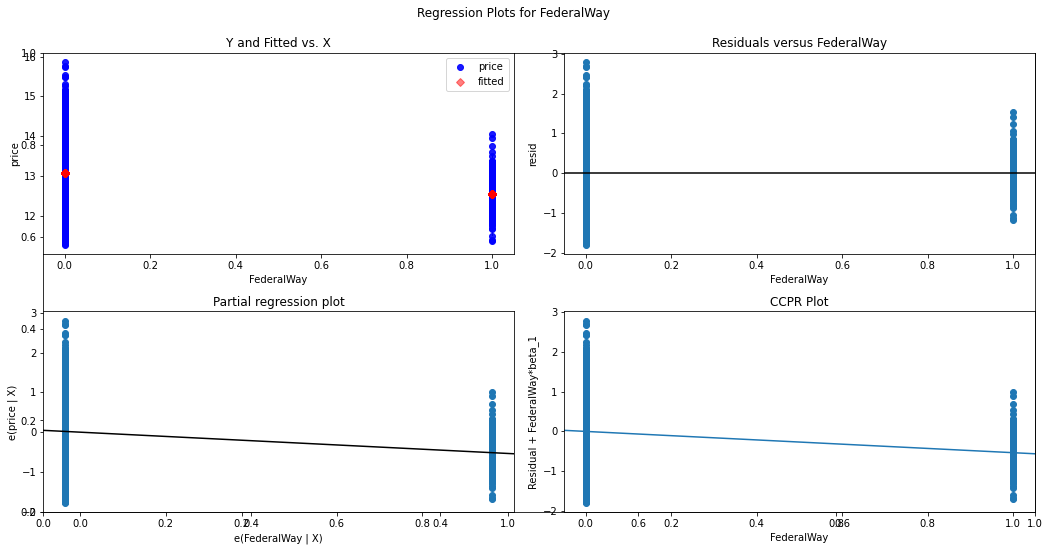

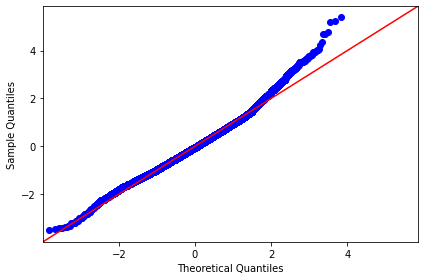

Greenwood normality tests
['Greenwood', 0.0027241553474501856, 13.045604143597252, 0.1699954709880793, 3.6166689783042654e-11, 873.6806913225236]


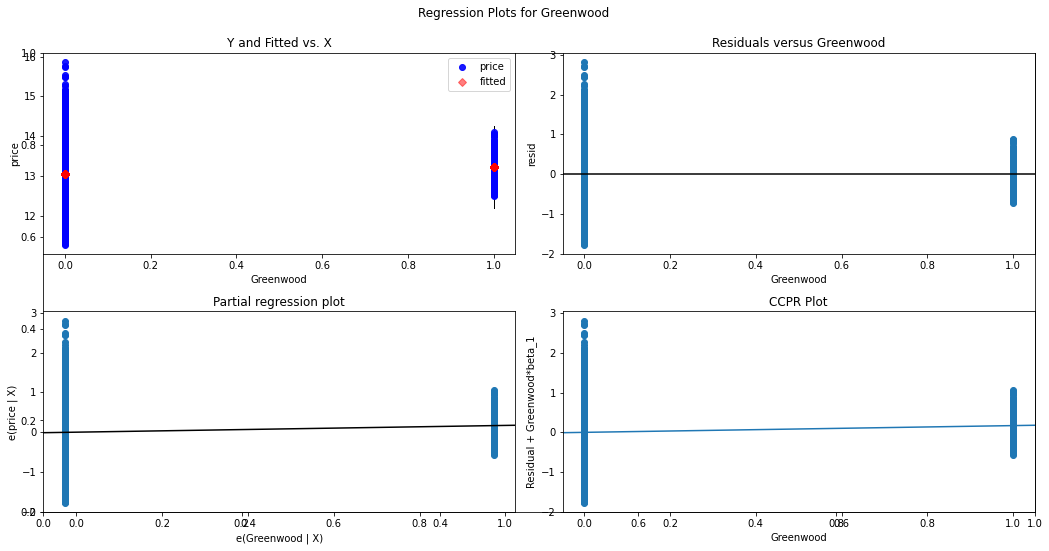

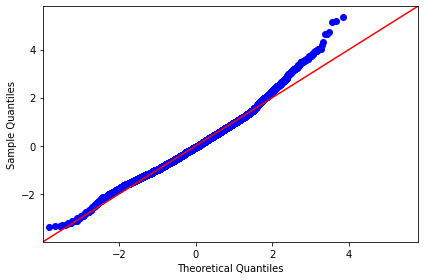

HighPoint normality tests
['HighPoint', 0.008874639186943756, 13.056305643481954, -0.4049186070622155, 5.4030199599605005e-33, 798.9483466603152]


KeyboardInterrupt: 

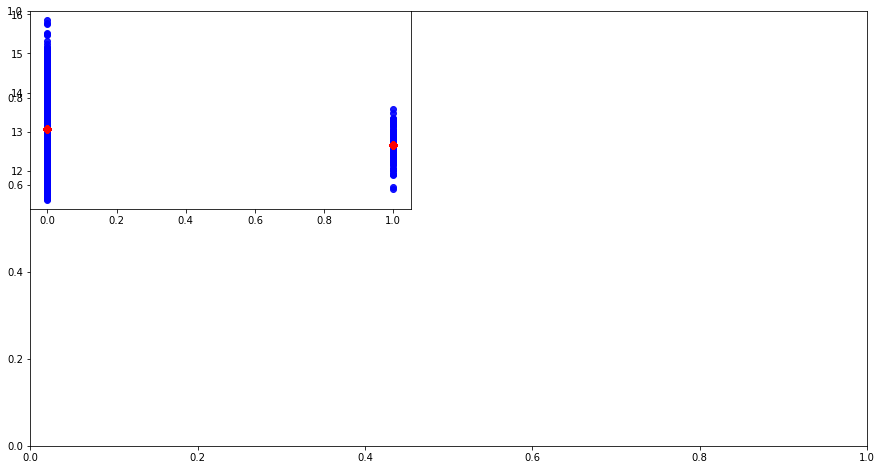

In [42]:
linearity_test(amb_cont_preprocessed)

## Make Model Using Ambiguous Features as Categorical

In [ ]:
preprocessed_cat = pd.concat([log_price, amb_cat, continuous, cat_df, place_df], axis=1)

In [ ]:
amb_cat_model = make_ols_model(preprocessed_cat, cv=True)[0]


**easier to use first model, throws up odd cross_val scores**

## Make Polynomial Model

In [ ]:
def squared(df, full=False):
    
    poly_prep = df.copy()

    for col in poly_prep.columns:
        new_col = f'{col}_sq'
        poly_prep[new_col] = poly_prep[col]**2
    poly_prep = poly_prep.drop('price_sq', axis=1)
    model = make_ols_model(poly_prep, cv=True)[0]
    return model, poly_prep



In [ ]:
squared_df = amb_cont_preprocessed.copy()
squared_model = squared(squared_df)[0]
squared_model

In [ ]:
# squared give slightly better r2, but added complication for
# stakeholder not worth it

## Find Most Correlated, Biggest Coefficients, Lowest p, Colinearity
then filter

### Most correlated

In [43]:
# find top 20 features most correlated with target
def most_correlated(preprocessed):
    x_train, x_test, y_train, y_test, x, y = splitter(preprocessed)
    co_data = pd.concat([y_train, x_train], axis=1)
    corr = co_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    coo_df = corr.copy()
    for index, row in coo_df.iterrows(): 
        if row['level_0'] == row['level_1']:
            coo_df = coo_df.drop(index)
            continue
        if row['level_0'] == 'price' or row['level_1'] == 'price':
            continue
        else:
            coo_df = coo_df.drop(index)
        
    for index, row in coo_df.iterrows():         
        if row['level_0'] == 'price':
            coo_df = coo_df.drop(index)
    coo_df=coo_df.drop('level_1', axis=1)
    coo_df.rename(columns = {'level_0':'predictor', 0:'correlation'}, inplace = True)
    
    return coo_df.head(20)

In [44]:
final_df = amb_cont_preprocessed.copy()
top20_cc = most_correlated(final_df)
top20_cc 

predictor  correlation
335           grade     0.702552
536     sqft_living     0.692286
670      sqft_above     0.599230
134       bathrooms     0.543612
67         bedrooms     0.346128
201          floors     0.308339
2278           Kent     0.225000
1541      ClydeHill     0.221903
938          Auburn     0.209856
804        basement     0.204366
1876     FederalWay     0.188787
2747   MercerIsland     0.182195
737      waterfront     0.165886
2479  MadisonValley     0.163889
3484      Sammamish     0.147397
3819        Tukwila     0.145102
2345       Lakemont     0.144119
2680         Medina     0.134067
3350        Redmond     0.124818
3015  NorthRoseHill     0.122722

In [45]:
# condition, yr_built, yr_renovated and sqft_lot not in the list. Sqft_lot also related to 
# sqft_lving, but there will be useful info lost if we delete. Better to create
# a new column of sqft_yard, so we have all the sqft info we need with no 
# colinearity issues
final_df['sqft_yard'] = final_df['sqft_lot']-final_df['sqft_living']
low_cor_list = ['condition', 'yr_renovated', 'sqft_lot', 'yr_built']
final_df.drop(low_cor_list, axis=1, inplace=True)

In [46]:
#make new model
final_yard = make_ols_model(final_df, cv=True)[0]

Train score:      0.8547612565611598
Validation score: 0.8501694689826673
Train Root Mean Squarred Error: 0.2008884674412884
Test Root Mean Squarred Error: 0.20205411588187996
cros_val r2 = 0.8496131415951714


### biggest coefficient

In [47]:
# find features with biggest coefficients
def make_big_coef_dic(model, df, pr='no'):
    coeff_list = list(model.params[1:])
    feature_list = list(df.columns)
    feature_list.remove('price')
    coeff_dict = dict(zip(feature_list, coeff_list))
    coeff_sl = sorted(coeff_dict.items(), key=lambda x:x[1], reverse=True)
    coeff_sort = dict(coeff_sl)
    if pr == 'yes':
        print(coeff_sl[:10])
    return coeff_sort
    

In [48]:
big_coef_dic = make_big_coef_dic(final_yard, final_df, pr='yes')

[('waterfront', 0.6679171000069357), ('Medina', 0.5695172422460263), ('ClydeHill', 0.4549521900011499), ('MadisonValley', 0.3975319707283821), ('Westlake', 0.3414324686609158), ('QueenAnne', 0.33392183264669684), ('Ravenna', 0.3037960960582686), ('CapitolHill', 0.29458040160870314), ('MercerIsland', 0.254320918255981), ('Magnolia', 0.21373910306545685)]


In [136]:
# need to be cautious as these features are not scaled, so grade and sq ft
# living/yard will look artifically low.

### lowest p

In [49]:
p_v = pd.DataFrame(final_yard.pvalues).reset_index()
p_v['index'][p_v[0]>0.05]

1              bedrooms
31             Lakemont
38           MountBaker
57    WestLakeSammamish
58          WestSeattle
61            Wilburton
Name: index, dtype: object

In [50]:
# drop features with p > 0.05
high_p_list = ['bedrooms', 'Lakemont', 'MountBaker', 'WestLakeSammamish', 'Wilburton']
final_df.drop(high_p_list, axis=1, inplace=True)


### colinearity

In [51]:
# find colinear features
def colin_non_price(prep):
    cor_df= prep.copy()
    cor_df =cor_df.drop('price', axis=1)
    cor_df = cor_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    cor_df['pairs'] = list(zip(cor_df.level_0, cor_df.level_1))
    for index, row in cor_df.iterrows(): 
        if row['level_0'] == row['level_1']:
            cor_df = cor_df.drop(index)
    cor_df.set_index(['pairs'], inplace = True)
    return cor_df

In [52]:
colin_non_price(final_df).head(15)

level_0      level_1        0
pairs                                                       
(sqft_above, sqft_living)   sqft_above  sqft_living 0.876532
(sqft_living, sqft_above)  sqft_living   sqft_above 0.876532
(grade, sqft_living)             grade  sqft_living 0.762467
(sqft_living, grade)       sqft_living        grade 0.762467
(grade, sqft_above)              grade   sqft_above 0.756220
(sqft_above, grade)         sqft_above        grade 0.756220
(bathrooms, sqft_living)     bathrooms  sqft_living 0.755511
(sqft_living, bathrooms)   sqft_living    bathrooms 0.755511
(bathrooms, sqft_above)      bathrooms   sqft_above 0.686324
(sqft_above, bathrooms)     sqft_above    bathrooms 0.686324
(bathrooms, grade)           bathrooms        grade 0.665550
(grade, bathrooms)               grade    bathrooms 0.665550
(floors, sqft_above)            floors   sqft_above 0.522722
(sqft_above, floors)        sqft_above       floors 0.522722
(bathrooms, floors)          bathrooms       floors 0.501768

In [53]:
# keep sqft_living so get rid of the other colinear
# keep grade as different info in there
# so better to try that as interaction term

colin_list = ['sqft_above', 'floors', 'bathrooms']
final_df.drop(colin_list, axis=1, inplace=True)


## Make Final Model and Refine

In [54]:
final_model_mse = make_ols_model(final_df, cv=True)
final_model = final_model_mse[0]

Train score:      0.8521032216535953
Validation score: 0.8479275068411962
Train Root Mean Squarred Error: 0.20163990649454566
Test Root Mean Squarred Error: 0.20688787587228724
cros_val r2 = 0.8475330454786733


In [82]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1680.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:26:37   Log-Likelihood:                 2919.9
No. Observations:               16063   AIC:                            -5728.
Df Residuals:                   16007   BIC:                            -5297.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.8669      0.015    788.286      0.000      11.837      11.896
grade              0.1125      0.002     49.696      0.000       0.108       0.117
sqft_living        0.0002   2.92e-06     81.652      0.000       0.000       0.000
waterfront         0.6741      0.021     32.802      0.000       0.634       0.714
basement          -0.0037      0.004     -1.009      0.313      -0.011       0.003
ArborHeights      -0.3781      0.015    -25.028      0.000      -0.408      -0.349
Auburn            -0.6477      0.010    -68.171      0.000      -0.666      -0.629
BeaconHill        -0.3321      0.018    -18.520      0.000      -0.367      -0.297
BlackDiamond      -0.4145      0.024    -17.527      0.000      -0.461      -0.368
Bothell           -0.2061      0.017    -12.048      0.000      -0.240      -0.173
BridleTrails       0.0962      0.019      5.113      0.000       0.059       0.133
Broadview         -0.1622      0.010    -16.237      0.000      -0.182      -0.143
Burien            -0.5333      0.031    -17.213      0.000      -0.594      -0.473
CapitolHill        0.2426      0.024     10.249      0.000       0.196       0.289
Carnation         -0.3880      0.023    -16.840      0.000      -0.433      -0.343
ClydeHill          0.4725      0.015     32.298      0.000       0.444       0.501
DesMoines         -0.5885      0.015    -38.192      0.000      -0.619      -0.558
Duvall            -0.3366      0.018    -19.023      0.000      -0.371      -0.302
Enumclaw          -0.5539      0.016    -33.703      0.000      -0.586      -0.522
FallCity          -0.2260      0.027     -8.304      0.000      -0.279      -0.173
FederalWay        -0.6675      0.010    -67.493      0.000      -0.687      -0.648
Greenwood          0.1270      0.011     11.164      0.000       0.105       0.149
HighPoint         -0.3693      0.014    -26.430      0.000      -0.397      -0.342
Issaquah          -0.1232      0.010    -12.249      0.000      -0.143      -0.103
Juanita           -0.1252      0.012    -10.817      0.000      -0.148      -0.103
Kenmore           -0.2458      0.015    -16.545      0.000      -0.275      -0.217
Kent              -0.6019      0.009    -68.763      0.000      -0.619      -0.585
Leschi             0.1171      0.015      7.988      0.000       0.088       0.146
MadisonValley      0.3772      0.015     24.662      0.000       0.347       0.407
Magnolia           0.1962      0.014     13.965      0.000       0.169       0.224
MapleValley       -0.4834      0.011    -43.083      0.000      -0.505      -0.461
Medina             0.5865      0.037     15.890      0.000       0.514       0.659
MercerIsland       0.2570      0.015     16.745      0.000       0.227       0.287
NormandyPark      -0.3236      0.016    -20.086      0.000      -0.355      -0.292
NorthBend   

In [55]:
# basement's coefficient is very low considering it is binary, so drop
final_df.drop('basement', axis=1, inplace=True)

In [56]:
final_model_mse = make_ols_model(final_df, cv=True)
final_model = final_model_mse[0]

Train score:      0.8520890316370971
Validation score: 0.8479818247729927
Train Root Mean Squarred Error: 0.20394214357344545
Test Root Mean Squarred Error: 0.1999799915828217
cros_val r2 = 0.8475763368012158


price normality tests
['price', 1.0, 7.327471962526033e-15, 1.0000000000000053, 0.0, 570.7304367820067]


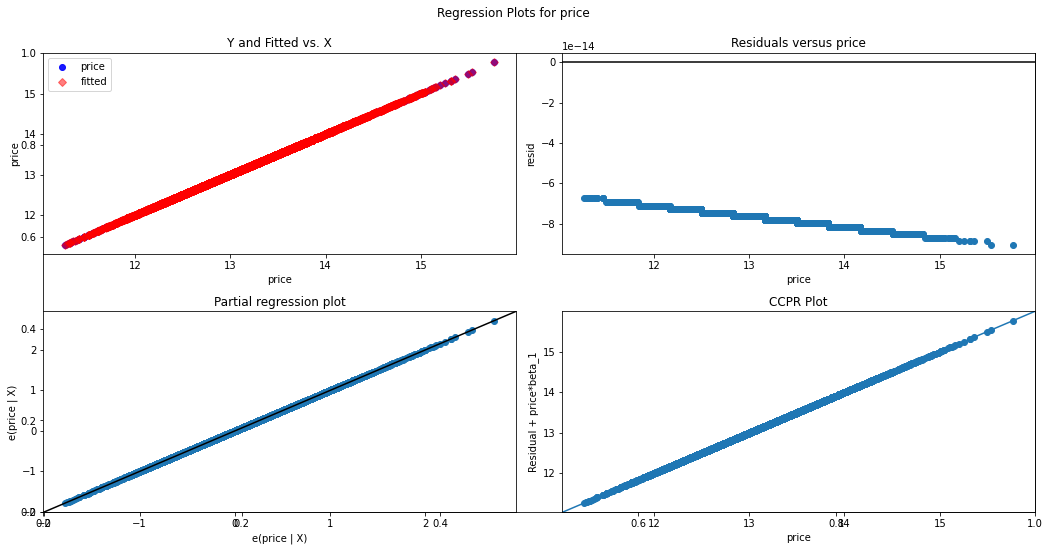

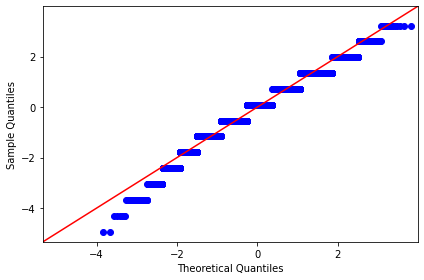

waterfront normality tests
['waterfront', 0.028611428698175234, 13.040650689633484, 1.0648616973899196, 2.1343552730800996e-103, 457.7624447467925]


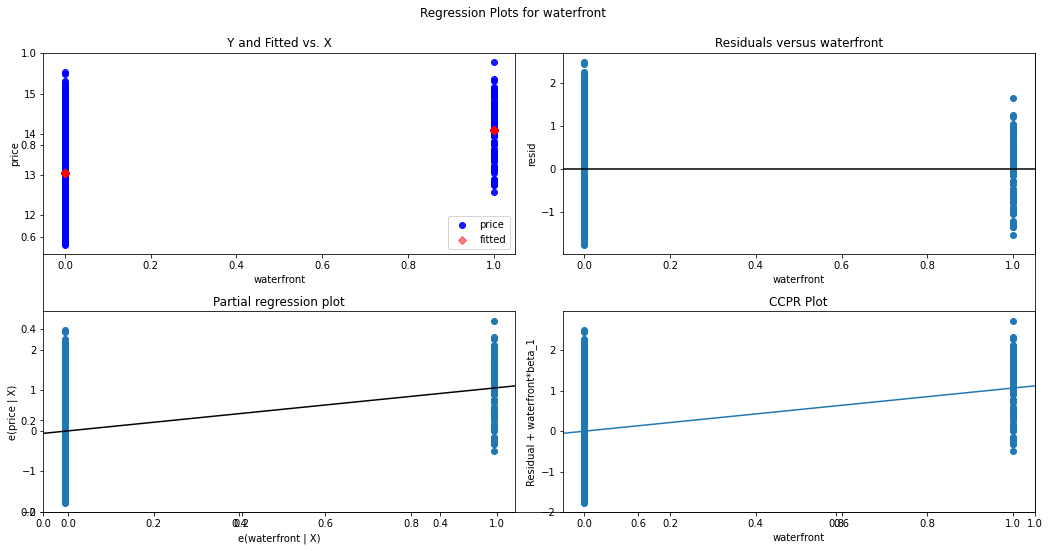

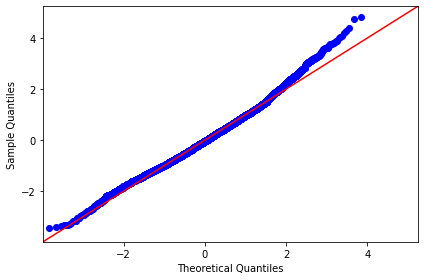

grade normality tests
['grade', 0.4873705992126576, 10.646536603147197, 0.31353614078381775, 0.0, 98.71323607811294]


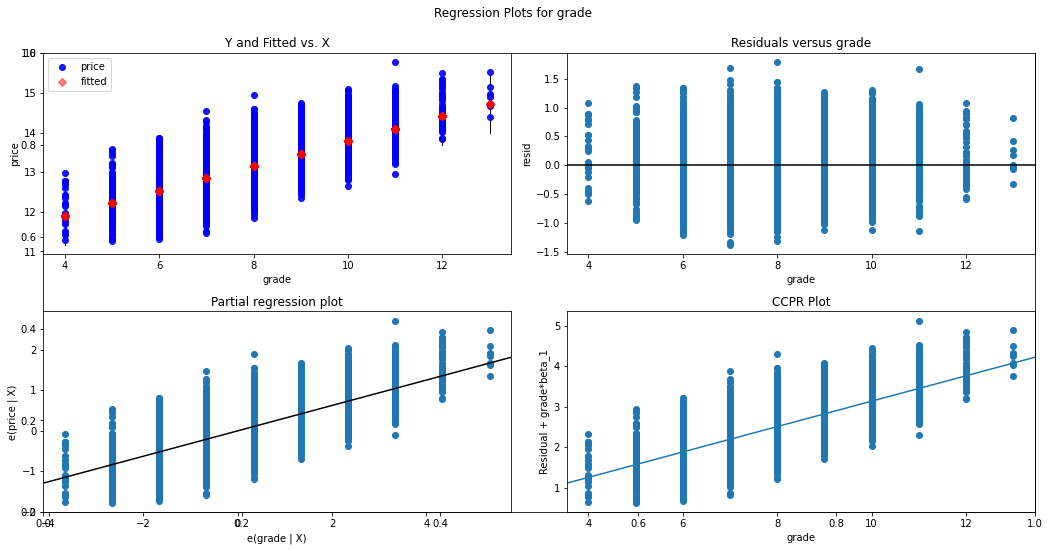

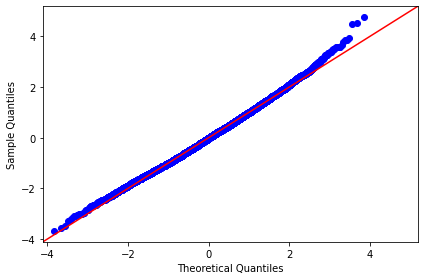

sqft_living normality tests
['sqft_living', 0.4755545467236626, 12.222858907607643, 0.00039678057799951024, 0.0, 1.034548799484087]


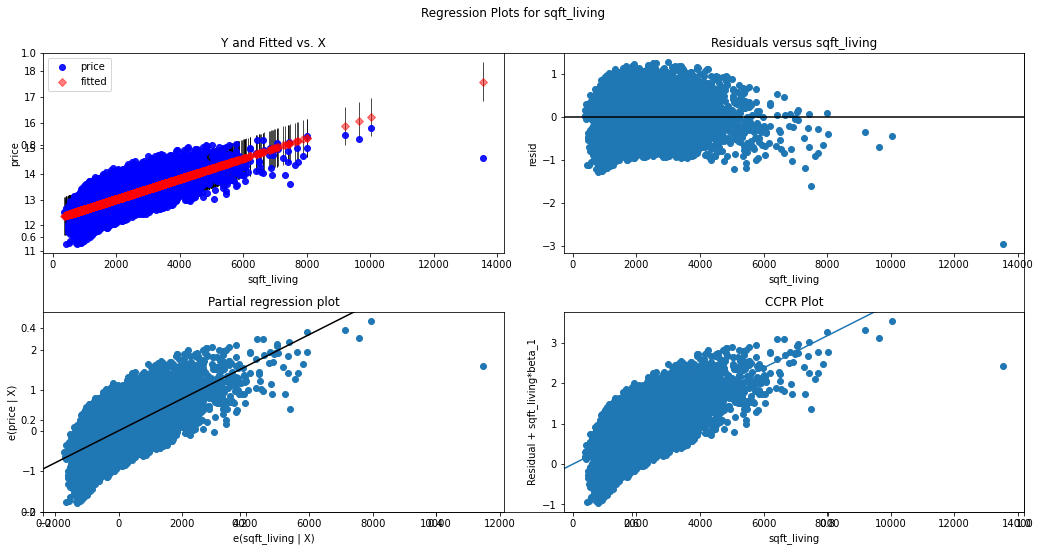

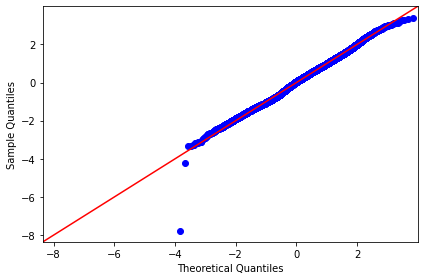

sqft_yard normality tests
['sqft_yard', 0.006168381163175085, 13.034941960824746, 1.0111931918804299e-06, 2.0903938578240416e-23, 750.1006167913444]


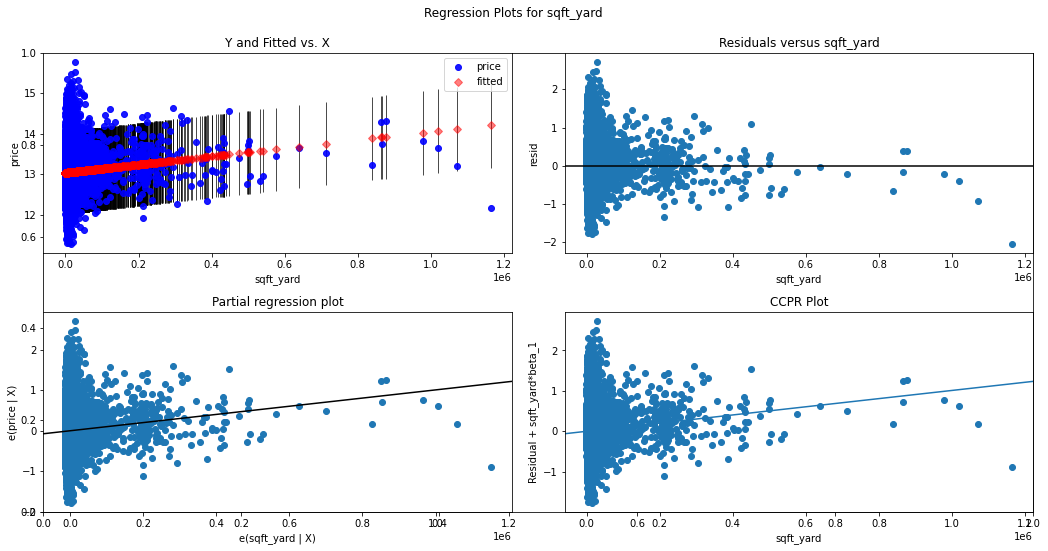

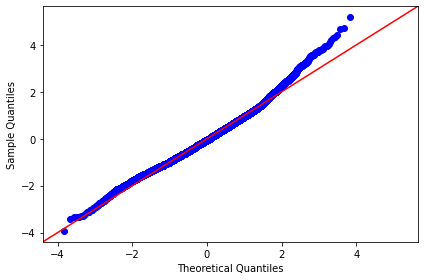

17601   12.498742
4336    12.886641
10492   13.091801
17852   12.392552
9345    12.936034
           ...   
11274   12.567237
15432   12.013701
1682    12.867471
20418   13.304685
9269    13.151922
Name: price, Length: 16063, dtype: float64

In [110]:
# do linearity test, we know location is ok, just check non-loc
non_loc_price_list = ['waterfront', 'grade', 'sqft_living', 'sqft_yard', 'price']
lin_df = final_df.copy()
lin_df = lin_df[non_loc_price_list]
linearity_test(lin_df)

In [85]:
# the sqft_living top 2 values are causing big skew, need to get rid
final_df['sqft_living'].sort_values(ascending=False).head()

2667     13540
14888    12050
21268    10040
19990     9890
4814      9640
Name: sqft_living, dtype: int64

In [57]:
final_df = final_df.drop([2667, 14888])
final_df.reset_index(drop = True)
final_df.head()

price  grade  sqft_living  waterfront  ArborHeights  Auburn  BeaconHill  \
0 12.542545      7         2400    0.000000             0       1           0   
1 13.380874      8         2060    0.000000             0       0           0   
2 12.899220      7         1460    0.000000             0       0           0   
3 12.367341      6         1430    0.000000             0       0           0   
4 12.905450      7         1650    0.000000             0       0           0   

   BlackDiamond  Bothell  BridleTrails  ...  Snoqualmie  Tukwila  Vashon  \
0             0        0             0  ...           0        0       0   
1             0        0             0  ...           0        0       0   
2             0        0             0  ...           0        0       0   
3             0        0             0  ...           0        1       0   
4             0        0             0  ...           0        0       0   

   VictoryHeights  ViewRidge  WestSeattle  WestWellington  Westlake  \
0               0          0            0               0         0   
1               0          0            0               0         0   
2               0          0            0               0         0   
3               0          0            0               0         0   
4               0          0            0               0         0   

   Woodinville  sqft_yard  
0            0       6973  
1            0      23976  
2            0      41540  
3            0       6169  
4            0       1854  

[5 rows x 55 columns]

In [58]:
final_model = make_ols_model(final_df, cv=True)[0]

Train score:      0.8525427457195992
Validation score: 0.8484575672308369
Train Root Mean Squarred Error: 0.20216492572724667
Test Root Mean Squarred Error: 0.2033867304115383
cros_val r2 = 0.8480269290942856


In [88]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1718.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:27:12   Log-Likelihood:                 2866.5
No. Observations:               16062   AIC:                            -5623.
Df Residuals:                   16007   BIC:                            -5200.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.8837      0.015    806.882      0.000      11.855      11.913
grade              0.1085      0.002     48.580      0.000       0.104       0.113
sqft_living        0.0002   2.79e-06     86.564      0.000       0.000       0.000
waterfront         0.6619      0.020     32.471      0.000       0.622       0.702
ArborHeights      -0.3694      0.015    -24.260      0.000      -0.399      -0.340
Auburn            -0.6463      0.010    -67.412      0.000      -0.665      -0.627
BeaconHill        -0.3176      0.018    -18.040      0.000      -0.352      -0.283
BlackDiamond      -0.3762      0.024    -15.570      0.000      -0.424      -0.329
Bothell           -0.2069      0.018    -11.519      0.000      -0.242      -0.172
BridleTrails       0.1011      0.018      5.466      0.000       0.065       0.137
Broadview         -0.1547      0.010    -15.286      0.000      -0.175      -0.135
Burien            -0.5290      0.031    -16.839      0.000      -0.591      -0.467
CapitolHill        0.2477      0.024     10.427      0.000       0.201       0.294
Carnation         -0.3485      0.021    -16.265      0.000      -0.390      -0.306
ClydeHill          0.4753      0.015     32.421      0.000       0.447       0.504
DesMoines         -0.5515      0.016    -35.344      0.000      -0.582      -0.521
Duvall            -0.3340      0.017    -19.234      0.000      -0.368      -0.300
Enumclaw          -0.5646      0.017    -34.124      0.000      -0.597      -0.532
FallCity          -0.2270      0.028     -8.007      0.000      -0.283      -0.171
FederalWay        -0.6623      0.010    -66.739      0.000      -0.682      -0.643
Greenwood          0.1343      0.011     11.729      0.000       0.112       0.157
HighPoint         -0.3697      0.014    -26.123      0.000      -0.397      -0.342
Issaquah          -0.1204      0.010    -11.704      0.000      -0.141      -0.100
Juanita           -0.1105      0.011     -9.709      0.000      -0.133      -0.088
Kenmore           -0.2283      0.015    -15.257      0.000      -0.258      -0.199
Kent              -0.5950      0.009    -68.742      0.000      -0.612      -0.578
Leschi             0.1338      0.015      9.043      0.000       0.105       0.163
MadisonValley      0.3857      0.015     25.119      0.000       0.356       0.416
Magnolia           0.1976      0.014     13.788      0.000       0.170       0.226
MapleValley       -0.4858      0.011    -44.514      0.000      -0.507      -0.464
Medina             0.5930      0.036     16.536      0.000       0.523       0.663
MercerIsland       0.2664      0.015     17.783      0.000       0.237       0.296
NormandyPark      -0.3309      0.016    -20.667      0.000      -0.362      -0.300
NorthBend         -0.3237      0.016    -19.710      0.000      -0.356      -0.292
NorthRoseHil

price normality tests
['price', 1.0, 3.108624468950438e-14, 0.9999999999999993, 0.0, 1735.815459249195]


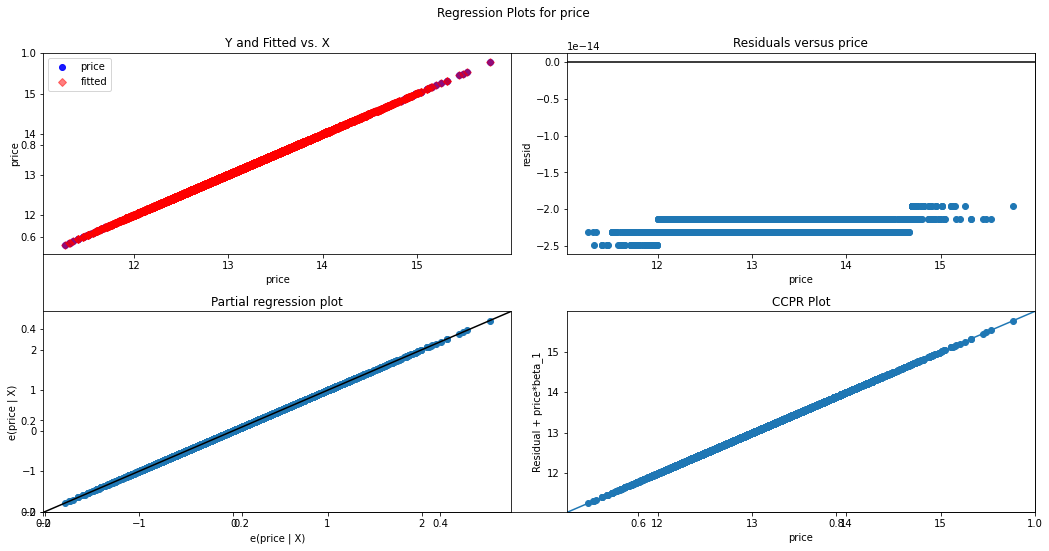

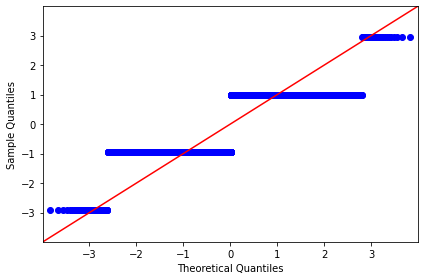

waterfront normality tests
['waterfront', 0.030719141382217208, 13.042700146170404, 1.0859431459569515, 5.560156243763592e-111, 448.57271555048027]


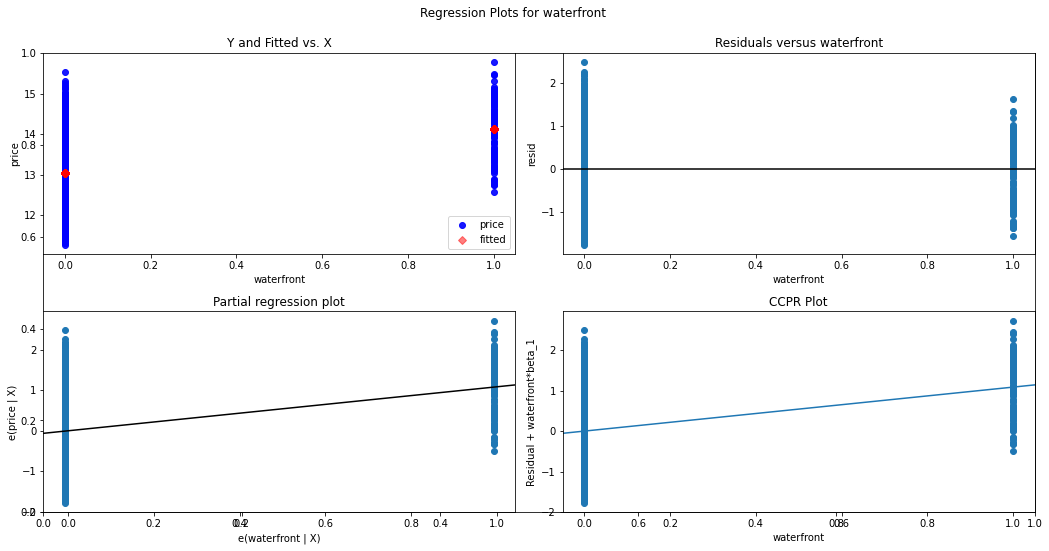

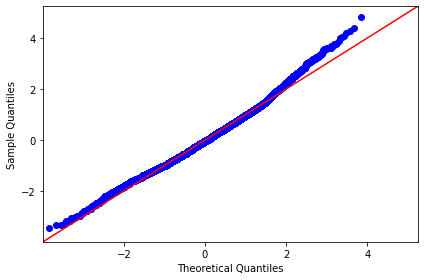

grade normality tests
['grade', 0.49680968369917, 10.623910654332933, 0.31654037685126934, 0.0, 119.86461199029202]


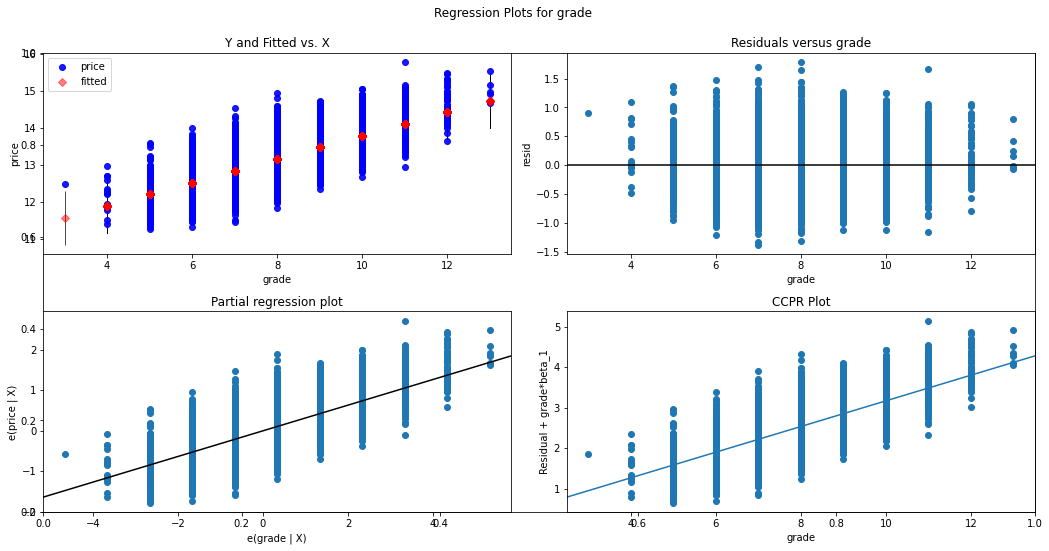

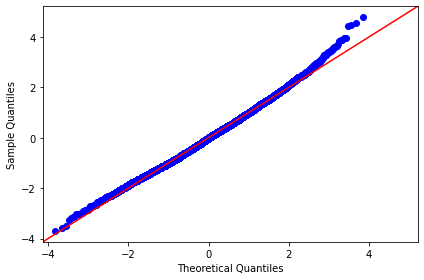

sqft_living normality tests
['sqft_living', 0.4837882269591036, 12.216442293753598, 0.00040012390282770035, 0.0, 44.98213039306943]


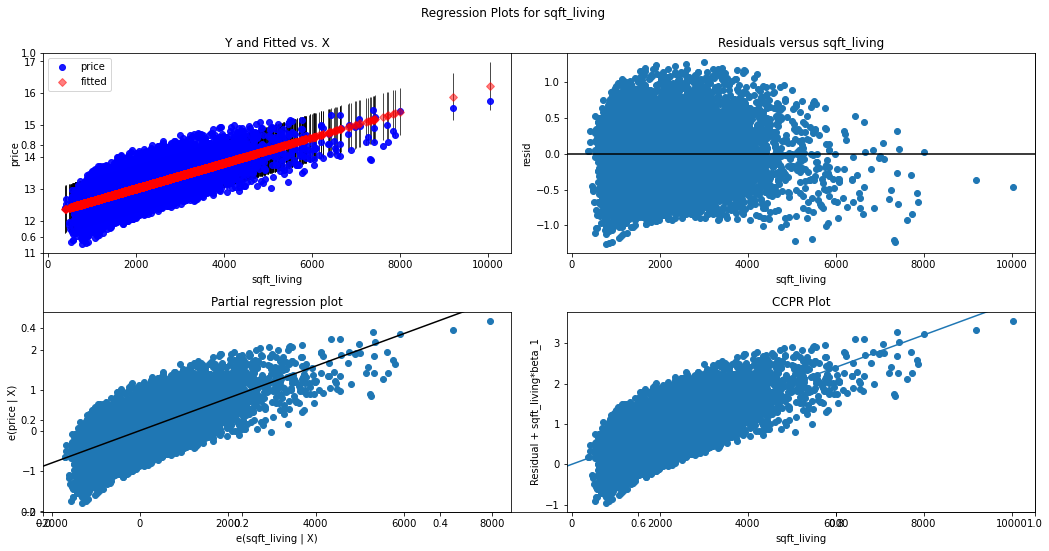

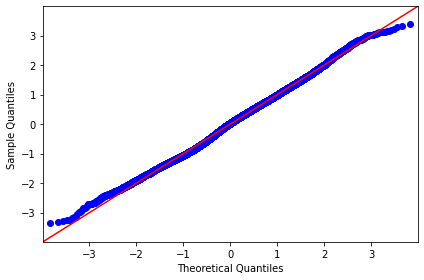

sqft_yard normality tests
['sqft_yard', 0.006804256262592512, 13.036446536685805, 1.095289641908608e-06, 1.1712587215334038e-25, 763.9083756656107]


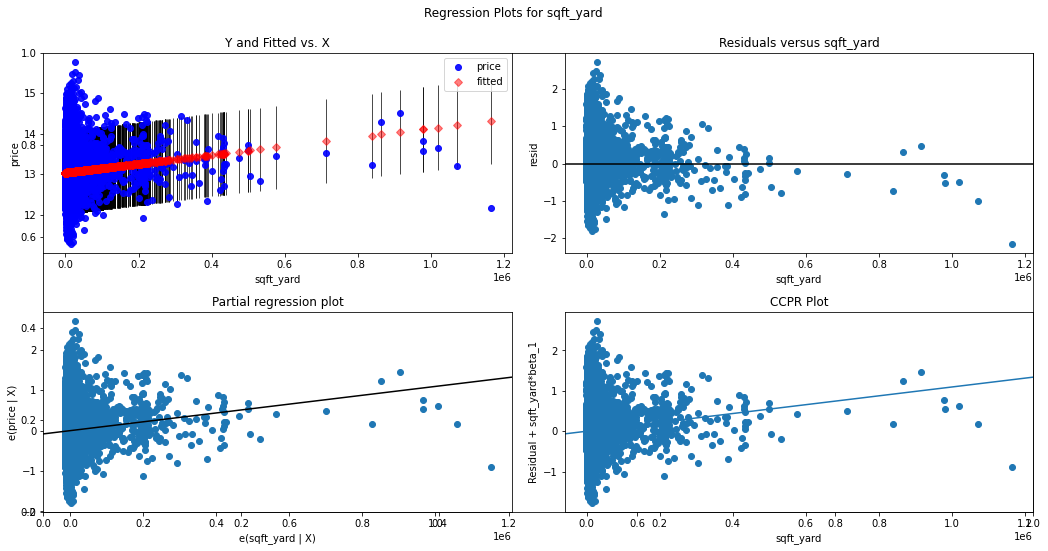

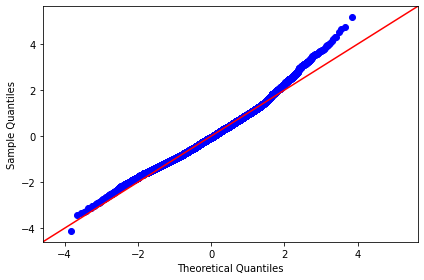

7506    12.928779
11465   12.485597
20673   13.270783
18619   13.279367
21329   13.049793
           ...   
10871   13.017003
1559    12.502467
2629    12.429216
7907    13.071070
15513   12.923790
Name: price, Length: 16062, dtype: float64

In [115]:
lin_df_1 = final_df.copy()
lin_df_1 = lin_df_1[non_loc_price_list]
linearity_test(lin_df_1)

## Make Model of Final with Added Interaction Term

In [116]:
colin_non_price(final_df).head(10)

level_0      level_1        0
pairs                                                      
(sqft_living, grade)      sqft_living        grade 0.763500
(grade, sqft_living)            grade  sqft_living 0.763500
(Sammamish, grade)          Sammamish        grade 0.199057
(grade, Sammamish)              grade    Sammamish 0.199057
(Sammamish, sqft_living)    Sammamish  sqft_living 0.158017
(sqft_living, Sammamish)  sqft_living    Sammamish 0.158017
(Carnation, sqft_yard)      Carnation    sqft_yard 0.157437
(sqft_yard, Carnation)      sqft_yard    Carnation 0.157437
(sqft_yard, sqft_living)    sqft_yard  sqft_living 0.155508
(sqft_living, sqft_yard)  sqft_living    sqft_yard 0.155508

In [89]:
final_df_interact = final_df.copy()
final_df_interact['grade_sqft_living'] = final_df['grade'] * final_df['sqft_living']
final_df_interact.head()


price  grade  sqft_living  waterfront  ArborHeights  Auburn  BeaconHill  \
0 12.542545      7         2400    0.000000             0       1           0   
1 13.380874      8         2060    0.000000             0       0           0   
2 12.899220      7         1460    0.000000             0       0           0   
3 12.367341      6         1430    0.000000             0       0           0   
4 12.905450      7         1650    0.000000             0       0           0   

   BlackDiamond  Bothell  BridleTrails  ...  Tukwila  Vashon  VictoryHeights  \
0             0        0             0  ...        0       0               0   
1             0        0             0  ...        0       0               0   
2             0        0             0  ...        0       0               0   
3             0        0             0  ...        1       0               0   
4             0        0             0  ...        0       0               0   

   ViewRidge  WestSeattle  WestWellington  Westlake  Woodinville  sqft_yard  \
0          0            0               0         0            0       6973   
1          0            0               0         0            0      23976   
2          0            0               0         0            0      41540   
3          0            0               0         0            0       6169   
4          0            0               0         0            0       1854   

   grade_sqft_living  
0              16800  
1              16480  
2              10220  
3               8580  
4              11550  

[5 rows x 56 columns]

In [90]:
final_interact_model = make_ols_model(final_df_interact, cv=True)


Train score:      0.8548279267408303
Validation score: 0.8508523555412433
Train Root Mean Squarred Error: 0.20026715756537378
Test Root Mean Squarred Error: 0.20267140341424147
cros_val r2 = 0.8504444733093568


In [198]:
# score not much better, better to keep it simple

# Interpretation and Evaluation

## make dictionaries of location and non-location coefficients

**With log transformed target, One unit increase in predictor is associated with a (coefficient * 100) percent increase in DV**

In [59]:
intercept = np.exp(final_model.params[0])

In [60]:
coefficients_dic = make_big_coef_dic(final_model, final_df)

In [61]:
non_loc_list = ['waterfront', 'grade', 'sqft_living', 'sqft_yard']
location_coeff_dic = {x:y for x, y in coefficients_dic.items() if x not in non_loc_list}
location_coeff_dic

{'Medina': 0.6199701453681885,
 'ClydeHill': 0.466400580354825,
 'MadisonValley': 0.3672769159505016,
 'Westlake': 0.3249207537060499,
 'QueenAnne': 0.2886651913075642,
 'Ravenna': 0.286411326412514,
 'CapitolHill': 0.24668638710233914,
 'MercerIsland': 0.24457020773049404,
 'Magnolia': 0.20626279381885654,
 'ViewRidge': 0.1384127264881404,
 'PhinneyRidge': 0.1368366463605712,
 'NorthRoseHill': 0.13405597087518994,
 'Leschi': 0.12433716115864996,
 'Greenwood': 0.123735422673641,
 'BridleTrails': 0.10233671336372632,
 'WestSeattle': 0.029710662278088606,
 'Redmond': -0.043646050620425536,
 'Sammamish': -0.09540688494952909,
 'VictoryHeights': -0.103533786014322,
 'Juanita': -0.11532954043458904,
 'Issaquah': -0.11944234872965354,
 'Broadview': -0.15148170589434706,
 'WestWellington': -0.17012804488136096,
 'Woodinville': -0.20877258720456388,
 'Bothell': -0.2134700398916703,
 'Shoreline': -0.22881487464239836,
 'SewardPark': -0.2360671713123037,
 'FallCity': -0.23779958131544743,
 'Kenm

**At the top end, Medina adds 60% to the sale price, while Clyde Hill adds 45% and Madison Valley 38%<br>
At the bottom end, Federal Way takes 67 percent of the value of a house, Auburn 65 percent and Tukwila 60 percent (as binary we can state percentage rise without being concerned about unit increases)**

In [62]:
non_loc_coeff_dic = {x:y for x, y in coefficients_dic.items() if x in non_loc_list}
non_loc_coeff_dic

{'waterfront': 0.6672293671564898,
 'grade': 0.10713441437168321,
 'sqft_living': 0.0002429299693522512,
 'sqft_yard': 6.953933791494463e-07}

In [63]:
non_loc_coeff_dic['sqft_yard']*1000

0.0006953933791494463

**Being by the waterfront adds over 65% to the value of a house, while every grade increase adds 10% on to the sale price<br>
Every 1000sqft of living space adds 24% to the price, while every 1000sqft of yard space adds 0.06% to the value**

## Predictive performance of model
**formula to calculate estimated sale price of a house**

In [64]:
def price_calculator(df, model, location, living=0, grade=0, waterfront=0, yard=0):
    co_dic = make_big_coef_dic(model, df)
    intercept = model.params[0]
    
    
    
    living_c = float(co_dic['sqft_living'])
    grade_c = float(co_dic['grade'])
    water_c = float(co_dic['waterfront'])
    yard_c = float(co_dic['sqft_yard'])
    try:
        loc=location.replace(" ", "")
    except:
        loc=location
    
    if loc in co_dic.keys():
        loc_c = float(co_dic[loc])
    else:
        loc_c = 0
    
    living_x_coef = living_c*living
    grade_x_coef = grade_c*grade
    yard_x_coef = yard_c*yard
    
    if waterfront ==1:
        water_x_coef = water_c
    else:
        water_x_coef = 0
        
    est_price = np.exp(intercept+living_x_coef+grade_x_coef+water_x_coef+loc_c+yard_x_coef)
    return(est_price)

    

## Interrogate errors to make sure no obvious probems
Function to work out error of each house in dataset, find the mean percentage error and return a dictionary of mean error by location, grade and sqft


In [65]:

def total_error_calc(df):
    non_loc_list=['sqft_living', 'grade', 'waterfront', 'sqft_yard']
    place_col=[x for x in list(df.columns) if x not in non_loc_list]
    
    tester_df = df.copy()
    
    perc_list=[]
    
    rich_dic={}
    perc_dic={}
    grad_dic = {}
    sqft_dic = {}
    
    sale_list=[]
    err_list=[]
    
    for index, row in tester_df.iterrows():
        li=row['sqft_living']
        gr=row['grade']
        for pc in place_col:
            if row[pc] == 1:
                loca = pc
        waterf=row['waterfront']
        est_price = price_calculator(final_df, final_model, loca, living=li, grade=gr, waterfront=waterf)
        real_price = np.exp(row['price'])
        real_error = real_price-est_price

        sale_list.append(real_price)
        err_list.append(real_error)
        
        perc = ((abs(real_price-est_price))/real_price)*100
        perc_list.append(perc)
        if loca in perc_dic.keys():
            perc_dic[loca].append(perc)
            rich_dic[loca].append(real_price)
        else:
            perc_dic[loca] = [perc]
            rich_dic[loca] = [real_price]
            
        if gr in perc_dic.keys():
            grad_dic[gr].append(perc)          
        else:
            grad_dic[gr] = [perc] 
            
        if li in perc_dic.keys():
            sqft_dic[li].append(perc) 
        else:
            sqft_dic[li] = [perc]

            
    return perc_list, perc_dic, rich_dic, grad_dic, sqft_dic, sale_list, err_list

In [66]:
perc_list, perc_dic, rich_dic, grad_dic, sqft_dic, sale_list, err_list = total_error_calc(final_df)

**make dataframes to investigate errors per nbhood, grade, sqft and mean sale price**

In [67]:
# mean error
av_err = np.mean(perc_list)
av_err

16.191169039383507

In [68]:
# make sorted dic of errors for each location
perc_dic_mean={x:(np.mean(y)) for x,y in perc_dic.items()}
sort_error = sorted(perc_dic_mean.items(), key=lambda x:x[1], reverse=True)
sort_error_dic = dict(sort_error)
sort_error_dic 

{'Medina': 26.77964969938886,
 'ArborHeights': 26.668575103279505,
 'SewardPark': 23.938980304650354,
 'MadisonValley': 23.34207185759173,
 'ClydeHill': 22.965755465124396,
 'QueenAnne': 22.356542340135068,
 'BlackDiamond': 22.2718719723583,
 'Tukwila': 21.379474744645727,
 'CapitolHill': 21.309176688584675,
 'NormandyPark': 20.758475862684882,
 'Carnation': 20.506708394640235,
 'DesMoines': 20.097989573352027,
 'Vashon': 19.96270270678123,
 'Westlake': 19.656722238311843,
 'HighPoint': 19.421334691834907,
 'MercerIsland': 19.333746816892415,
 'Burien': 19.098154660757782,
 'Leschi': 19.036389571679074,
 'NorthRoseHill': 18.97257032953747,
 'BeaconHill': 18.96435649977361,
 'FallCity': 18.40754650407985,
 'PhinneyRidge': 17.878999485345684,
 'RainierBeach': 17.767946670651405,
 'Broadview': 17.269444498742825,
 'Seatec': 16.997029226935382,
 'Enumclaw': 16.91693338985236,
 'Magnolia': 16.469890977357196,
 'Renton': 16.43569346699108,
 'VictoryHeights': 16.057573990696437,
 'Shoreline':

In [69]:
# make into df
error_df = pd.DataFrame.from_dict(sort_error_dic, orient='index')
error_df.rename(columns={0:'mean_pct_error'}, inplace=True)

In [70]:
# make dic of mean price per location
rich_dic_mean={x:(np.mean(y)) for x,y in rich_dic.items()}
rich_nbs = sorted(rich_dic_mean.items(), key=lambda x:x[1], reverse=True)
sort_rich_dic = dict(rich_nbs)


In [71]:
# make into dataframe
rich_df = pd.DataFrame.from_dict(sort_rich_dic, orient='index')
rich_df.rename(columns={0:'mean_price'}, inplace=True)

In [72]:
rich_error_df=pd.concat([rich_df, error_df], axis=1)

In [73]:
# make df of mean error per grade
grad_dic_mean={x:(np.mean(y)) for x,y in grad_dic.items()}
grad_s = sorted(grad_dic_mean.items(), key=lambda x:x[1], reverse=True)
sort_grad_dic = dict(grad_s)
grad_df = pd.DataFrame.from_dict(sort_grad_dic, orient='index')
grad_df.reset_index(inplace=True)
grad_df.rename(columns={'index':'grade', 0:'mean_error'}, inplace=True)
grad_df

grade  mean_error
0   4.000000  118.036826
1  13.000000   59.251588
2   3.000000   49.673034
3   8.000000   42.644392
4   7.000000   35.397265
5   5.000000   34.759285
6  11.000000   30.487898
7  10.000000   24.343478
8  12.000000   22.418912
9   9.000000   20.156657
10  6.000000    3.393410

In [74]:
# make df of mean error per sqft
sqft_dic_mean={x:(np.mean(y)) for x,y in sqft_dic.items()}
sq_s = sorted(sqft_dic_mean.items(), key=lambda x:x[1], reverse=True)
sort_sqft_dic = dict(sq_s)
sqft_df = pd.DataFrame.from_dict(sort_sqft_dic, orient='index')
sqft_df.reset_index(inplace=True)
sqft_df.rename(columns={'index':'sqft', 0:'mean_error'}, inplace=True)

# Visualisations

In [75]:
def scatterplot(df, x, y, x_l, y_l, title, file, hue=None, legend=True, size=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    sns.scatterplot(x=x, y=y, data=df, hue=hue, legend=legend, size=size,
    sizes=(75,200))
    plt.title(title, y=1.03)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.ylabel(y_l, fontsize=20)
    plt.xlabel(x_l, fontsize=20)
    plt.savefig(file, bbox_inches = "tight")
    plt.show();

In [108]:
def bar_chart(df, x, y, x_l, y_l, title, file, xls=20, rotation=0, ha='right'): 
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(12, 10))
    
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    
    ax=sns.barplot(x=df[x], y=df[y], color='red')
    plt.rc('font', size=20)
    plt.title(title, y=1.05, fontsize=22)
    plt.xlabel(x_l)
    plt.xticks(rotation=rotation, ha=ha, fontsize=xls)
    plt.ylabel(y_l, fontsize=20)   
    plt.savefig(file, bbox_inches = "tight")
    plt.show();

In [109]:
def hist(df, x, x_l, title, file, rotation=0):

    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.histplot(data=wat_df, x='r_price', bins=10)
    
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(title, y=1.05, fontsize=22)
    plt.rc('font', size=20)
    plt.xlabel(x_l, fontsize=20)
    plt.xticks(rotation=rotation, ha="right", fontsize=20)  
    plt.savefig(file, bbox_inches = "tight")
    plt.show();

## Error visualisations

**error vs sale price for every location**

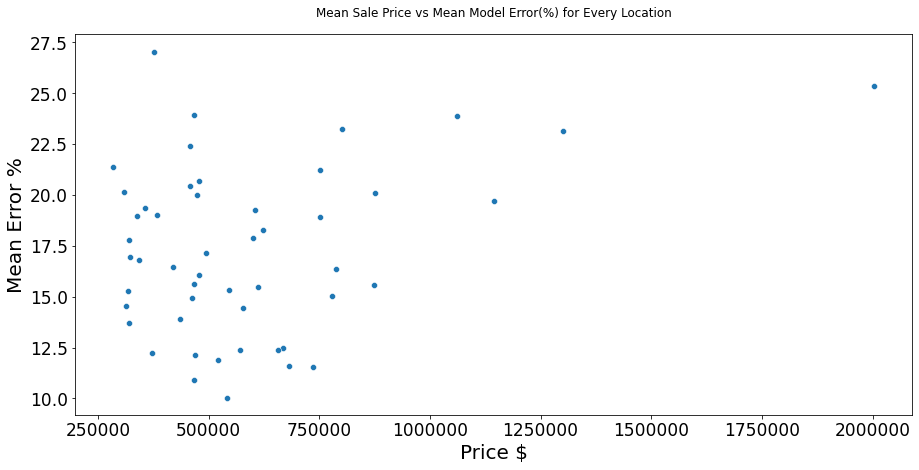

In [110]:
scatterplot(rich_error_df, x='mean_price', y='mean_pct_error', x_l= 'Price $',
            y_l='Mean Error %', title = 'Mean Sale Price vs Mean Model Error(%) for Every Location', 
           file='images/price_v_error.png')

**Looks fairly random**

**error v grade**

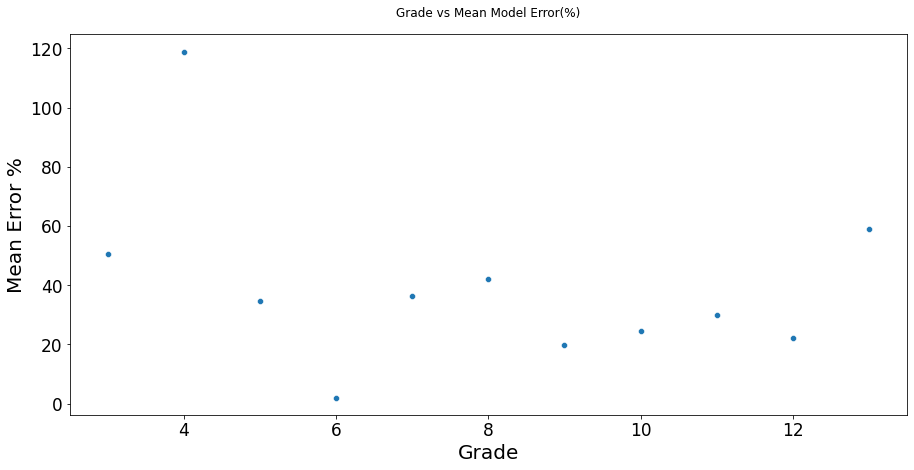

In [111]:
scatterplot(grad_df, x='grade', y='mean_error', x_l= 'Grade',
            y_l='Mean Error %', title = 'Grade vs Mean Model Error(%)', 
           file='images/grade_v_error.png')

**random**

**sqft v error**

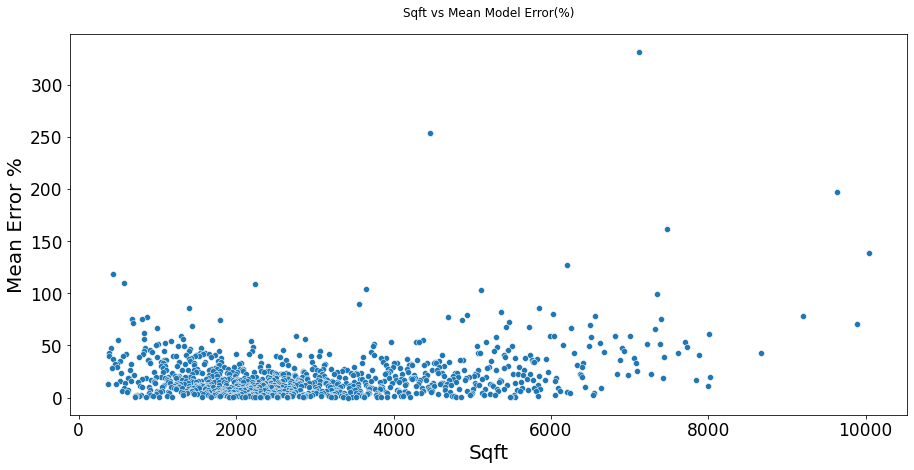

In [112]:
scatterplot(sqft_df, x='sqft', y='mean_error', x_l= 'Sqft',
            y_l='Mean Error %', title = 'Sqft vs Mean Model Error(%)', 
           file='images/sqft_v_error.png')

**few outliers but generally random**

**real error per sale price**

In [113]:
zip_err = dict(zip(sale_list, err_list))
err_df = pd.DataFrame.from_dict(zip_err, orient='index')
err_df.reset_index(inplace=True)
err_df.rename(columns={'index':'sale_price', 0:'real_error'}, inplace=True)

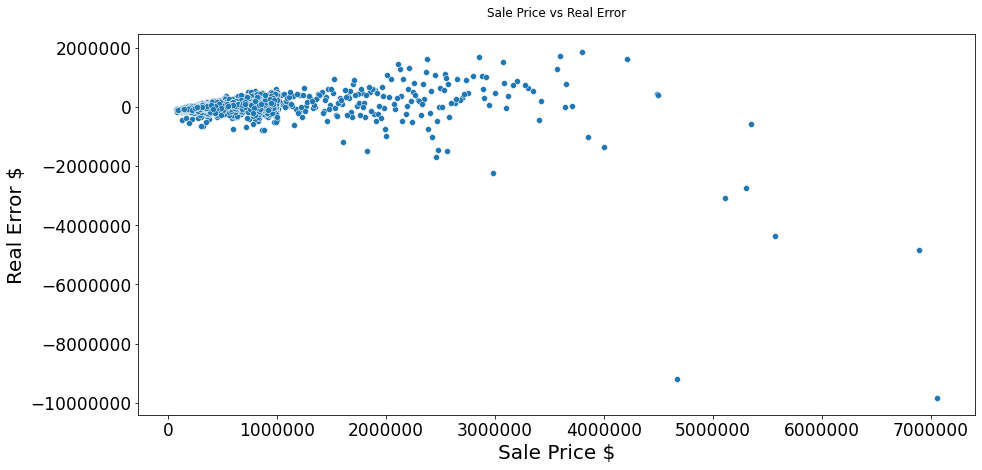

In [114]:
scatterplot(err_df, x='sale_price', y='real_error', x_l= 'Sale Price $',
            y_l='Real Error $', title = 'Sale Price vs Real Error', 
           file='images/price_v_error.png')

**bigger real errors as sale price increases, but to be expected. Percentage is still fairly random as seen in the location plot**

## Interpretive plots/Charts

**Percentage increase in Sale Price per one unit increase in feature**

In [115]:
# change sqft to 1000 sqft
non_loc_coeff_dic['living space 1000ft']=non_loc_coeff_dic['sqft_living']*1000
non_loc_coeff_dic.pop("sqft_living")


0.00024176825062938802

In [116]:
# yard space
non_loc_coeff_dic['yard_space_1000ft']=non_loc_coeff_dic['sqft_yard']*1000
non_loc_coeff_dic.pop("sqft_yard")

6.448166677360756e-07

In [117]:
# per 1000sqft
non_loc_coeff_per_dic = {x:round((y*100),2) for x,y in non_loc_coeff_dic.items()}
non_loc_coeff_per_dic.pop('yard_space_1000ft')

0.06

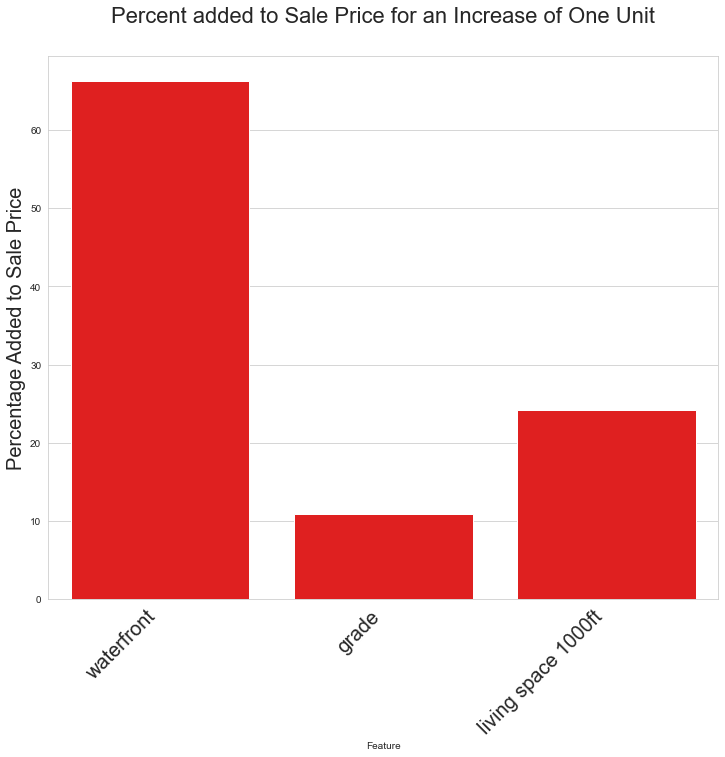

In [118]:
# graph of non location features
non_loc_df = pd.DataFrame.from_dict(non_loc_coeff_per_dic, orient='index')
non_loc_df.reset_index(inplace=True)

bar_chart(non_loc_df, x='index', y=0, x_l='Feature', 
           y_l='Percentage Added to Sale Price',
           title = 'Percent added to Sale Price for an Increase of One Unit', 
           file='images/feature_price_bar.png', rotation=45)


In [119]:
# by location
loc_perc_dic = {x:round((y*100),2) for x,y in location_coeff_dic.items()}
loc_df = pd.DataFrame.from_dict(loc_perc_dic, orient='index')
loc_df.reset_index(inplace=True)

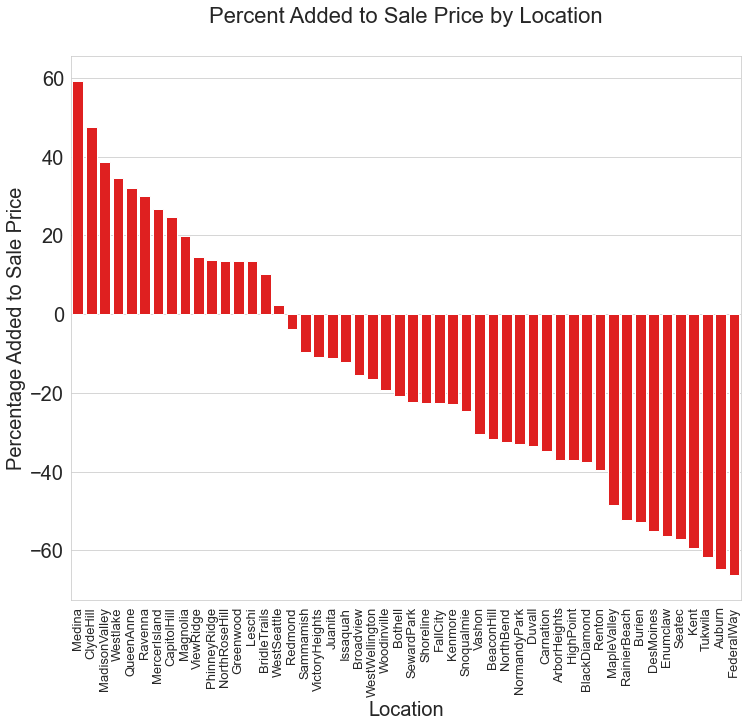

In [120]:
bar_chart(loc_df, x='index', y=0, x_l='Location', 
           y_l='Percentage Added to Sale Price',
           title = 'Percent Added to Sale Price by Location', 
           file='images/location_price_bar.png', rotation=90, ha='center', xls=13)


**price v living space by waterfront/non-waterfront**

In [121]:
scat_df = city_df.copy()
scat_df['sqft_living']=scat_df['sqft_living']/1000

In [122]:
scat_df['waterfront'].replace([0, 1], ['No', 'Yes'], inplace=True)

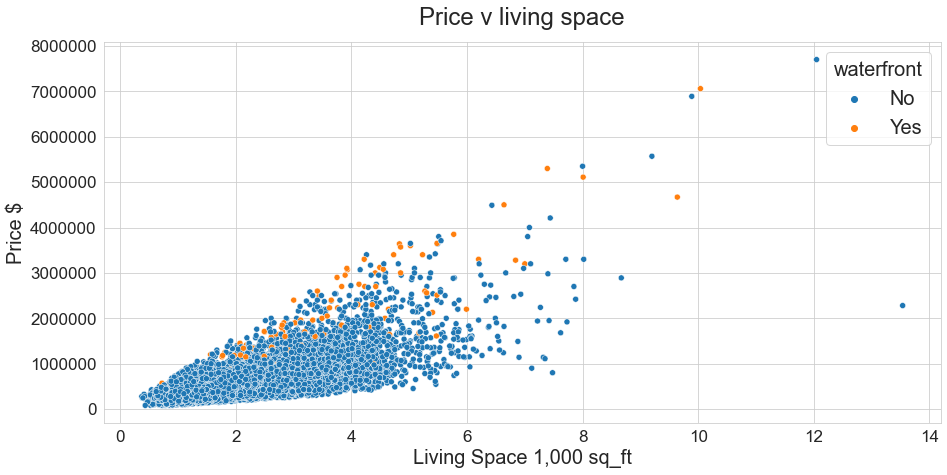

In [123]:
scatterplot(scat_df, x='sqft_living', y='price', x_l='Living Space 1,000 sq_ft', 
           y_l='Price $',
           title = 'Price v living space', 
           file='images/sqft_price_scatter.png',
           hue='waterfront')

**Obvious correlation between size and price, though the relationship gets less predictable the bigger the living space. There is a hard floor and ceiling of prices per living size. The orange dots almost all lie a the top of the cluster, showing the value of a waterfront property**

<ipython-input-124-79b4d7f6359b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_df['r_price']=np.exp(wat_df['price'])


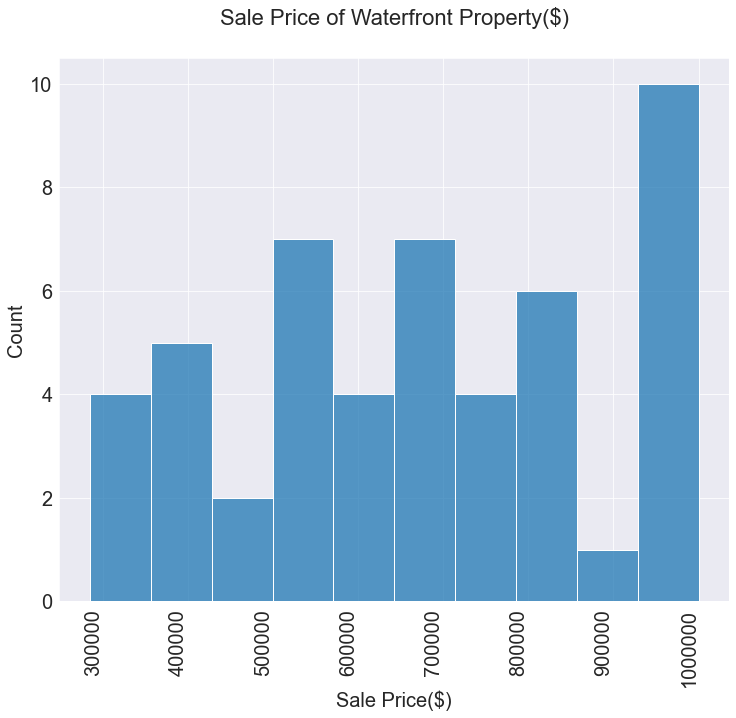

In [124]:
#check no of waterfront houses sold for less than $1m
wat_df=final_df[final_df['waterfront']==1]
wat_df['r_price']=np.exp(wat_df['price'])
wat_df=wat_df[wat_df['r_price']<1000000]
hist(wat_df, 'r_price', 'Sale Price($)', 'Sale Price of Waterfront Property($)', 'images/price_waterfornt_hist.png', rotation=90)

**Find lowest error nbhoods, and mean sale price in those places**

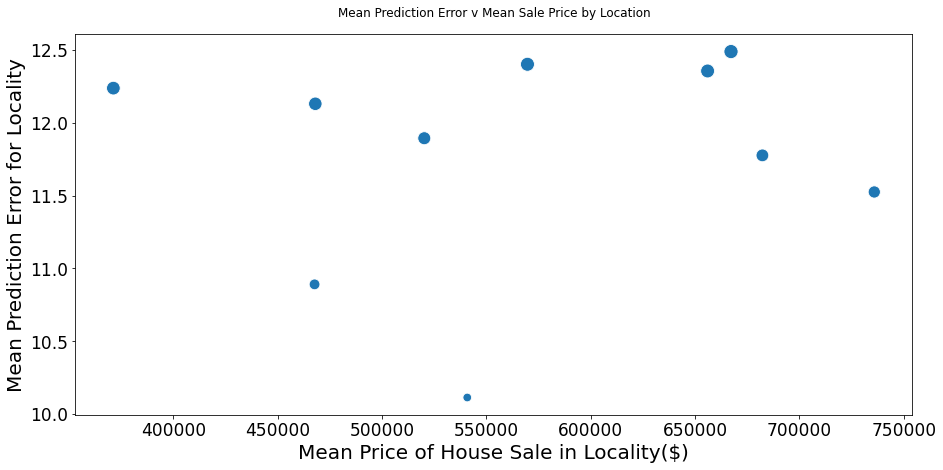

In [76]:
low_error = rich_error_df.copy()
low_error.sort_values(by='mean_pct_error', ascending=True, inplace=True)
low_error.reset_index(inplace=True)
low_error=low_error[:10]
low_error=low_error.rename(columns={'index':'Location'})
scatterplot(low_error, x='mean_price',
            y='mean_pct_error', 
            x_l='Mean Price of House Sale in Locality($)',
            y_l='Mean Prediction Error for Locality',
            title = 'Mean Prediction Error v Mean Sale Price by Location', 
            file='images/error_price__local_scatter.png', size='mean_pct_error', legend=False)


In [126]:
mean_price_low_error = np.mean(low_error['mean_price'].tolist())
mean_price_low_error 

567928.9556295398

In [159]:
##set budget at $500k. 
# Work out the kind of property you can get in each location for 450 to 550

**sqft_living for 450,000-550,000 dollars in each location**

In [127]:
#make datframe of final_df but with place name re-entered
non_loc_list=['waterfront', 'sqft_living', 'price', 'grade', 'sqft_yard']
final_place_df=final_df.copy()
loc_list = [x for x in final_place_df.columns if x not in non_loc_list]
final_place_df['Place']='KC'
for index, row in final_place_df.iterrows():
    for nl in loc_list:
        if row[nl]==1:
            final_place_df.loc[index, 'Place']=nl

    

In [128]:
# make df of houses between 450 and 500k (need to detransform price)
space_budget_df=final_place_df.copy()
space_budget_df['r_price']=np.exp(space_budget_df['price'])
space_budget_df = space_budget_df[(space_budget_df['r_price']>450000) & (space_budget_df['r_price']<550000)]


In [129]:
#copy df and sort by living space
sbg=space_budget_df.groupby('Place').mean()
sbg.drop('KC', inplace=True)
sbg.reset_index(inplace=True)
sbg=sbg.rename(columns={'index':'Place'})
sbg.sort_values(by='sqft_living', inplace=True)

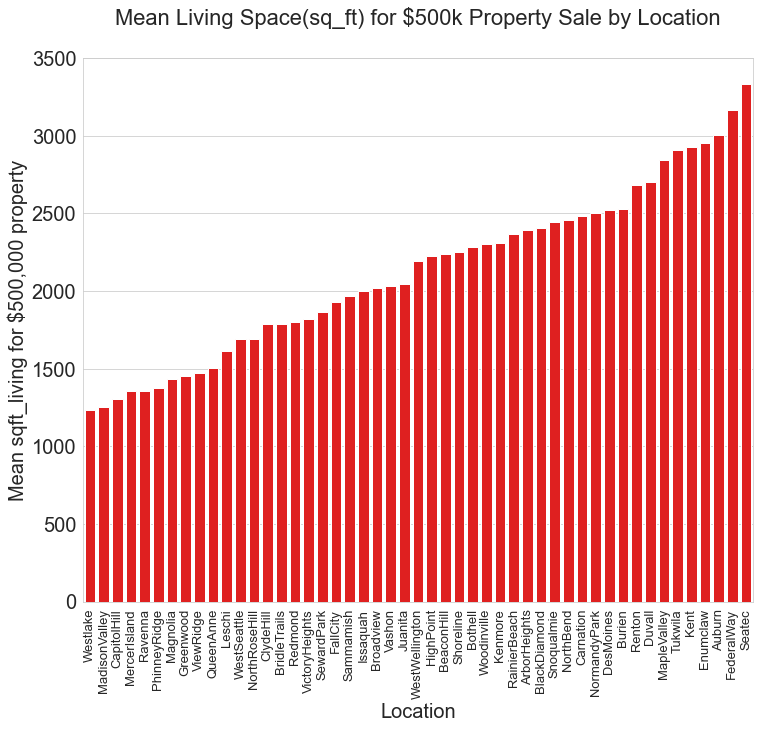

In [130]:
bar_chart(sbg, x='Place', y='sqft_living', x_l='Location', 
           y_l='Mean sqft_living for $500,000 property',
           title = 'Mean Living Space(sq_ft) for $500k Property Sale by Location', 
           file='images/living_500k_bar.png', rotation=90, ha='center', xls=13)

**mean grade for 500k dollars in each location**

In [131]:
# sort by grade
sbg.sort_values(by='grade', inplace=True)

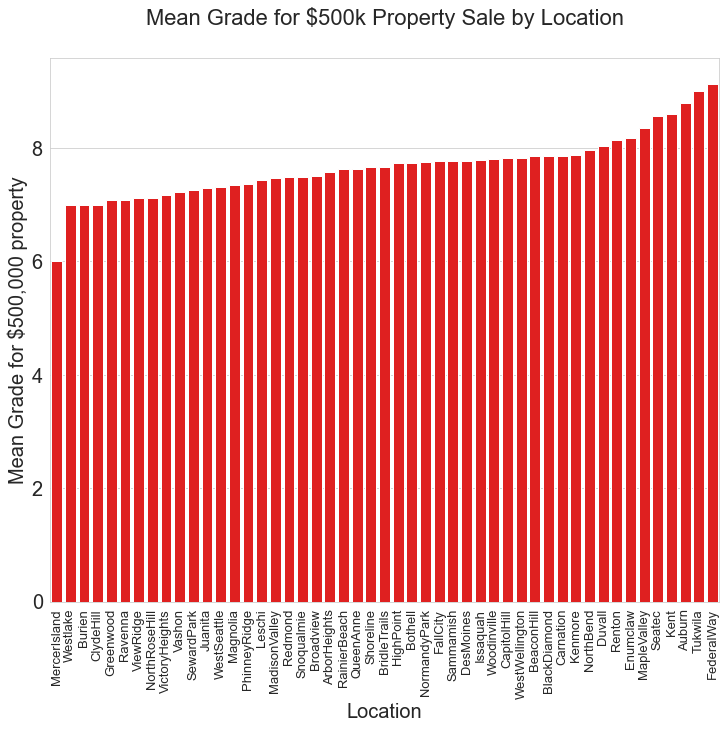

In [132]:
bar_chart(sbg, x='Place', y='grade', x_l='Location', 
           y_l='Mean Grade for $500,000 property',
           title = 'Mean Grade for $500k Property Sale by Location', 
           file='images/grade_500k_bar.png', rotation=90, ha='center', xls=13)

# Interpretation of r2 and root mean sq error

In [133]:
error_check = make_ols_model(final_df, cv=True)

Train score:      0.8525427457195992
Validation score: 0.8484575672308369
Train Root Mean Squarred Error: 0.20068254962612736
Test Root Mean Squarred Error: 0.20752970038146712
cros_val r2 = 0.8480269290942856


In [167]:
# 85% of the variation in the price scores can be explained by the features.
# This means that 15 percent of the variation in the price difference between 
# houses and the mean house price is down to other factors or general randomness. 
# the model generally has around a 17-20% error in predicting the prices 
# (20% using rmse, 17% when taking mean error of prediction of every house in 
# dataset v actual price)
# the residuals are normally distributed, so half the time, the error will 
# only further undervalue the house, which is no problem for us.
# In the best performing locations, the error rate is between 10 and 15%

# Make heatmap

In [135]:
import folium

In [134]:
scaled_prices = data_df.copy()
scaled_prices=scaled_prices[['price', 'lat']]
scaler = MinMaxScaler(copy=False)
scaler = scaler.fit_transform(scaled_prices)


In [136]:
scaled_prices.drop('lat', axis=1, inplace=True)

In [137]:
scaled_prices.rename(columns={'price':'norm_price'}, inplace=True)
scaled_prices.head()

norm_price
0    0.026502
1    0.074718
2    0.042246
3    0.020598
4    0.042574

In [138]:
heat_df = data_df.copy()
heat_df=heat_df.join(scaled_prices)

In [139]:
from folium.plugins import HeatMap
import webbrowser


f = folium.Figure(width=1000, height=500)

# create a map object
price_map = folium.Map([47.548745, -122.196851], tiles="openstreetmap", zoom_start=9.4)

sale_list=[]

for index, row in heat_df.iterrows():
    s_lat = row['lat']
    s_long = row['long']
    s_price = row['norm_price']
    row_list=[s_lat, s_long, s_price]
    sale_list.append(row_list)
    
colorGrad = {0.0: 'blue',
             0.3: 'cyan',
             0.6: 'lime',
             0.8: 'yellow',
             1.0: 'red'}

HeatMap(sale_list, gradient=colorGrad, opacity=1, radius=20).add_to(price_map)
price_map.save("output.html")
webbrowser.open("output.html", new=2)  # open in new tab
price_map